## Hazai táplálkozási minták

### Az adakészletről

Az adatok a Központi Statisztikai Hivatal által készített adathalmazból származik, ami az egy főre jutó napi tápanyagbevitel összetevőit mutatja 1970 és 2023 között, különböző élelmiszercsoportok szerint, mind szénhidrát, fehérje és zsír tekintetében.

Az állományok elérhetősége: https://www.ksh.hu/4_1_2_2_hosszu

Példa értelmezhetőség: szénhidrát fogyasztás (fő/nap)
- 1970 évben: Hús=0,5g, Hal=0,0g,Tej=13,5g,Tojás=0,2g,Zsiradék=0,1g,Liszt és rizs=252,2g,Burgonya=28,9g,Cukor és méz=92,1g,Zöldség, gyümölcs=27,8g,Egyéb=3,9g Összesen=419,2g

Ez azt jelenti, hogy 1970-ben egy magyar ember átlagosan naponta 419,2 gramm szénhidrátot fogyasztott, amiből:
- 252,2 g lisztből/rizsből,
- 92,1 g cukorból/mézből,
- 28,9 g burgonyából,
- 27,8 g zöldség/gyümölcsből,
- 13,5 g tejből,
- 3,9 g egyéb forrásból,
- 0,5 g húsból,
- 0,2 g tojásból
- 0,1 g zsíradékból származik

A napi ajánlott makrotápanyag-bevitel egyénfüggő, de általánosan elfogadott irányelvek vannak, amelyek alapján meghatározható a zsírok, szénhidrátok és fehérjék mennyisége.
- A napi energiaszükséglet meghatározásánál az első lépcső az alapanyagcsere kiszámítása, melynélfigyelembe kell venni a nemet, az életkort és az aktuális testtömeget. A napi energia-szükséglet kiszámításánál az alapanyagcserét kell alapul venni, majd megszorozni azt a fizikai aktivitás függvényében az életvitelünknek és nemünknek megfelelő faktorral. 

- Általános ajánlások felnőtteknek (átlagos testsúly, mérsékelt aktivitás mellett):

|Tápanyag|Napi energia %|Napi grammban (átlag)|
|--------|--------------|---------------------|
|Szénhidrát|45-60%|225-300 g|
|Fehérje|10-20%|50-70 g|
|Zsír|20-35%|70-90 g|


### Mire keresem a választ?

Táplálkozási trendek feltérképezése:
- Makrotápanyagok aránya az étrendben
- Időbeli változások elemzése: pl. nő-e a zsírbevitel? Csökken-e a zöldségfogyasztás?
- Tápanyag-egyensúly modellezése (pl. fehérje vs. szénhidrát)
- Előrejelzés (forecasting): mi várható a jövőben?
- Közegészségügyi becslések: pl. túlzott cukor- vagy zsírbevitelre utaló minták


In [ ]:
- Az elmúlt időszakban hogyan változott a hazai lakosság makrotápanyag bevitele?
- Miként alakult a közel 50 év alatt a napi kalóriabevitelünk, mi várható a jövőben?
- Mely alapélelmiszerek adják a le

### 1. Exploratory Data Analysis (EDA)

Az Exploratory Data Analysis (EDA) az adatelemzési folyamat egyik legfontosabb és legelső szakasza. Célja, hogy az adatokban rejlő mintázatokat, trendeket és anomáliákat azonosítsuk, megértsük az adathalmaz szerkezetét, és felkészítsük az adatokat a további, mélyebb elemzésekre vagy gépi tanulási modellek építésére.

#### Fontosabb könyvtárak betöltése

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid") # rács

import warnings
warnings.filterwarnings("ignore")

### 2. Adathalmazok betöltése

#### 2.a. Szénhidrát adathalmaz betöltése

Adattábla elérhetősége: https://www.ksh.hu/stadat_files/mez/hu/mez0065.html

- Egy főre jutó szénhidrát napi mennyisége [gramm]
- A tápanyag-fogyasztási adatokat 2004-től az OÉTI 2004-es tápanyagtáblázatának megfelelően számították. 
- Az összehasonlíthatóság érdekében a 2003-as értékeket átdolgozták.

Jelmagyarázat
- A megfigyelt statisztikai jelenség nem fordult elő (-) 
- A vonallal elválasztott adatok összehasonlíthatósága korlátozott.(__, |)

In [3]:
df_szh = pd.read_excel("egy_fore_szh.xlsx",header=1)

In [20]:
df_szh.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,0.5,0,13.5,0.2,0.1,252.2,28.9,92.1,27.8,3.9,419.2
1,1975,0.7,0,16.0,0.2,0.0,241.7,25.6,108.2,28.8,3.9,425.1
2,1980,0.8,0,20.9,0.2,0.0,227.7,23.5,104.4,28.2,3.6,409.3
3,1981,0.8,0,21.6,0.2,0.0,224.2,22.7,97.8,28.2,4.0,399.5
4,1982,0.8,0,22.0,0.2,0.0,223.6,21.9,104.9,29.4,4.0,406.8


#### 2.b. Szénhidrát adathalmaz másolat készítése

 A másolt adathalmazzokkal dolgozunk tovább, megőrizve az eredetit.

In [5]:
df_for_plotting_szh = df_szh.copy()

In [19]:
df_for_plotting_szh.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,0.5,0,13.5,0.2,0.1,252.2,28.9,92.1,27.8,3.9,419.2
1,1975,0.7,0,16.0,0.2,0.0,241.7,25.6,108.2,28.8,3.9,425.1
2,1980,0.8,0,20.9,0.2,0.0,227.7,23.5,104.4,28.2,3.6,409.3
3,1981,0.8,0,21.6,0.2,0.0,224.2,22.7,97.8,28.2,4.0,399.5
4,1982,0.8,0,22.0,0.2,0.0,223.6,21.9,104.9,29.4,4.0,406.8


#### 2.c. Fehérje adathalmaz betöltése

Adattábla elérhetősége: https://www.ksh.hu/stadat_files/mez/hu/mez0063.html

- Egy főre jutó fehérje napi mennyisége [gramm]
- A tápanyag-fogyasztási adatokat 2004-től az OÉTI 2004-es tápanyagtáblázatának megfelelően számították. 
- Az összehasonlíthatóság érdekében a 2003-as értékeket átdolgozták.

Jelmagyarázat
- A megfigyelt statisztikai jelenség nem fordult elő (-) 
- A vonallal elválasztott adatok összehasonlíthatósága korlátozott.(__, |)

In [7]:
df_feherje = pd.read_excel("egy_fore_feherje.xlsx",header=1)

In [18]:
df_feherje.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen,Ebből: állati fehérje
0,1970,23.1,0.9,11.7,4.6,3.1,44.4,3.7,–,4.1,2.3,97.9,43.4
1,1975,26.5,1.0,13.5,5.0,2.9,41.6,3.3,–,4.2,2.7,100.7,48.9
2,1980,28.2,0.8,17.8,5.8,2.8,39.3,3.0,–,4.0,2.3,104.0,55.4
3,1981,28.7,0.9,18.3,5.7,2.8,38.7,2.9,–,4.0,2.2,104.2,56.4
4,1982,29.2,0.8,18.7,5.6,2.8,38.6,2.8,–,4.0,2.2,104.7,57.1


#### 2.d.Fehérje adatalmaz másolat készítése

In [9]:
df_for_plotting_feherje = df_feherje.copy()

In [17]:
df_for_plotting_feherje.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen,Ebből: állati fehérje
0,1970,23.1,0.9,11.7,4.6,3.1,44.4,3.7,–,4.1,2.3,97.9,43.4
1,1975,26.5,1.0,13.5,5.0,2.9,41.6,3.3,–,4.2,2.7,100.7,48.9
2,1980,28.2,0.8,17.8,5.8,2.8,39.3,3.0,–,4.0,2.3,104.0,55.4
3,1981,28.7,0.9,18.3,5.7,2.8,38.7,2.9,–,4.0,2.2,104.2,56.4
4,1982,29.2,0.8,18.7,5.6,2.8,38.6,2.8,–,4.0,2.2,104.7,57.1


#### 2.e. Zsír adatahalmaz betöltése

Adathalmaz elérhetősége: https://www.ksh.hu/stadat_files/mez/hu/mez0064.html

- Egy főre jutó zsír napi mennyisége [gramm]
- Gyümölcsöknél zsír helyett gyümölcssav értendő.
- A tápanyag-fogyasztási adatokat 2004-től az OÉTI 2004-es tápanyagtáblázatának megfelelően számították. Az összehasonlíthatóság érdekében a 2003-as értékeket átdolgozták.

Jelmagyarázat
- A megfigyelt statisztikai jelenség nem fordult elő (-) 
- A vonallal elválasztott adatok összehasonlíthatósága korlátozott.(__, |)

In [11]:
df_zsir = pd.read_excel("egy_fore_zsir.xlsx",header=1)

In [15]:
df_zsir.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,22.0,0.4,10.8,4.1,68.4,4.4,0.3,–,1.8,3.3,115.5
1,1975,27.5,0.5,12.8,4.5,72.0,4.1,0.4,–,2.0,3.9,127.7
2,1980,23.7,0.4,16.8,5.2,75.6,4.0,0.3,–,2.1,2.7,130.8
3,1981,24.1,0.4,17.4,5.2,76.9,3.9,0.3,–,2.1,2.4,132.7
4,1982,24.4,0.4,17.7,5.1,78.9,3.9,0.3,–,2.2,2.5,135.4


#### 2.f. Zsír adathalmaz másolat készítése

In [13]:
df_for_plotting_zsir = df_zsir.copy()

In [16]:
df_for_plotting_zsir.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,22.0,0.4,10.8,4.1,68.4,4.4,0.3,–,1.8,3.3,115.5
1,1975,27.5,0.5,12.8,4.5,72.0,4.1,0.4,–,2.0,3.9,127.7
2,1980,23.7,0.4,16.8,5.2,75.6,4.0,0.3,–,2.1,2.7,130.8
3,1981,24.1,0.4,17.4,5.2,76.9,3.9,0.3,–,2.1,2.4,132.7
4,1982,24.4,0.4,17.7,5.1,78.9,3.9,0.3,–,2.2,2.5,135.4


#### 2.g. Tápanyag adathalmaz betöltése

Egy főre jutó tápanyag napi mennyisége kilokalóriában (Egy kalória=4,1868 joule)

A tápanyag-fogyasztási adatokat 2004-től az OÉTI 2004-es tápanyagtáblázatának megfelelően számították. Az összehasonlíthatóság érdekében a 2003-as értékeket átdolgozták.

Jelmagyarázat

- A megfigyelt statisztikai jelenség nem fordult elő (-)
- A vonallal elválasztott adatok összehasonlíthatósága korlátozott.(__, |)

In [73]:
df_tapany= pd.read_excel("egy_fore_tapany.xlsx",header=1)

In [74]:
df_tapany.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,292.0,7.0,198.0,56.0,628.0,1226.0,133.0,368.0,134.0,56.0,3098.0
1,1975,356.0,9.0,233.0,61.0,660.0,1170.0,119.0,433.0,140.0,61.0,3242.0
2,1980,329.0,7.0,306.0,71.0,692.0,1104.0,109.0,418.0,137.0,48.0,3221.0
3,1981,334.0,7.0,316.0,70.0,703.0,1087.0,105.0,392.0,137.0,46.0,3197.0
4,1982,340.0,7.0,322.0,69.0,721.0,1084.0,102.0,420.0,142.0,46.0,3253.0


#### 2.h. Tápanyag adathalmaz másolat készítése

In [75]:
df_for_plotting_tapany = df_tapany.copy()

In [76]:
df_for_plotting_tapany.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",Egyéb növényi eredetű élelmiszerek,Összesen
0,1970,292.0,7.0,198.0,56.0,628.0,1226.0,133.0,368.0,134.0,56.0,3098.0
1,1975,356.0,9.0,233.0,61.0,660.0,1170.0,119.0,433.0,140.0,61.0,3242.0
2,1980,329.0,7.0,306.0,71.0,692.0,1104.0,109.0,418.0,137.0,48.0,3221.0
3,1981,334.0,7.0,316.0,70.0,703.0,1087.0,105.0,392.0,137.0,46.0,3197.0
4,1982,340.0,7.0,322.0,69.0,721.0,1084.0,102.0,420.0,142.0,46.0,3253.0


#### Adatok megértése


- Problémafelvetés: Milyen kérdésekre keresünk választ az adatokkal? Mi a projekt célja?
- Változók megértése: Mit jelent az egyes oszlop (változó)? Milyen mérési skálán (nominális, ordinális, intervallum, arány) mérhető?
- Adatforrás: Honnan származik az adat? Hogyan gyűjtötték? Vannak-e torzítások a gyűjtésben?
- Adathalmaz mérete: Hány sor és hány oszlop van? (df.shape)

| Tábla neve| Mit mutat? | Mértékegység |Mire használható? |
|-----------|------------|--------------|------------------|
| egy_fore_szh| szénhidrát mennyisége   | gramm / fő / nap |energiaforrás trendje, cukorfogyasztás elemzése|
| egy_fore_zsir| Zsír mennyisége| gramm / fő / nap | zsiradékhasználat, telített zsírok becslése|
| egy_fore_feherje | Fehérje mennyisége|gramm / fő / nap | hús- és tejtermékfogyasztás elemzése |
| egy_fore_tapany |Teljes energia (kalória)|kcal / fő / nap |napi energiaellátottság, túlfogyasztás vizsgálata|


##### Az adathalmazok mérete

In [26]:
df_szh.shape, df_zsir.shape, df_feherje.shape, df_tapany.shape

((47, 12), (47, 12), (47, 13), (47, 12))

Fehérje táblázat tartalmaz eggyel több oszlopot: kiemelten állati eredetű fehérjék

##### Adattípusok ellenőrzése

In [27]:
df_szh.info(), df_zsir.info(), df_feherje.info(), df_tapany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Év                                  47 non-null     int64  
 1   Hús                                 47 non-null     float64
 2   Hal                                 47 non-null     int64  
 3   Tej                                 47 non-null     float64
 4   Tojás                               47 non-null     float64
 5   Zsiradékok                          47 non-null     float64
 6   Liszt és rizs                       47 non-null     float64
 7   Burgonya                            47 non-null     float64
 8   Cukor és méz                        47 non-null     float64
 9   Zöldség, gyümölcs                   47 non-null     float64
 10  Egyéb növényi eredetű élelmiszerek  47 non-null     float64
 11  Összesen                            47 non-null

(None, None, None, None)

In [162]:
df_szh.dtypes, df_zsir.dtypes, df_feherje.dtypes, df_tapany.dtypes

(Év                                      int64
 Hús                                   float64
 Hal                                     int64
 Tej                                   float64
 Tojás                                 float64
 Zsiradékok                            float64
 Liszt és rizs                         float64
 Burgonya                              float64
 Cukor és méz                          float64
 Zöldség, gyümölcs                     float64
 Egyéb növényi eredetű élelmiszerek    float64
 Összesen                              float64
 dtype: object,
 Év                                      int64
 Hús                                   float64
 Hal                                   float64
 Tej                                   float64
 Tojás                                 float64
 Zsiradékok                            float64
 Liszt és rizs                         float64
 Burgonya                              float64
 Cukor és méz                           obje

##### Hiányzó értékek ellenőrzése, kezelése

In [28]:

# Fájlnevek listája
file_list = ["egy_fore_szh.xlsx", "egy_fore_feherje.xlsx", "egy_fore_zsir.xlsx", "egy_fore_tapany.xlsx"]

# Ellenőrzés mindegyik fájlra
for file in file_list:
    print(f"--- {file} ---")
    try:
        df = pd.read_excel(file)  
        missing = df.isnull().sum()
        total_missing = missing.sum()
        print(f"Hiányzó értékek összesen: {total_missing}")
        print(missing[missing > 0])  # Csak azok az oszlopok, ahol van hiányzó
    except Exception as e:
        print(f"Hiba a fájl beolvasásakor: {e}")
    print()


--- egy_fore_szh.xlsx ---
Hiányzó értékek összesen: 0
Series([], dtype: int64)

--- egy_fore_feherje.xlsx ---
Hiányzó értékek összesen: 0
Series([], dtype: int64)

--- egy_fore_zsir.xlsx ---
Hiányzó értékek összesen: 0
Series([], dtype: int64)

--- egy_fore_tapany.xlsx ---
Hiányzó értékek összesen: 0
Series([], dtype: int64)



Nem azonosítottam hiányzó értékeket.

##### Duplikátumok azonosítása és kezelése

df.duplicated().sum(): Megszámolja a duplikált sorokat.


In [29]:
df_szh.duplicated().sum(), df_zsir.duplicated().sum(), df_feherje.duplicated().sum(), df_tapany.duplicated().sum()

(0, 0, 0, 0)

Nem azonosítottam duplikátumokat.

##### Kivételes értékek (Outliers) azonosítása-szénhidrátok napi egy főre jutó mennyisége(g) a különböző tápanyagokból


Vizuálisan: Boxplotok, hisztogramok, szórásdiagramok.

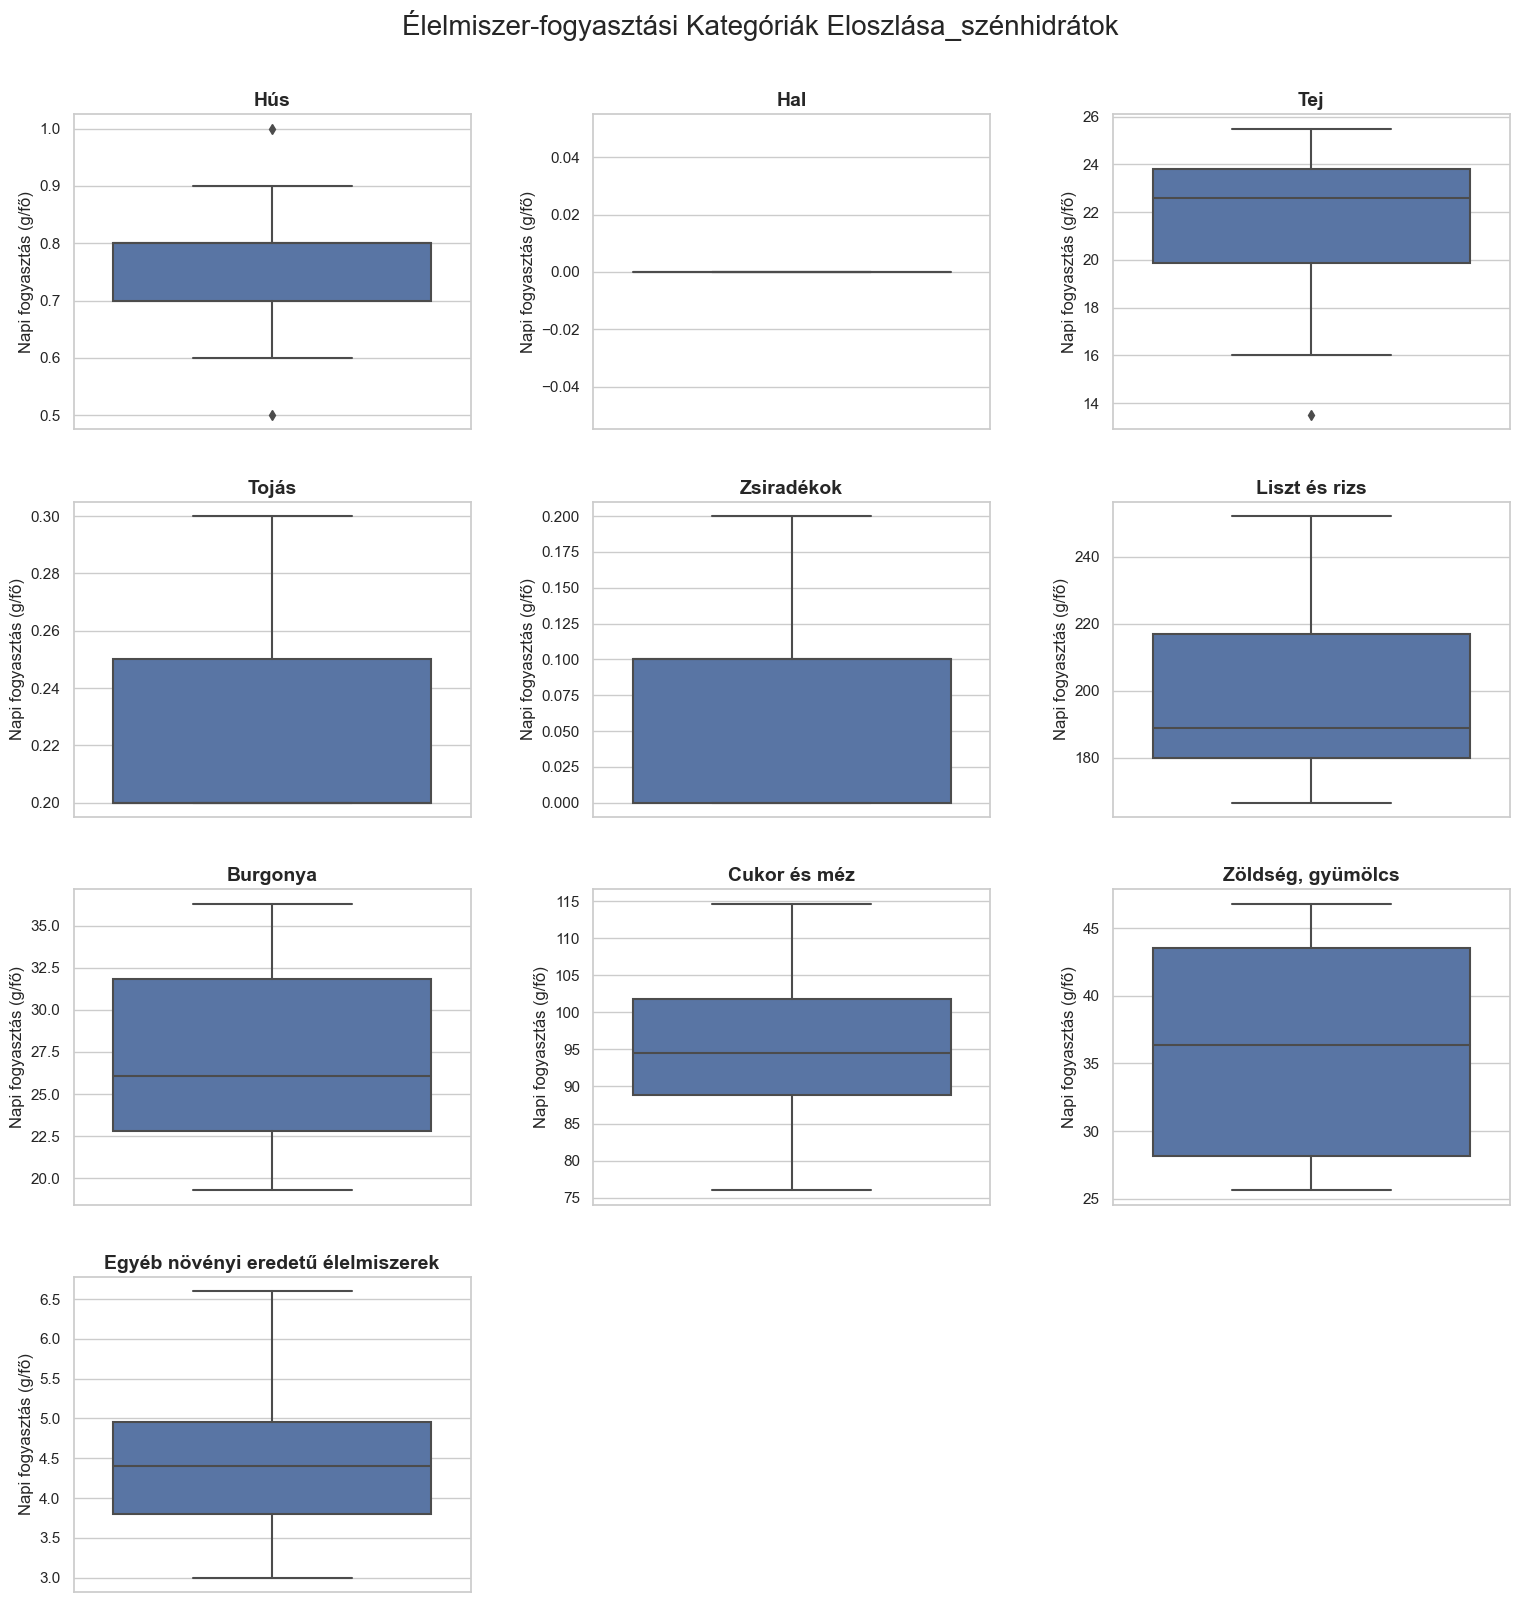

In [38]:

# A nem kívánt oszlopok listája
columns_to_drop = ['Év', 'Összesen']

# Először kiválasztjuk az ÖSSZES NUMERIKUS oszlopot,majd ezekből töröljük a nem kívántakat
# Az errors='ignore' biztosítja, hogy a kód akkor sem áll le hibával,
# ha valamelyik törlendő oszlop (pl. 'Év') nem is létezik a DataFrame-ben.
columns_to_plot = df_for_plotting_szh.columns.drop(columns_to_drop, errors='ignore').tolist()

# 2. Rács elrendezésének dinamikus meghatározása
n_cols = len(columns_to_plot)
plot_cols = 3  # Hány oszlop legyen egy sorban az ábrán
# Kiszámoljuk, hány sorra lesz szükség
plot_rows = (n_cols + plot_cols - 1) // plot_cols 

# 3. Ábra és tengelyek létrehozása a kiszámolt méretekkel
fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(16, 4 * plot_rows))
axes = axes.flatten() # "Kilapítjuk" a tengelyeket a könnyebb ciklushoz

# 4. Egyetlen ciklus az összes ábra kirajzolására
for i, col_name in enumerate(columns_to_plot):
    ax = axes[i]
    
    # A boxplotot a 'df_for_plotting_szh' DataFrame-ből készítjük
    sns.boxplot(data=df_for_plotting_szh, y=col_name, ax=ax)
    ax.set_title(col_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Napi fogyasztás (g/fő)')

# 5. A felesleges, üresen maradt ábrák elrejtése
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

# 6. Az ábra elrendezésének javítása és megjelenítése
plt.tight_layout(pad=3.0) # Növeljük a térközt a címek miatt
fig.suptitle('Élelmiszer-fogyasztási Kategóriák Eloszlása_szénhidrátok', fontsize=20, y=1.02) 
plt.show()

##### Kivételes értékek (Outliers) azonosítása-fehérjék napi egy főre jutó mennyisége(g) a különböző tápanyagokból

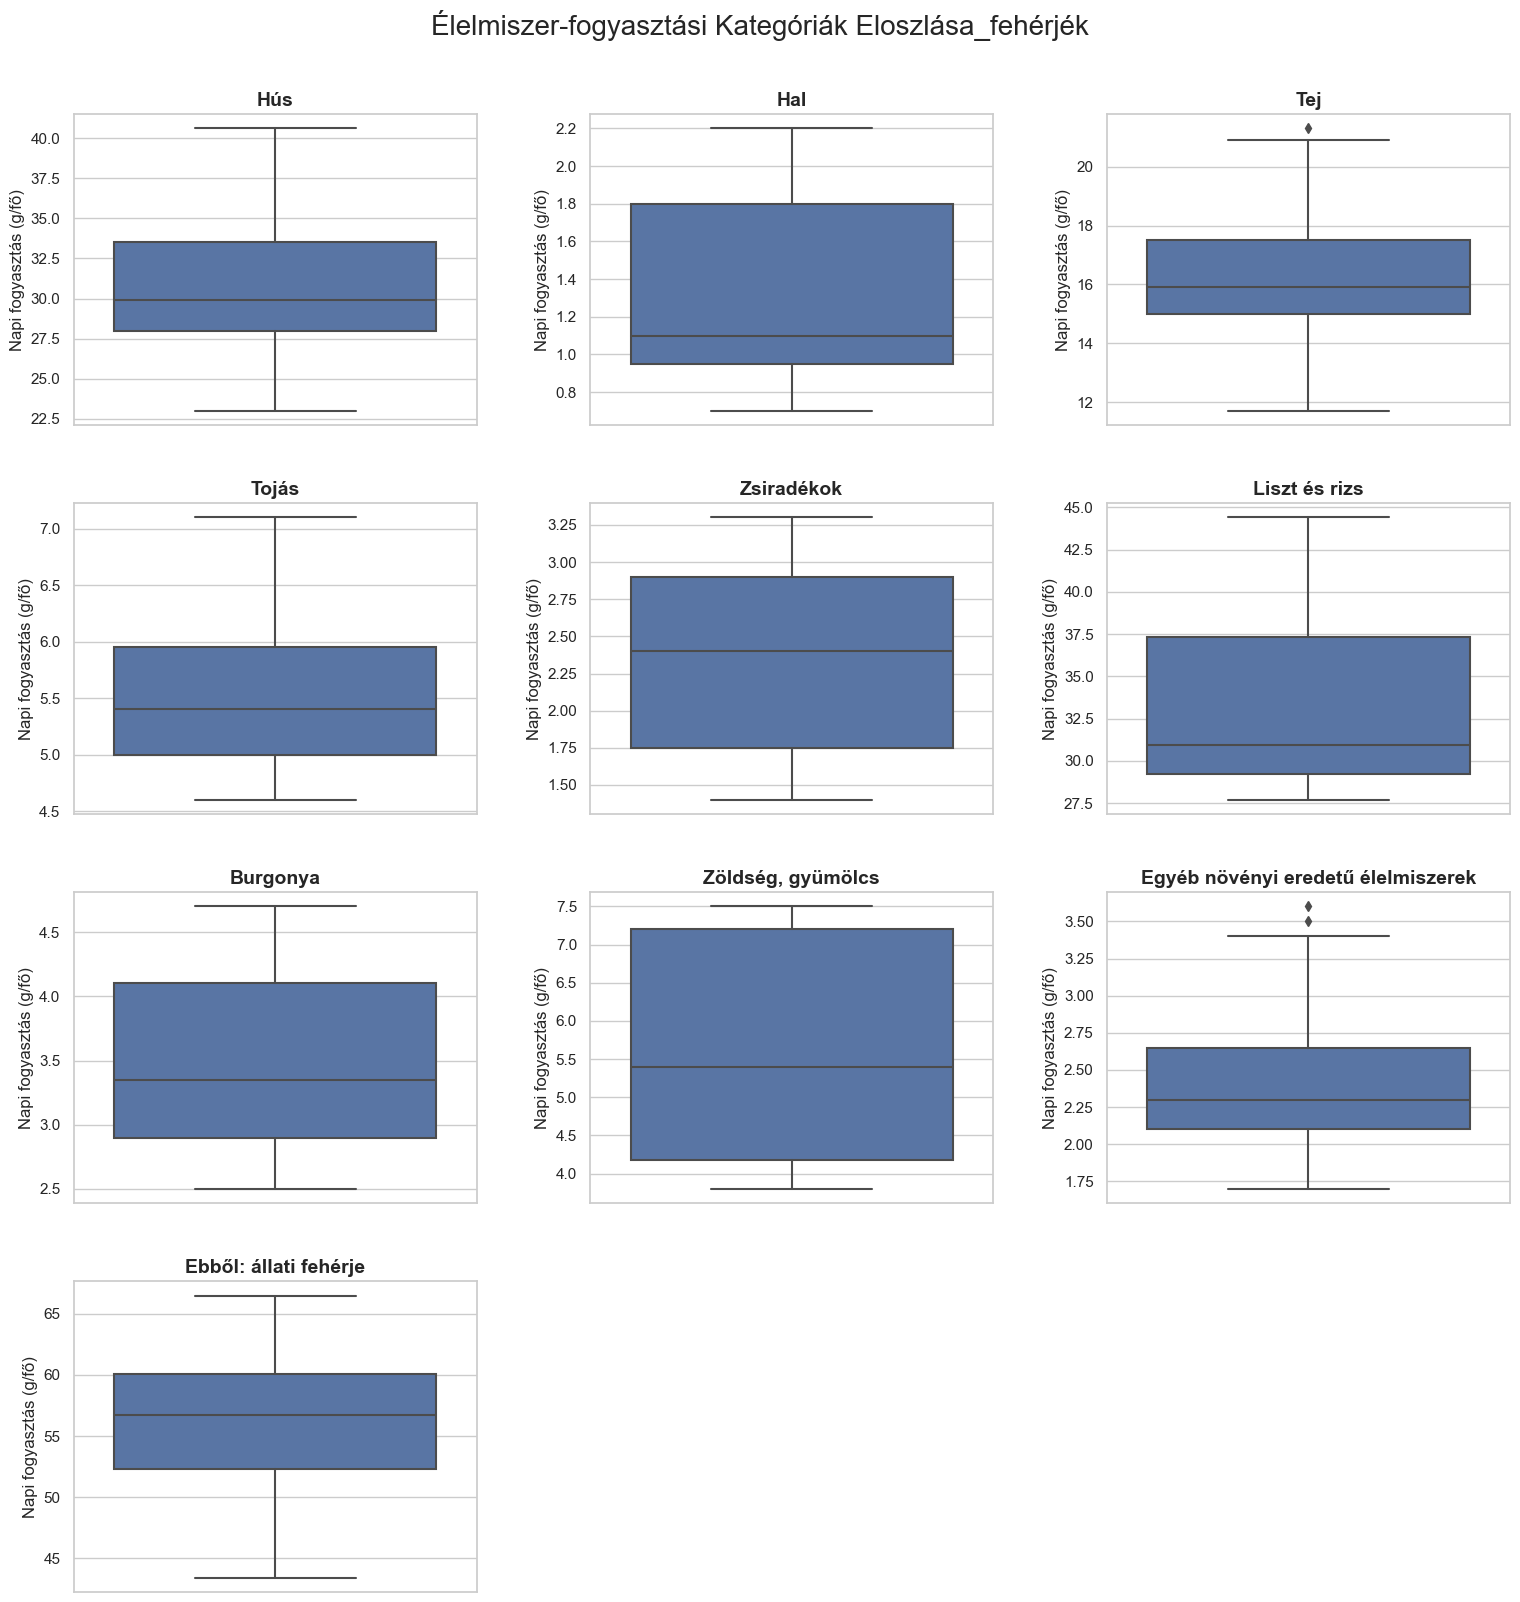

In [39]:

columns_to_drop_feh = ['Év', 'Összesen']
numeric_cols = df_for_plotting_feherje.select_dtypes(include=np.number) # Csak a numerikus oszlopok kiválasztása
columns_to_plot_feh = numeric_cols.columns.drop(columns_to_drop_feh, errors='ignore').tolist()

n_cols = len(columns_to_plot_feh)
plot_cols = 3
plot_rows = (n_cols + plot_cols - 1) // plot_cols 

fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(16, 4 * plot_rows))
axes = axes.flatten()

for i, col_name in enumerate(columns_to_plot_feh):
    ax = axes[i]
    # boxplot numerikus adatokból 
    sns.boxplot(data=df_for_plotting_feherje, y=col_name, ax=ax)
    ax.set_title(col_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Napi fogyasztás (g/fő)')

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
fig.suptitle('Élelmiszer-fogyasztási Kategóriák Eloszlása_fehérjék', fontsize=20, y=1.02)
plt.show()

##### Kivételes értékek (Outliers) azonosítása-zsirok napi egy főre jutó mennyisége(g) a különböző tápanyagokból

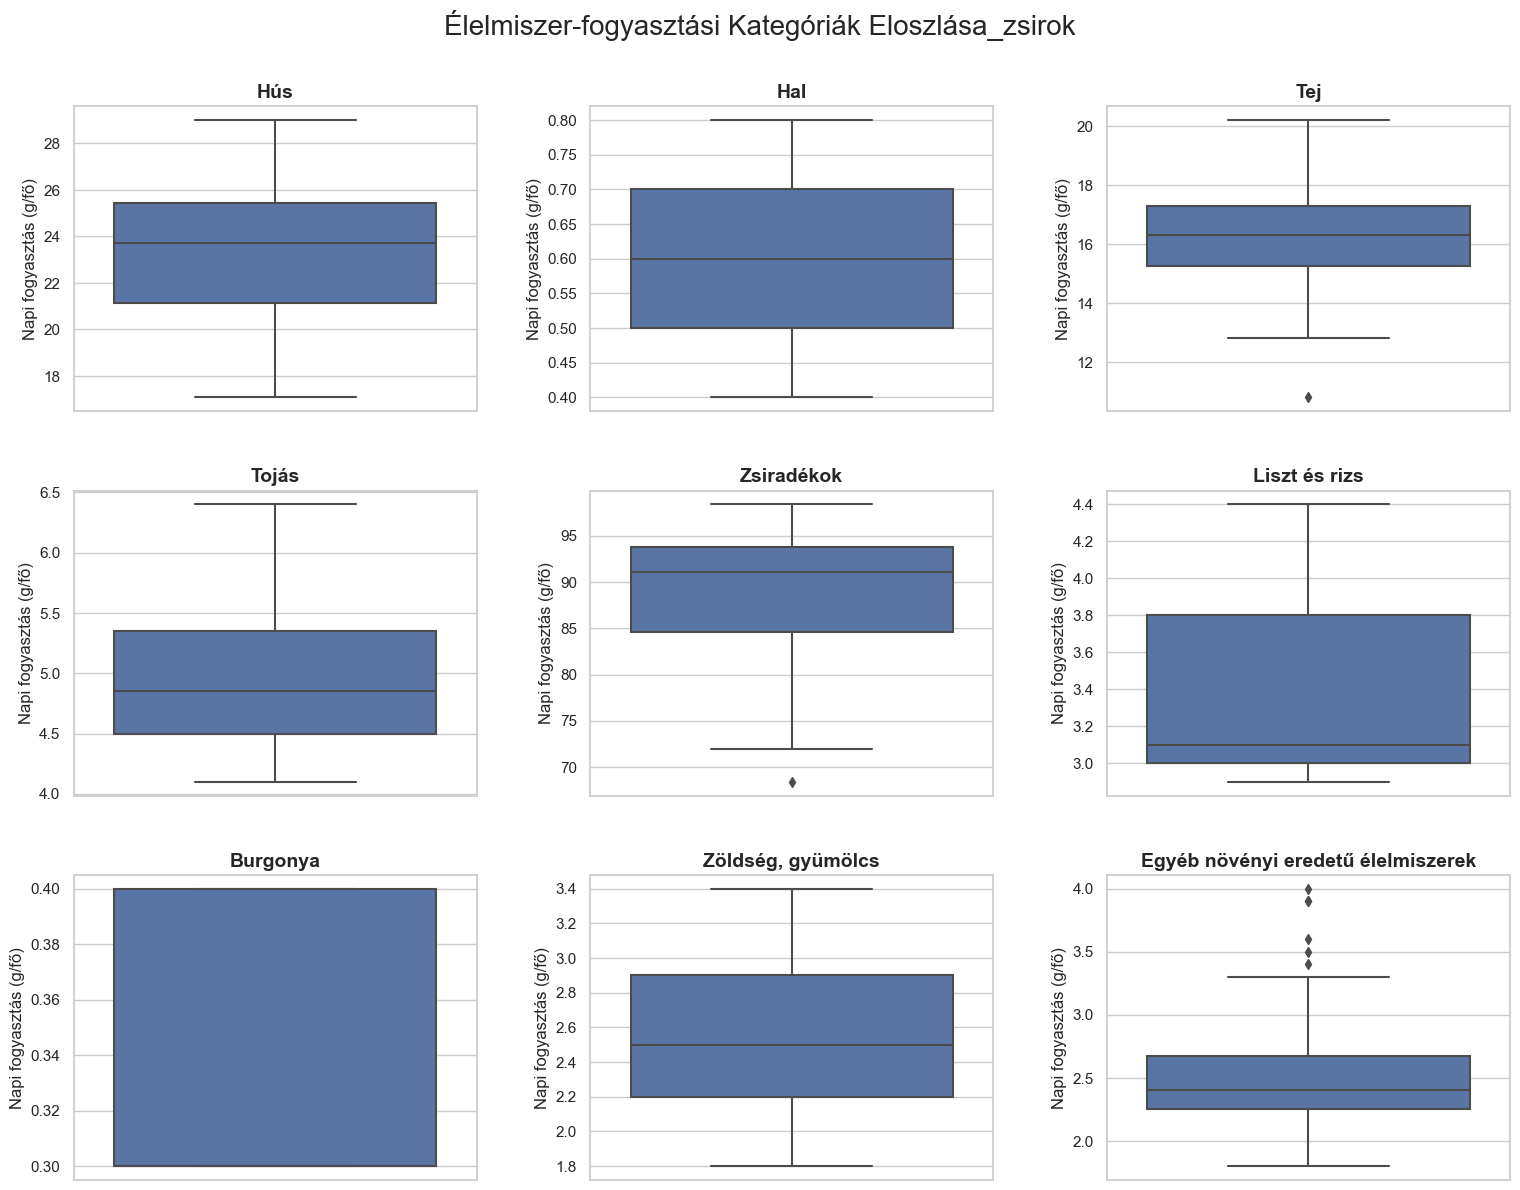

In [40]:

columns_to_drop_zsir = ['Év', 'Összesen']
numeric_cols = df_for_plotting_zsir.select_dtypes(include=np.number)
columns_to_plot_zsir = numeric_cols.columns.drop(columns_to_drop_zsir, errors='ignore').tolist()

n_cols = len(columns_to_plot_zsir)
plot_cols = 3
plot_rows = (n_cols + plot_cols - 1) // plot_cols 

fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(16, 4 * plot_rows))
axes = axes.flatten()

for i, col_name in enumerate(columns_to_plot_zsir):
    ax = axes[i]
 
    sns.boxplot(data=df_for_plotting_zsir, y=col_name, ax=ax)
    ax.set_title(col_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Napi fogyasztás (g/fő)')

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
fig.suptitle('Élelmiszer-fogyasztási Kategóriák Eloszlása_zsirok', fontsize=20, y=1.02)
plt.show()

In [36]:
print(df_zsir['Burgonya'].describe())

count    47.000000
mean      0.329787
std       0.046227
min       0.300000
25%       0.300000
50%       0.300000
75%       0.400000
max       0.400000
Name: Burgonya, dtype: float64


A jelenség oka, hogy az adatok nagy része mindössze két érték, a 0.3 és a 0.4 köré csoportosul.A boxplot technikailag helyes, az adatok több mint fele (legalább 50%-a) a 0.3-as értéken ül, míg a felső 25%-uk a 0.4-es értéken. Ez a kétpólusú eloszlás okozza a "lapos" vagy "összenyomott" kinézetet.

##### Kivételes értékek (Outliers) azonosítása-tápanyagok Egy főre jutó tápanyag napi mennyisége kilokalóriában

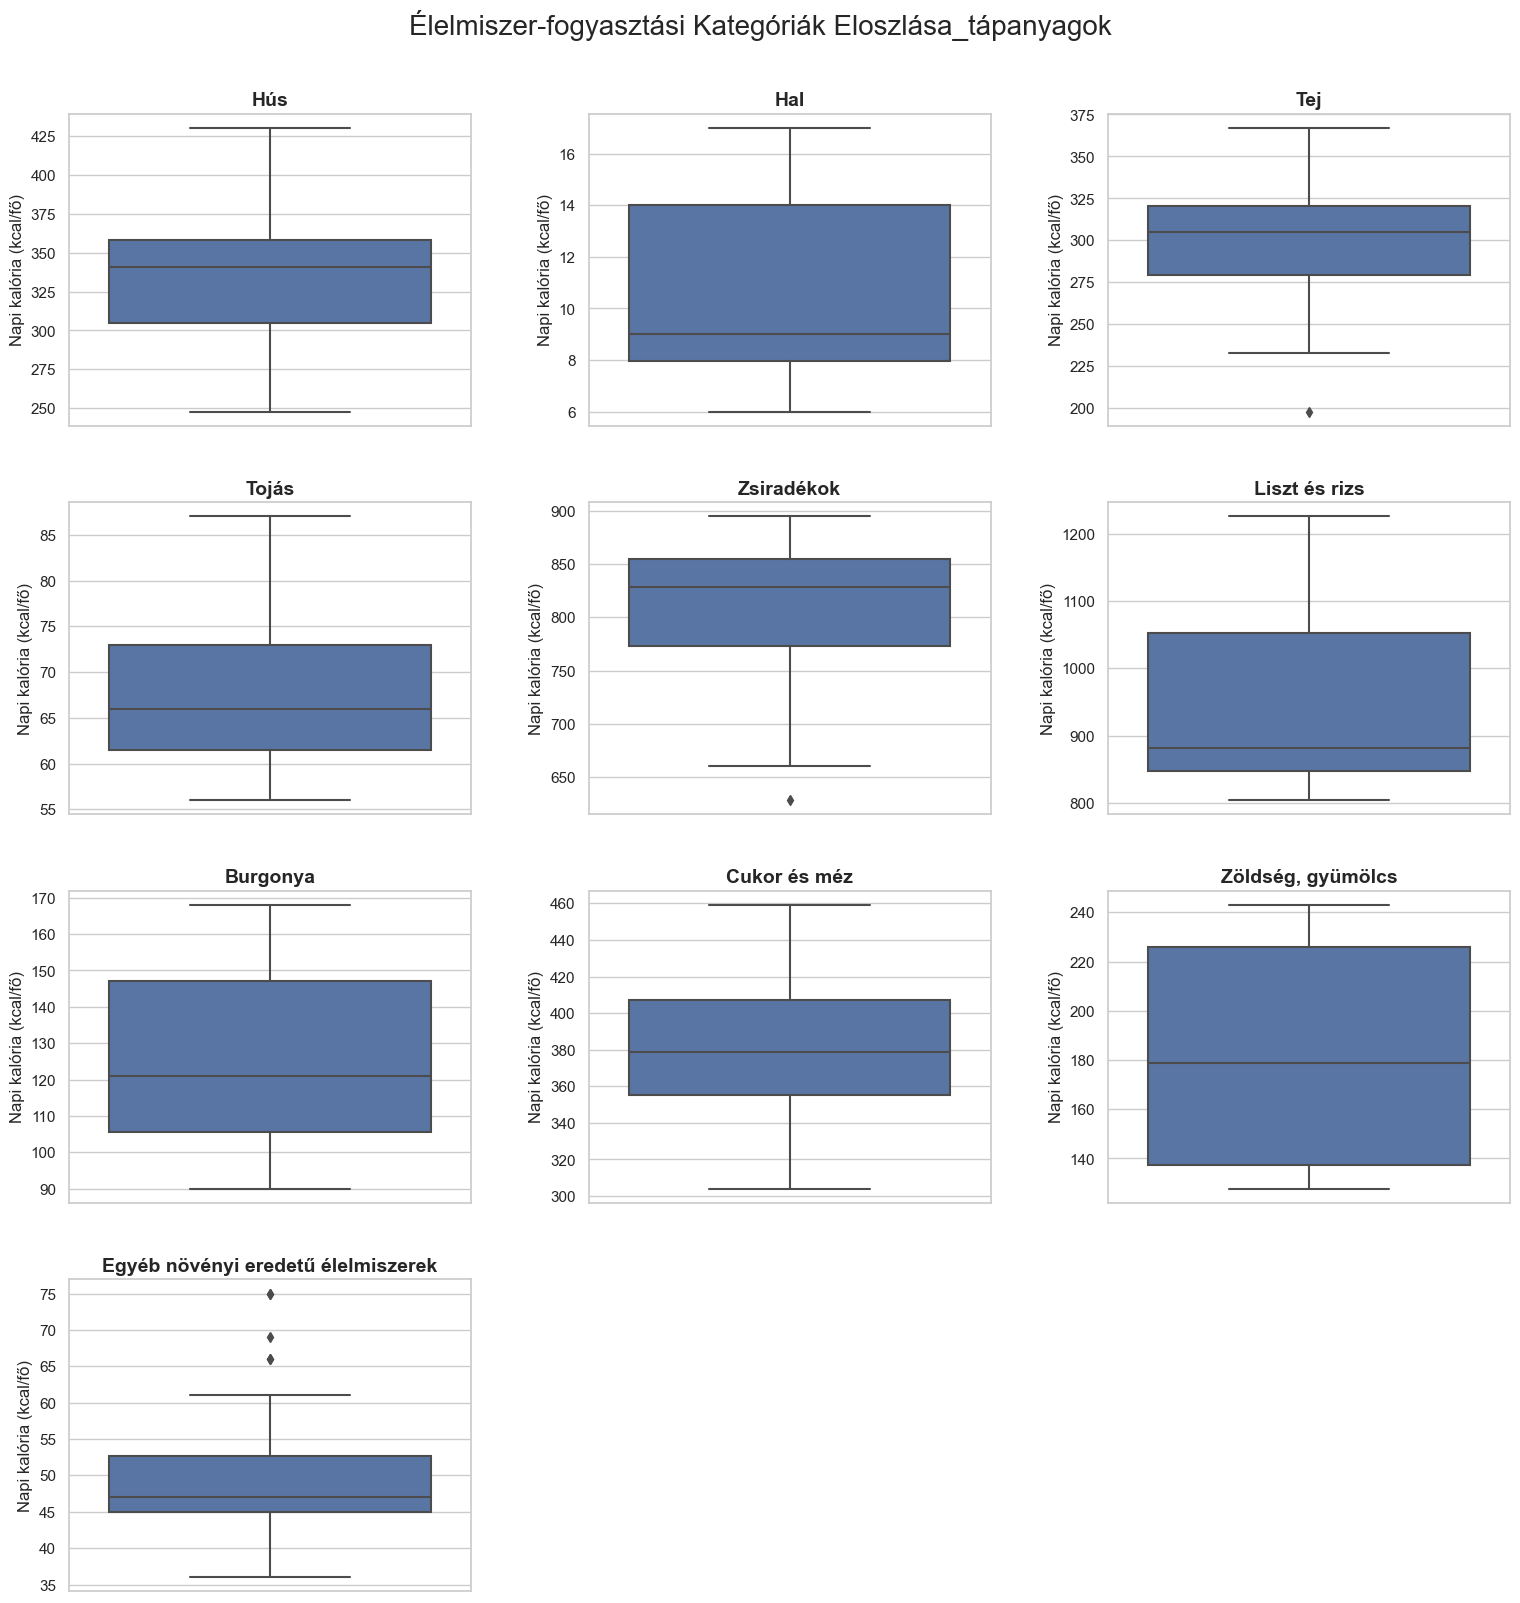

In [41]:

columns_to_drop_tapany = ['Év', 'Összesen']
numeric_cols = df_for_plotting_tapany.select_dtypes(include=np.number) 
columns_to_plot_tapany = numeric_cols.columns.drop(columns_to_drop_tapany, errors='ignore').tolist()

n_cols = len(columns_to_plot_tapany)
plot_cols = 3
plot_rows = (n_cols + plot_cols - 1) // plot_cols 

fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(16, 4 * plot_rows))
axes = axes.flatten()

for i, col_name in enumerate(columns_to_plot_tapany):
    ax = axes[i]
   
    sns.boxplot(data=df_for_plotting_tapany, y=col_name, ax=ax)
    ax.set_title(col_name, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Napi kalória (kcal/fő)')

for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
fig.suptitle('Élelmiszer-fogyasztási Kategóriák Eloszlása_tápanyagok', fontsize=20, y=1.02)
plt.show()

### Egyváltozós Elemzések (Univariate Analysis)

### Leíró statisztika

##### Szénhidrátok

In [42]:
df_for_plotting_szh.describe().T

,count,mean,std,min,25%,50%,75%,max
Év,47.0,2000.297872,13.771292,1970.000000,1989.500000,2001.000000,2011.500000,2023.000000
Hús,47.0,0.772091,0.099550,0.500000,0.700000,0.800000,0.800000,1.000000
Hal,47.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tej,47.0,21.630826,2.874597,13.500000,19.881628,22.600000,23.800000,25.500000
Tojás,47.0,0.225532,0.044075,0.200000,0.200000,0.200000,0.250000,0.300000
Zsiradékok,47.0,0.068085,0.059368,0.000000,0.000000,0.100000,0.100000,0.200000
Liszt és rizs,47.0,195.684209,21.265130,166.600985,180.003336,188.900000,217.000000,252.200000
Burgonya,47.0,27.342988,4.992210,19.300000,22.781710,26.057030,31.850000,36.300000
Cukor és méz,47.0,94.600926,9.938112,76.000000,88.900000,94.543651,101.833663,114.679803
"Zöldség, gyümölcs",47.0,35.605449,7.544448,25.643564,28.200000,36.400000,43.550000,46.800000


Értelmezés főbb pontok szerint
- Legjelentősebb szélnhidrát-forrás: Liszt és rizs. 
Az átlagos napi fogyasztás 195 g/fő, ami az összfogyasztás kb. 50%-a.
Szórása (±21 g) jelzi, hogy volt némi változás, de alapélelmiszerként domináns maradt.
- Második fő kategória: Cukor és méz.
Átlagosan 94 g/fő/nap → ez magas cukorbevitelre utal.
Szórás 9,9 g – enyhén csökkenő trend is lehet, de tartósan magas érték.
- Zöldség, gyümölcs és burgonya, 
Zöldség/gyümölcs: 35,6 g → alacsony, de nőhetett (75% kv.: 43,5 g), 
Burgonya: 27,3 g → lehetséges csökkenés, mivel max: 36,3 g, de jelenleg alacsonyabb, 
- Tej és tejtermékek
Tej: 21,6 g → viszonylag stabil, de nem túl jelentős, 
- Mikroszegmensek: tojás, hús, zsiradék, 
Ezek jelentéktelen szerepet játszanak a szh-fogyasztásban, mivel főként fehérje és zsírforrások.

Összesített napi fogyasztás:
- Átlag: 380 g/fő/nap
- Minimum: 347 g, Maximum: 425 g
- A teljes tartomány ~78 grammos különbség 47 év alatt → viszonylag kicsi ingadozás, stabil energiaszint

Lehetséges trendek (következtetések):

- A szénhidrátok 90%-át liszt/rizs és cukor/méz adja → egyszerű szénhidrát túlsúly	
- A növényi rostok forrása (zöldség, gyümölcs) alacsony → modern táplálkozási ajánlásoktól eltér	
- A viszonylag alacsony szórásokból ítélve lassú változások mentek végbe – nem drasztikus átalakulás

##### Zsírok

In [43]:
df_for_plotting_zsir.describe().T

,count,mean,std,min,25%,50%,75%,max
Év,47.0,2000.297872,13.771292,1970.000000,1989.500000,2001.000000,2011.500000,2023.0
Hús,47.0,23.133176,3.145595,17.077986,21.150000,23.700000,25.450000,29.0
Hal,47.0,0.582979,0.138814,0.400000,0.500000,0.600000,0.700000,0.8
Tej,47.0,16.278485,1.857589,10.800000,15.255823,16.300000,17.300000,20.2
Tojás,47.0,4.929045,0.580924,4.100000,4.500000,4.851485,5.350000,6.4
Zsiradékok,47.0,89.007940,7.024255,68.400000,84.650000,91.100000,93.800000,98.4
Liszt és rizs,47.0,3.324429,0.412188,2.900000,3.000000,3.100000,3.800000,4.4
Burgonya,47.0,0.329787,0.046227,0.300000,0.300000,0.300000,0.400000,0.4
"Zöldség, gyümölcs",47.0,2.578723,0.419594,1.800000,2.200000,2.500000,2.900000,3.4
Egyéb növényi eredetű élelmiszerek,47.0,2.575635,0.532735,1.800000,2.250000,2.400000,2.677434,4.0


Értelmezés:
- Átlagosan nagyon magas zsírbevitel, 
A napi átlag 89 gramm zsír már közel a WHO által javasolt felső határ.
A magyar lakosság zsírfogyasztása tartósan magas, ami szív- és érrendszeri kockázatra utalhat.

- Kicsi szórás → stabil, de magas bevitel, 
Szórás ±7 g, ami azt jelenti, hogy:
az emberek következetesen ennyit fogyasztottak,
nincs jelentős csökkenő trend (vagy legalábbis nem drasztikus).

- Trend és eloszlás
Minimum (68,4 g) is elég magas, ami arra utal, hogy még a legjobb év(ek)ben sem esett sokat vissza a zsírbevitel.
Maximum: 98,4 g → valószínűleg a 90-es vagy 2000-es évek elején volt a csúcs.

- Medián vs átlag
Medián: 91,1 g → ez magasabb az átlagnál (89 g), tehát az eloszlás enyhén balra ferdül, vagyis a zsírfogyasztás kissé csökkent az utóbbi években.


A zsírbevitel messze legnagyobb részét a Zsiradékok kategória adja, átlagosan 89 g/nap. Ez a kategória valószínűleg a sütéshez-főzéshez használt olajokat, vajat, margarint, zsírt és egyéb, ételekhez adott zsiradékokat foglalja magában.
- Másodlagos források: Az állati eredetű élelmiszerek, a Hús (23.1 g/nap) és a Tej (16.3 g/nap) szintén jelentős, de a hozzáadott zsíroknál jóval kisebb mértékű források.
- Minimális források: A többi kategória, mint a Hal (0.6 g/nap) vagy a Tojás (4.9 g/nap), elenyésző mértékben járul hozzá a zsírbevitelhez. A Liszt és rizs (3.3 g/nap) és a Burgonya (0.3 g/nap) alacsony zsírtartalma szintén reális.

    A Zsiradékok (std: 7.0) és a Hús (std: 3.1) fogyasztásának változékonysága volt a legnagyobb.
Ezzel szemben a Burgonya (std: 0.046) és a Hal (std: 0.13) zsírtartalma szinte alig változott, ami a konzisztensen alacsony szintjüket mutatja.

Átlagos teljes zsírbevitel: A teljes napi zsírbevitel átlagosan 142.7 gramm volt a vizsgált időszakban.
Jelentős ingadozás: A min (115.5 g) és max (158.6 g) értékek mutatják, hogy a teljes zsírbevitel is jelentősen változott az évek során, a leggyengébb és legerősebb év között több mint 40 gramm volt a napi különbség.

Következtetés

A magyar étrend zsírbevitelének gerincét a vizsgált időszakban nem a húsokban vagy tejtermékekben természetesen előforduló, hanem a közvetlenül az ételekhez adott zsiradékok adták. Ezen fő zsírforrások bevitele – a teljes zsírbevitellel együtt – jelentősen ingadozott az évtizedek során, ami a táplálkozási szokások folyamatos változására utal.
- A magyar étrend zsírdús volt a vizsgált időszak alatt
- Nincs érdemi csökkenő tendencia – stabilan túl magas érték
- Kardiometabolikus szempontból ez kockázatot jelez (hiperkalória, elhízás, érrendszeri betegségek)
- Kisebb mértékű javulás (max → medián → min) utalhat enyhe étrendváltásra az utóbbi 10–15 évben

##### Fehérjék

In [44]:
df_for_plotting_feherje.describe().T

,count,mean,std,min,25%,50%,75%,max
Év,47.0,2000.297872,13.771292,1970.000000,1989.500000,2001.000000,2011.50,2023.0
Hús,47.0,30.673167,4.658632,23.000987,27.957827,29.900000,33.55,40.6
Hal,47.0,1.361475,0.497407,0.700000,0.950000,1.100000,1.80,2.2
Tej,47.0,16.391842,2.081747,11.700000,15.000000,15.900000,17.50,21.3
Tojás,47.0,5.501654,0.626449,4.600000,5.000000,5.400000,5.95,7.1
Zsiradékok,47.0,2.348047,0.614791,1.400000,1.750000,2.400000,2.90,3.3
Liszt és rizs,47.0,32.634009,4.339456,27.700000,29.200000,30.952381,37.35,44.4
Burgonya,47.0,3.522353,0.643064,2.500000,2.900000,3.349754,4.10,4.7
"Zöldség, gyümölcs",47.0,5.564945,1.458612,3.800000,4.175099,5.400000,7.20,7.5
Egyéb növényi eredetű élelmiszerek,47.0,2.431503,0.425865,1.700000,2.100000,2.300000,2.65,3.6


Általános megfigyelések:

- Minden oszlopban (kivéve a Cukor és méz) 47 adatpont található, ami a rendelkezésre álló évek számának felel meg (1970-2023).
- A Cukor és méz oszlopban 0 adatpont van, a mean, std, min, max stb. értékeik NaN (Nem egy szám). Ez azt jelzi, hogy ebből a forrásból nem számoltak fehérjebevitelt az adatkészletben (valószínűleg azért, mert elhanyagolható).
- Egyedi kategóriák elemzése (fehérjebevitel gramm/fő/nap):

Hús:

- Átlag (mean): 30.67 g/nap. Ez az egyik legjelentősebb fehérjeforrás.
- Szórás (std): 4.66 g/nap. Viszonylag nagy szórás, ami az időbeli változékonyságot jelzi.
- Tartomány (min-max): 23.00 g/nap (min) és 40.60 g/nap (max).

Hal:

- Átlag (mean): 1.36 g/nap. Nagyon alacsony fehérjebevitel forrás.
- Szórás (std): 0.50 g/nap. Kisebb szórás a Húshoz képest, de az alacsony átlaghoz képest viszonylag nagy a variabilitás.
- Tartomány (min-max): 0.70 g/nap (min) és 2.20 g/nap (max).

Tej:

- Átlag (mean): 16.39 g/nap. Jelentős fehérjeforrás.
- Szórás (std): 2.08 g/nap. Mérsékelt szórás.
- Tartomány (min-max): 11.70 g/nap (min) és 21.30 g/nap (max).

Tojás:

- Átlag (mean): 5.50 g/nap. Közepes fehérjeforrás.
- Szórás (std): 0.63 g/nap. Viszonylag stabil forrás, alacsony variabilitással.
- Tartomány (min-max): 4.60 g/nap (min) és 7.10 g/nap (max).

Zsiradékok:

- Átlag (mean): 2.35 g/nap. Alacsony fehérjebevitel forrás.
- Szórás (std): 0.61 g/nap. Mérsékelt variabilitás.
- Tartomány (min-max): 1.40 g/nap (min) és 3.30 g/nap (max).

Liszt és rizs:

- Átlag (mean): 32.63 g/nap. Ez a legjelentősebb fehérjeforrás az összes kategória közül (átlagban magasabb, mint a Hús).
- Szórás (std): 4.34 g/nap. Viszonylag nagy szórás, ami csökkenést tükröz.
- Tartomány (min-max): 27.70 g/nap (min) és 44.40 g/nap (max).

Burgonya:

- Átlag (mean): 3.52 g/nap. Kis fehérjeforrás.
- Szórás (std): 0.64 g/nap. Alacsony variabilitás.
- Tartomány (min-max): 2.50 g/nap (min) és 4.70 g/nap (max).

Zöldség, gyümölcs:

- Átlag (mean): 5.56 g/nap. Közepes fehérjeforrás, a Tojáshoz hasonló szinten.
- Szórás (std): 1.46 g/nap. Viszonylag magas variabilitás, jelezve a fogyasztás időbeli változását (növekedését).
- Tartomány (min-max): 3.80 g/nap (min) és 7.50 g/nap (max).

Egyéb növényi eredetű élelmiszerek:

- Átlag (mean): 2.43 g/nap. Kis fehérjeforrás.
- Szórás (std): 0.43 g/nap. Alacsony variabilitás.
- Tartomány (min-max): 1.70 g/nap (min) és 3.60 g/nap (max).


Állati fehérje:

Átlag (mean): 56.24 g/nap. Az összes fehérjebevitel több mint felét (kb. 56%) az állati források adják.
Szórás (std): 5.55 g/nap.


- A Liszt és rizs átlagosan a legnagyobb napi fehérjeforrás a magyar étrendben (32.63 g/nap), ezt követi a Hús (30.67 g/nap).
- Az állati fehérje (56.24 g/nap) domináns az összes fehérjebevitelen belül (100.43 g/nap).
- A Hal és a Zsiradékok elhanyagolható mértékben járulnak hozzá a napi fehérjebevitelhez.
- Jelentős variabilitás (std) figyelhető meg az idő múlásával a főbb forrásoknál, mint a Hús (4.66) és a Liszt és rizs (4.34),  - A Zöldség, gyümölcs is viszonylag nagy szórást mutat (1.46), ami a növekvő tendenciára utal.

Következtetés

A magyar étrend fehérjeellátásának alapját a vizsgált időszakban stabilan a gabonafélék adták. Az állati eredetű források (hús, tej) bár jelentősek, bevitelük sokkal inkább ingadozott a gazdasági és társadalmi változások függvényében. A hal és a tojás, bár ismert fehérjeforrások, a teljes napi bevitelhez képest elenyésző szerepet játszottak.
Az adatok a fehérjebevitel évtizedes változásait írják le, az étrendi mintázatok eltolódtak.
A medián (50%) és az átlag (mean) viszonylag közel állnak egymáshoz a legtöbb kategóriában, de a Liszt és rizs és a Tej esetében az átlag kissé magasabb, mint a medián, ami enyhe jobbra ferdeségre utalhat az eloszlásban, tükrözve a trendeket.

##### Tápanyagok

In [45]:
df_for_plotting_tapany.describe().T

,count,mean,std,min,25%,50%,75%,max
Év,47.0,2000.297872,13.771292,1970.000000,1989.500000,2001.000000,2011.500000,2023.0000
Hús,47.0,335.502324,45.591569,247.778875,304.500000,341.000000,358.500000,430.4000
Hal,47.0,11.111638,3.662222,6.000000,7.948432,9.000000,14.000000,17.0000
Tej,47.0,299.655624,34.173645,198.000000,279.617994,305.000000,320.500000,367.0000
Tojás,47.0,67.346761,7.786300,56.000000,61.500000,66.000000,73.000000,87.0000
Zsiradékok,47.0,811.676887,63.212879,628.000000,773.000000,829.000000,855.000000,895.0000
Liszt és rizs,47.0,932.497473,111.732219,804.000000,847.500000,882.000000,1052.000000,1226.0000
Burgonya,47.0,126.550499,22.817141,90.000000,105.683897,120.943953,147.000000,168.0000
Cukor és méz,47.0,378.471432,39.883577,304.000000,355.500000,378.968254,407.435644,459.1133
"Zöldség, gyümölcs",47.0,179.952495,43.041784,127.722772,137.539164,179.000000,226.000000,243.0000


Napi Energiaforrások (kcal/fő)
    
Az átlag (mean) oszlop megmutatja, hogy mely kategóriák adták a legtöbb energiát egy átlagos napon.
- Elsődleges energiaforrások: A napi kalóriabevitel abszolút domináns forrása a Liszt és rizs (átlagosan 932 kcal/nap) és a Zsiradékok (811 kcal/nap). Ez a két kategória önmagában a teljes napi energia több mint felét adja.
- Másodlagos energiaforrások: Jelentős energiát biztosított még a Cukor és méz (378 kcal), a Hús (335 kcal) és a Tej (299 kcal).
- Kisebb mértékű források: A Zöldség, gyümölcs (180 kcal) és a Burgonya (126 kcal) hozzájárulása már jóval kisebb.
- Elenyésző források: A Tojás (67 kcal) és különösen a Hal (11 kcal) szinte alig játszott szerepet az energiaellátásban.

Az Energiaforrások Ingadozása (std)
A szórás (std) oszlop megmutatja, mennyire volt stabil az egyes kategóriákból származó energiabevitel.
- Legváltozékonyabb: A fő energiaforrások, különösen a Liszt és rizs (std: 111.7) és a Zsiradékok (std: 63.2) bevitele ingadozott a leginkább. Ez azt jelenti, hogy ezeknek a központi szerepe az évek során hol erősödött, hol gyengült.
- Legstabilabb: A legkisebb energiabevitelt adó kategóriák, mint a Hal (std: 3.6) és a Tojás (std: 7.7) voltak a legstabilabbak.

A Teljes Kalóriabevitel (Összesen sor)
- Magas átlagbevitel: Az átlagos teljes napi energiabevitel 3193 kcal volt, ami magasnak számít.
- Jelentős történelmi ingadozás: A min (2921 kcal) és max (3496 kcal) értékek közötti több mint 570 kcal-ás különbség azt mutatja, hogy a teljes kalóriabevitel jelentősen változott a vizsgált időszak alatt.

Következtetés

A vizsgált időszak kalória-alapját elsöprő többségben a gabonafélék és a hozzáadott zsírok biztosították. Az energiaellátás nem kiegyensúlyozott, hanem erre a két fő, de időben erősen ingadozó forrásra támaszkodik. A teljes kalóriabevitel nagymértékű változása az évtizedek alatt jelentős életmódbeli és táplálkozási változásokra utal.

### Sűrűségdiagramok

##### Tápanyagok

Ahhoz, hogy a sűrűségfüggvény (amelynek a területe 1) és a hisztogram (ami darabszámot, azaz gyakoriságot mutat) egy ábrán értelmesen megjelenjen, a hisztogramot is "normalizálni" kell. Ezt a hist() függvény density=True paraméterével tehetjük meg. Így a hisztogram oszlopainak területe is 1 lesz, és a két ábra y-tengelye összeillik.

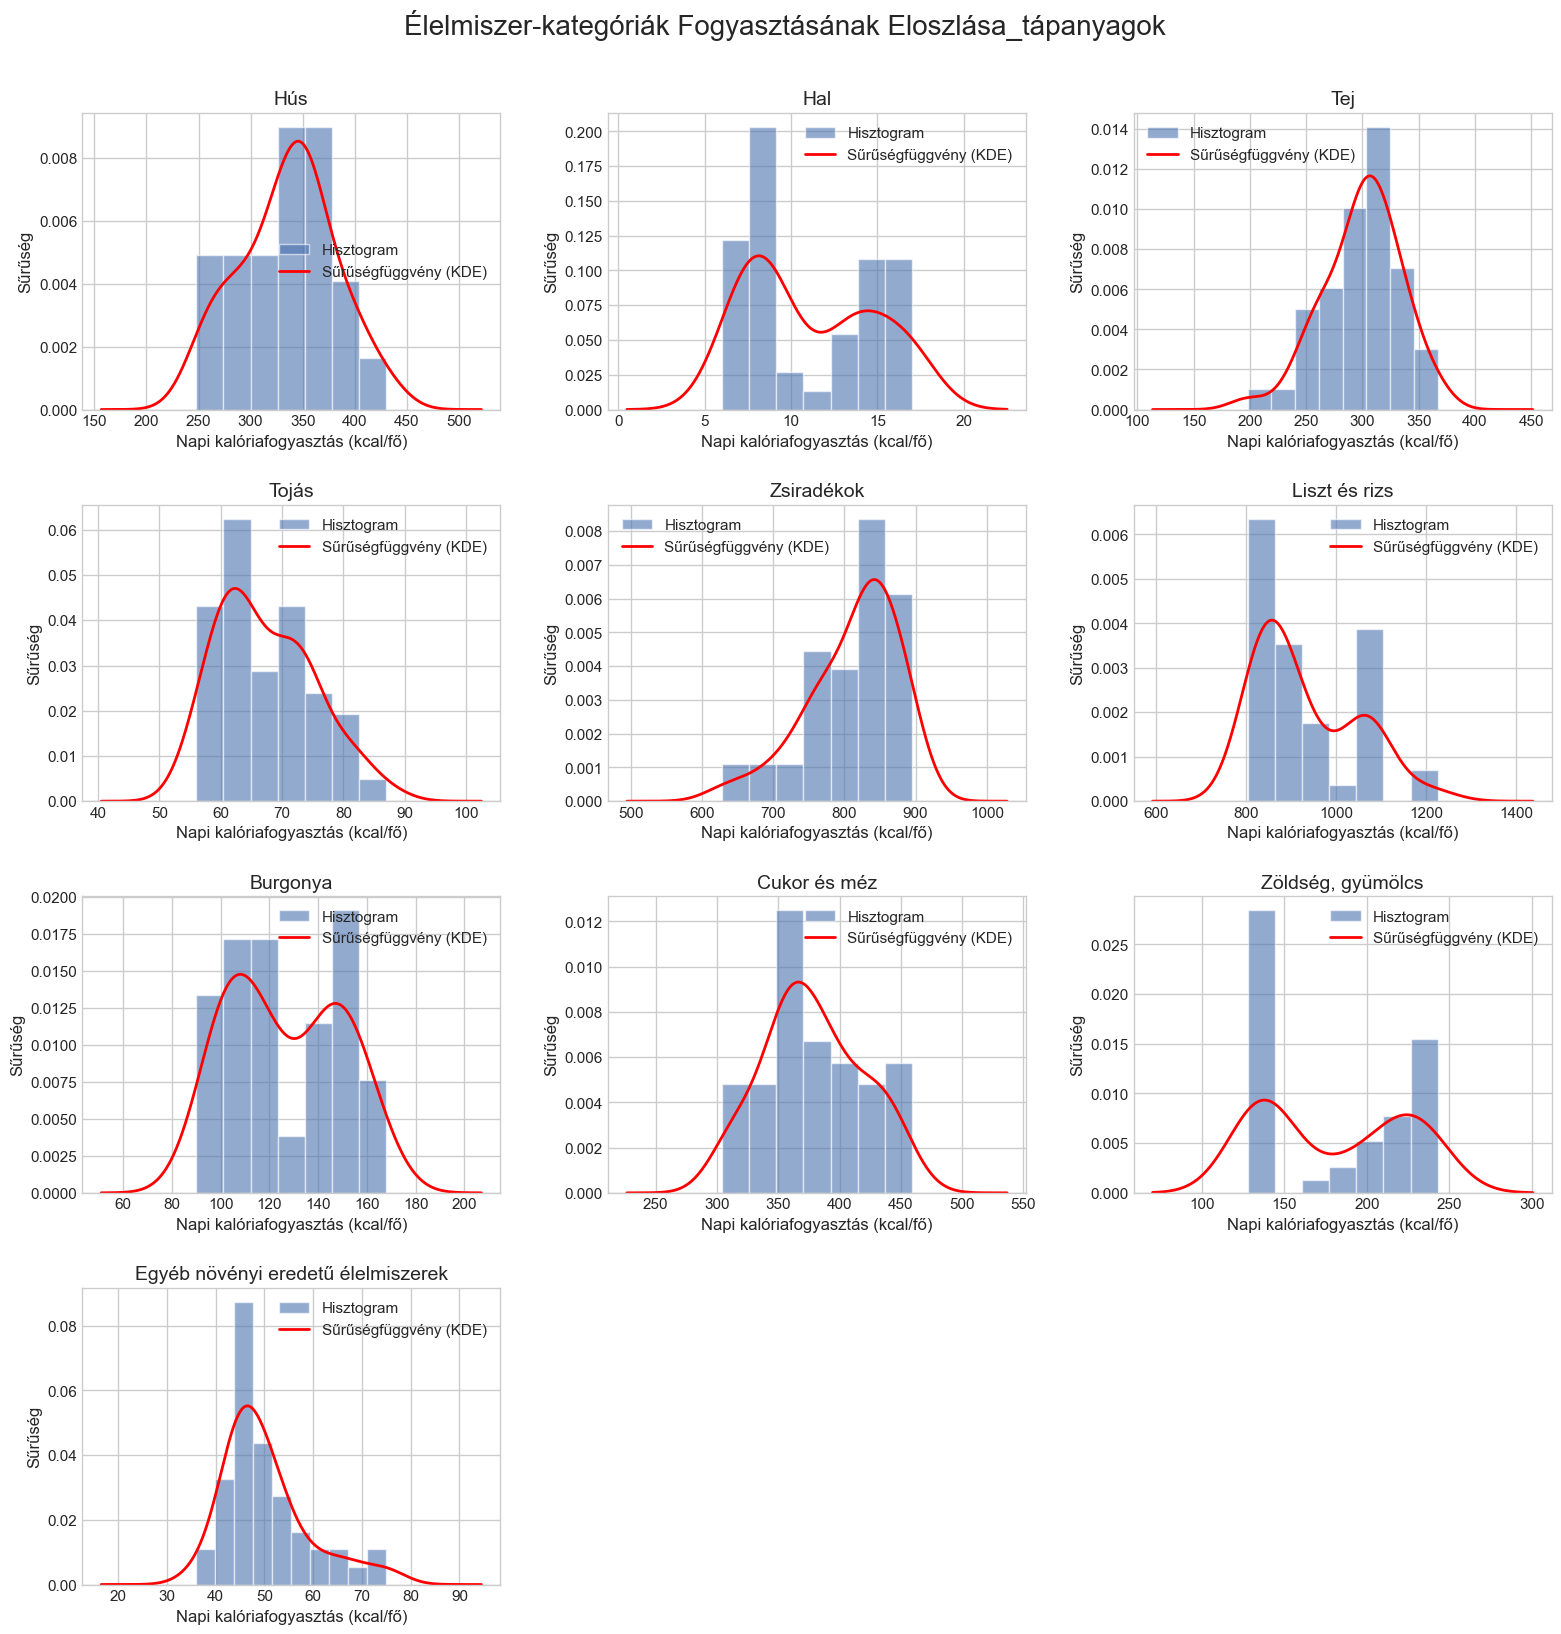

In [157]:

# Oszlopok, amiket ki szeretnénk hagyni az ábrázolásból
columns_to_drop = ['Év', 'Összesen']

# Az ábrázolandó oszlopok listájának összeállítása:
# Csak a numerikus oszlopokat választjuk ki.
# Kiszűrjük azokat az oszlopokat, amelyeket a 'columns_to_drop' listában megadtunk.
# Ellenőrizzük, hogy az oszlop létezik-e, mielőtt elhagynánk a 'drop' metódussal.
existing_cols_to_drop = [col for col in columns_to_drop if col in df_for_plotting_tapany.columns]
columns_to_plot = df_for_plotting_tapany.select_dtypes(include=np.number).columns.drop(existing_cols_to_drop, errors='ignore').tolist()

# Meghatározzuk az aldiagramok rácsméretét
n_cols = len(columns_to_plot)
plot_cols = 3 # 3 oszlop per sor
plot_rows = (n_cols + plot_cols - 1) // plot_cols # Sorok száma felfelé kerekítve

# Létrehozzuk az ábrát és az aldiagramok rácsát
fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(16, 4 * plot_rows))
axes = axes.flatten() # Az aldiagramok 2D-s tömbjének lapítása az egyszerű iterációhoz

# Iterálunk minden oszlopon, és elkészítjük a hisztogramot és a KDE diagramot
for i, col_name in enumerate(columns_to_plot):
    ax = axes[i]
    ax.set_title(col_name, fontsize=14)
    
    # Ellenőrizzük, hogy az oszlop numerikus adatokat tartalmaz-e és vannak-e érvényes bejegyzések
    if pd.api.types.is_numeric_dtype(df_for_plotting_tapany[col_name].dtype):
        valid_data = df_for_plotting_tapany[col_name].dropna()
        
        if len(valid_data) > 1: # Legalább 2 pont szükséges a KDE-hez
            # Hisztogram ábrázolása
            ax.hist(valid_data, bins='auto', edgecolor='white', density=True, alpha=0.6, label='Hisztogram')
            # Sűrűségfüggvény (Kernel Density Estimate - KDE) ábrázolása
            valid_data.plot(kind='kde', ax=ax, color='red', linewidth=2, label='Sűrűségfüggvény (KDE)')
            
            # Tengelyfeliratok beállítása (kcal/fő, a korábbi kontextus alapján)
            ax.set_xlabel('Napi kalóriafogyasztás (kcal/fő)') 
            ax.set_ylabel('Sűrűség')
            ax.legend() # Jelmagyarázat megjelenítése
        else:
            # Ha nincs elég adat, szöveges üzenet megjelenítése
            ax.text(0.5, 0.5, 'Nincs elég adat', ha='center', va='center', fontsize=12, alpha=0.5, transform=ax.transAxes)
            # Tengelyjelölések elrejtése
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=2.0)
fig.suptitle('Élelmiszer-kategóriák Fogyasztásának Eloszlása_tápanyagok', fontsize=20, y=1.03) # Főcím
plt.show()

# Az ábra mentése fájlba
#plt.savefig('density_diagrams_from_df_tapany.png')


Specifikus kategória megfigyelések:

- Hús: Valamennyire szimmetrikus, vagy enyhén jobbra ferde. A csúcs 300-350 kcal/fő körül van.
- Hal: Nagyon alacsony fogyasztású, 5-10 kcal/fő körül tetőzött, és erősen jobbra ferde. Ez azt mutatja, hogy a legtöbben nagyon kevés kalóriát fogyasztanak halból naponta.
- Tej: Bimodálisnak tűnik, vagy legalábbis laposabb csúcsú, két kiemelkedő módussal 200-250 és 300-350 kcal/fő körül. Jobbra ferdeséget is mutat.
- Tojás: Meglehetősen szimmetrikus, 60-70 kcal/fő körül tetőzött.
- Zsiradékok: Egyértelmű bimodális eloszlású, egyik csúcsa 600-650 kcal/fő körül, a másik 700-750 kcal/fő körül van. 
- Liszt és rizs: Valamennyire szimmetrikus, vagy enyhén balra ferde, széles csúccsal 1000-1200 kcal/fő körül. Ez az egyik legmagasabb kalóriahozzájáruló.
- Burgonya: Valamennyire szimmetrikus, vagy enyhén jobbra ferde, 100-150 kcal/fő körül tetőzött.
- Cukor és méz: Meglehetősen szimmetrikus, 350-400 kcal/fő körül tetőzött.
- Zöldség, gyümölcs: Jobbra ferde, csúcsa 100-150 kcal/fő körül van, de hosszabb farokrésszel a magasabb fogyasztás felé.
- Egyéb növényi eredetű élelmiszerek: Jobbra ferde, 50-60 kcal/fő körül tetőzött.

Összehasonlítás/Főbb betekintések:

A Liszt és rizs, valamint a Zsiradékok egyértelműen a legmagasabb átlagos kalóriabevitelű kategóriák, amint azt az eloszlási csúcsaik sokkal magasabb kcal/fő értékeknél mutatják.
A Tej és Zsiradékok esetében megfigyelt bimodalitás megfigyelhető a kalóriabevitelre vonatkozóan, ami különböző fogyasztási mintázatokra vagy fogyasztói csoportokra utalhat ezeknél a kategóriáknál.
Sok kategória mutat jobbra ferdeséget (Hal, Zöldség, gyümölcs), ami az alacsonyabb fogyasztás nagyobb gyakoriságára és a nagyon magas fogyasztás ritkább előfordulására utal.
A diagramok világos vizuális képet adnak a napi kalóriabevitel eloszlásáról a különböző élelmiszerforrásokból, alátámasztva a korábbi statisztikai elemzéseket.

##### Elsődleges tápanyagforrások-szénhidrát

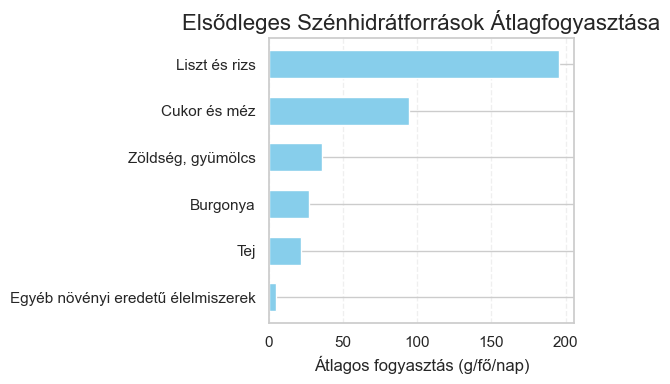

In [79]:
szh_kategoriak = ['Tej','Liszt és rizs', 'Burgonya', 'Cukor és méz','Zöldség, gyümölcs','Egyéb növényi eredetű élelmiszerek']
df_csak_szh =df_szh[szh_kategoriak]

plt.figure(figsize=(6, 4))

# ascending=True: a leghosszabb oszlop lesz legfelül
# kind='barh': ez hozza létre a vízszintes oszlopdiagramot
df_csak_szh.mean().sort_values(ascending=True).plot(kind='barh', color='skyblue', width=0.6)

# Címek és feliratok felcserélve és módosítva
plt.title('Elsődleges Szénhidrátforrások Átlagfogyasztása', fontsize=16)
plt.xlabel('Átlagos fogyasztás (g/fő/nap)') 
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.3) 
plt.tight_layout() 
plt.show()

##### Elsődleges tápanyagforrások-zsír

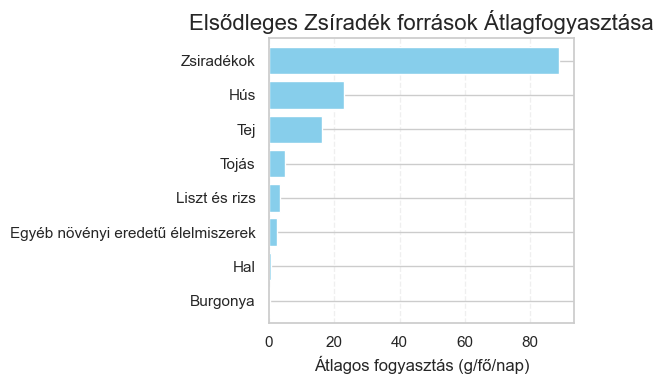

In [66]:

zsir_kategoriak = ['Hús','Hal','Tej','Tojás','Zsiradékok','Liszt és rizs', 'Burgonya','Egyéb növényi eredetű élelmiszerek']
df_csak_zsir = df_zsir[zsir_kategoriak]

plt.figure(figsize=(6,4)) 

df_csak_zsir.mean().sort_values(ascending=True).plot(kind='barh', color='skyblue', width=0.8)

plt.title('Elsődleges Zsíradék források Átlagfogyasztása', fontsize=16)
plt.xlabel('Átlagos fogyasztás (g/fő/nap)') 
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.3) 
plt.tight_layout() 
plt.show()

##### Elsődleges tápanyagforrások-fehérje

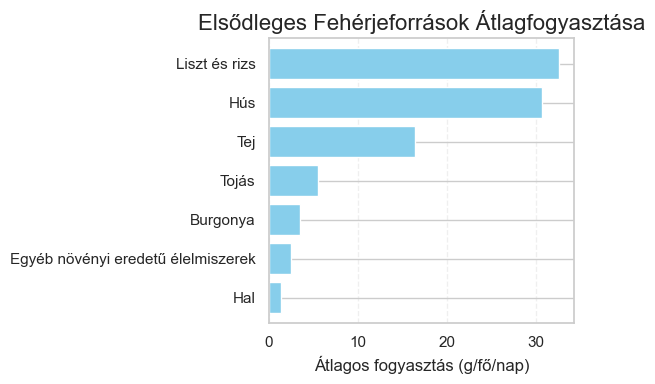

In [67]:
feherje_kategoriak = ['Hús', 'Hal', 'Tej', 'Tojás','Liszt és rizs', 'Burgonya', 'Egyéb növényi eredetű élelmiszerek']
df_csak_feherjek = df_feherje[feherje_kategoriak]

plt.figure(figsize=(6,4))

df_csak_feherjek.mean().sort_values(ascending=True).plot(kind='barh', color='skyblue', width=0.8)

plt.title('Elsődleges Fehérjeforrások Átlagfogyasztása', fontsize=16)
plt.xlabel('Átlagos fogyasztás (g/fő/nap)')
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.3) 
plt.tight_layout() 
plt.show()

### Kétváltozós Elemzés (Bivariate Analysis)

Szórásdiagramok (Scatter Plot): sns.scatterplot() (két változó közötti kapcsolat, korreláció vizualizálása).

#### Van-e kapcsolat a hús- és a halfogyasztás között az évek során? Amikor az egyik nő, a másik is nő, vagy épp csökken?

Arra keressük a választ, hogy a két termék helyettesíti-e egymást a fogyasztói szokásokban. 
- Ha az emberek kevesebb húst esznek, vajon több halat fogyasztanak-e helyette (ez negatív korrelációt jelentene)?
- Vajon a két termék fogyasztása teljesen független egymástól (nincs korreláció)?

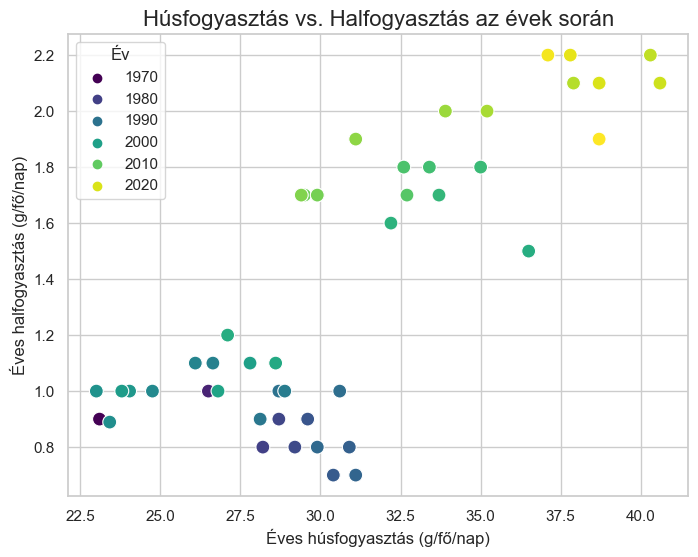

In [80]:

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_feherje, x='Hús', y='Hal', hue='Év', palette='viridis', s=100)
plt.title('Húsfogyasztás vs. Halfogyasztás az évek során', fontsize=16)
plt.xlabel('Éves húsfogyasztás (g/fő/nap)')
plt.ylabel('Éves halfogyasztás (g/fő/nap)')
plt.legend(title='Év')
plt.show()

In [81]:
# Csak a két releváns oszlopot választjuk ki
correlation = df_feherje[['Hús', 'Hal']].corr()

print("A hús- és halfogyasztás korrelációs mátrixa:")
print(correlation)

A hús- és halfogyasztás korrelációs mátrixa:
          Hús       Hal
Hús  1.000000  0.784699
Hal  0.784699  1.000000


- A pontdiagram egy pozitív korrelációt mutat. Ahogy az x-tengelyen (éves húsfogyasztás) jobbra haladunk, az y-tengelyen (éves halfogyasztás) is jellemzően felfelé mozdulnak a pontok. Ez azt jelenti, hogy a magasabb húsfogyasztású években általában a halfogyasztás is magasabb volt.
- A sötétlila pontok (1970-es évek) a grafikon bal alsó részén helyezkednek el, ami alacsony hús- és halfogyasztást jelez. Ezzel szemben a sárga pontok (2020-as évek) a jobb felső sarokban tömörülnek, ami magas hús- és halfogyasztásra utal.
- A korrelációs mátrix egy 0.78-as értéket mutat a hús és a hal között, a két változó mozgása szorosan összefügg. 

#### Tej és Tojás: Klasszikus reggeli alapanyagok. Vajon aki több tejet iszik, több tojást is eszik?

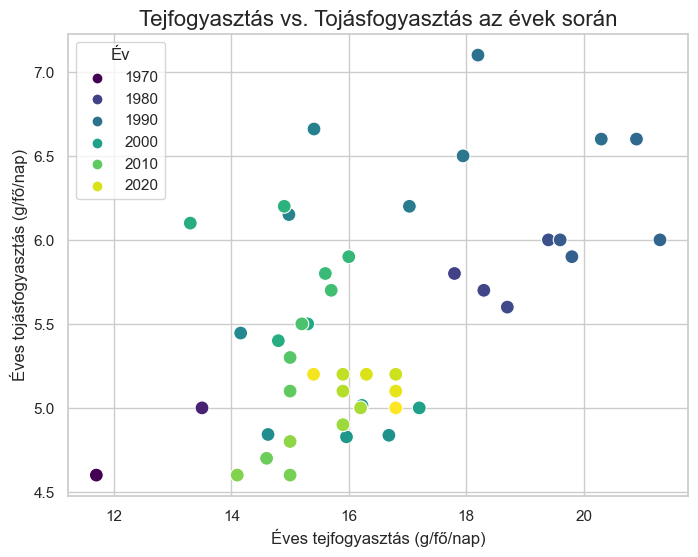

In [82]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_feherje, x='Tej', y='Tojás', hue='Év', palette='viridis', s=100)
plt.title('Tejfogyasztás vs. Tojásfogyasztás az évek során', fontsize=16)
plt.xlabel('Éves tejfogyasztás (g/fő/nap)')
plt.ylabel('Éves tojásfogyasztás (g/fő/nap)')
plt.legend(title='Év')
plt.show()

In [83]:
# Csak a két releváns oszlopot választjuk ki
correlation = df_feherje[['Tej', 'Tojás']].corr()

print("A tej- és tojásfogyasztás korrelációs mátrixa:")
print(correlation)

A tej- és tojásfogyasztás korrelációs mátrixa:
            Tej     Tojás
Tej    1.000000  0.538389
Tojás  0.538389  1.000000


Összességében a tej- és tojásfogyasztás között nincs egyértelmű, erős korreláció. A pontok egy viszonylag szétterülő felhőt alkotnak, nem pedig egy szoros, lineáris mintázatot. Ez azt jelenti, hogy a két élelmiszer fogyasztása nem feltétlenül mozog együtt szorosan az egész vizsgált időszakot tekintve.

#### Liszt és Burgonya: Két alapvető szénhidrátforrás. Lehetséges, hogy amikor az egyik fogyasztása nő, a másiké csökken? (Negatív korreláció).

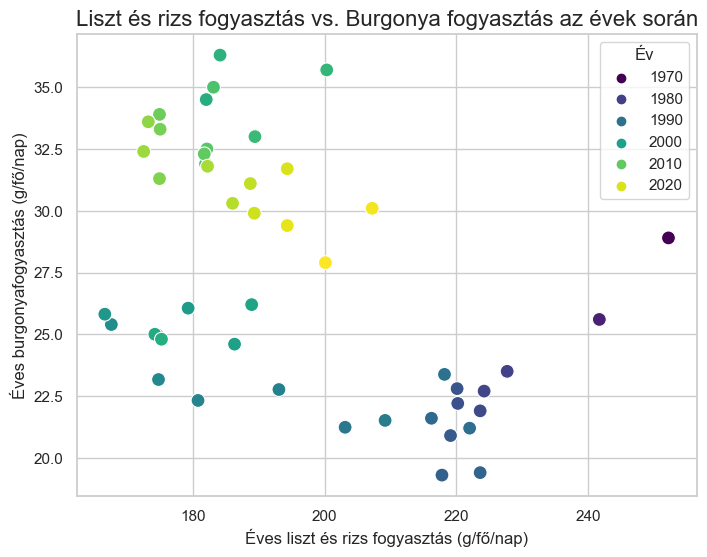

In [35]:
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df_szh, x='Liszt és rizs', y='Burgonya', hue='Év', palette='viridis', s=100)
plt.title('Liszt és rizs fogyasztás vs. Burgonya fogyasztás az évek során', fontsize=16)
plt.xlabel('Éves liszt és rizs fogyasztás (g/fő/nap)')
plt.ylabel('Éves burgonyafogyasztás (g/fő/nap)')
plt.legend(title='Év')
plt.show()

In [84]:
# Csak a két releváns oszlopot választjuk ki
correlation = df_szh[['Liszt és rizs', 'Burgonya']].corr()

print("A liszt/rizs- és burgonyafogyasztás korrelációs mátrixa:")
print(correlation)

A liszt/rizs- és burgonyafogyasztás korrelációs mátrixa:
               Liszt és rizs  Burgonya
Liszt és rizs       1.000000 -0.491798
Burgonya           -0.491798  1.000000


A két élelmiszercsoport egymás helyettesítőjeként működik a fogyasztásban: amikor az egyikből többet eszünk, a másikból jellemzően kevesebbet. Amikor a liszt- és rizsfogyasztás (vízszintes tengely) csökken, a burgonyafogyasztás (függőleges tengely) nő.

1. A "Liszt-korszak" (1970-es, 80-as évek):
A sötétlila és kék pontok a grafikon jobb alsó részén helyezkednek el, ebben az időszakban nagyon magas volt a liszt- és rizsfogyasztás, míg a burgonyafogyasztás ehhez képest alacsonyabb volt.

2. Az Átmenet (1990-es évek):
A türkiz pontok már elindultak balra és felfelé, jelezve a változás kezdetét: a lisztfogyasztás csökkenni, a burgonyafogyasztás pedig nőni kezdett.

3. A "Burgonya-korszak" (2000-től napjainkig):
A zöld és sárga pontok már egyértelműen a bal felső sarokban tömörülnek. Ez azt mutatja, hogy az elmúlt 20-25 évben a liszt- és rizsfogyasztás jelentősen lecsökkent, miközben a burgonyafogyasztás magasabb szintre emelkedett.
 
A magyar fogyasztók az évtizedek során egyértelműen elmozdultak a liszt- és rizsalapú szénhidrátoktól a burgonya felé. 

#### Cukor és Zsiradékok: Hogyan változik a "bűnözősebbnek" tartott élelmiszerek fogyasztása egymáshoz képest?¶


- Ehhez már két külön fájlt kell beolvasni (egy_fore_zsir.xlsx és egy_fore_feherje.xlsx), és a két táblázat Összesen oszlopait hasonlítjuk össze.

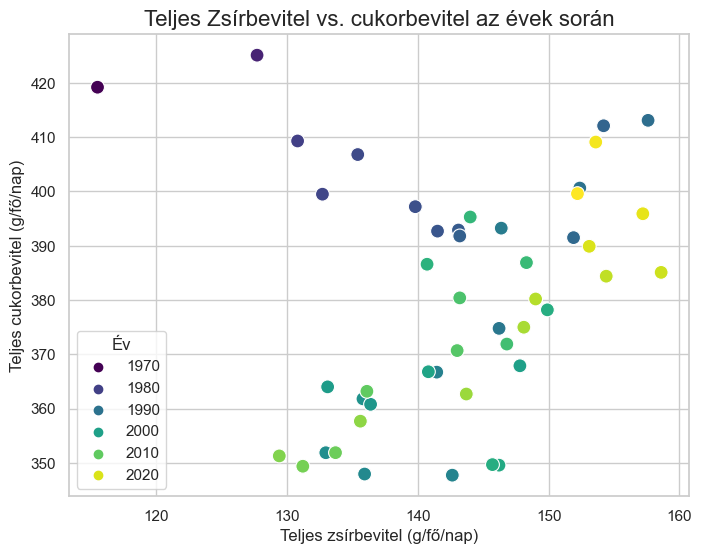

In [89]:

# 2. Adatok kombinálása egy új DataFrame-be
comparison_df = pd.DataFrame({
    'Ev': df_zsir['Év'],
    'Zsiradékok': df_zsir['Összesen'],
    'Cukor és méz': df_szh['Összesen']
})

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=comparison_df, x='Zsiradékok', y='Cukor és méz', hue='Ev', palette='viridis', s=100)

plt.title('Teljes Zsírbevitel vs. cukorbevitel az évek során', fontsize=16)
plt.xlabel('Teljes zsírbevitel (g/fő/nap)')
plt.ylabel('Teljes cukorbevitel (g/fő/nap)')
plt.legend(title='Év')
plt.show()

In [86]:
# Állítsuk be az 'Év' oszlopot indexként mindkét helyen (melyik évet melyikkel kell párosítani)
df_szh_indexed = df_szh.set_index('Év')
df_zsir_indexed = df_zsir.set_index('Év')

In [87]:
# Válasszuk ki a két oszlopot a már indexelt táblákból
cukor_series = df_szh_indexed['Cukor és méz']
zsir_series = df_zsir_indexed['Zsiradékok']

# Számoljuk ki a korrelációt a két Series között
# Ez egyetlen számot ad vissza, nem egy mátrixot
correlation = cukor_series.corr(zsir_series)

print("A cukor- és zsiradékfogyasztás korrelációja:")
print(correlation)

A cukor- és zsiradékfogyasztás korrelációja:
0.03619721948548802


Miért nulla, ha láttunk trendeket?
Felmerülhet a kérdés, hogy ha a grafikonon láttunk egyértelmű időbeli trendeket (pl. a 2000-es évektől a cukor csökken, a zsír nő), akkor a korreláció miért nulla.
- a korrelációs együttható a teljes 50 év átlagos lineáris kapcsolatát méri. Mivel az időszak különböző szakaszaiban ellentétes irányú trendek voltak (volt, amikor együtt nőttek, később az egyik csökkent, míg a másik nőtt), ezek a hatások matematikailag kioltották egymást.
- egyetlen korrelációs szám önmagában félrevezető lehet, és miért elengedhetetlen az adatok vizuális ábrázolása a mögöttes történet megértéséhez.

A Nagy Étrendi Fordulat (Időbeli Elemzés)
A grafikon igazi tanulsága az évtizedek közötti elmozdulásban rejlik, ami egy jelentős étrendi váltást dokumentál:

1. A "sok cukor, növekvő zsír" korszaka (1970-1990-es évek):
A lila és türkiz pontok (70-es, 80-as, 90-es évek) többnyire a grafikon felső részén helyezkednek el, ami magas cukorbevitelt jelez. Eközben a pontok lassan balról jobbra vándorolnak, ami a zsírbevitel fokozatos növekedését mutatja.

2. A Fordulópont (kb. 2000-től):
A 2000-es évektől (zöld pontok) egy drámai változás figyelhető meg. 
- A cukorbevitel csökkenni kezdett (a pontok lefelé mozdulnak).
- A zsírbevitel tovább nőtt (a pontok jobbra mozdulnak).

3. A Modern Korszak (2010-es évektől napjainkig):
A zöld és sárga pontok (2010-es és 2020-as évek) már egyértelműen a grafikon jobb oldalán helyezkednek el, ami egy tartósan magas zsírbevitelű időszakot mutat. Eközben a cukorbevitel a korábbi csúcsok alatt stabilizálódott, vagy enyhén újra emelkedni kezdett.

Összegzés

Egy étrendi paradigma-váltást látunk:

Az ezredforduló környékén a fogyasztók (vagy az élelmiszeripar) a cukorbevitel csökkentése felé mozdultak el, miközben a zsírbevitelüket tovább növelték. Ez a trend tökéletesen egybevág a korabeli közegészségügyi üzenetekkel és a "low-carb" / cukor-ellenes diétás irányzatok népszerűsödésével. Ahelyett, hogy egyszerre csökkent volna mindkettő, úgy tűnik, az egyiket "lecseréltük" a másikra.

#### Hús és Burgonya: A hagyományos "hús-krumpli" ebéd vajon megjelenik-e a statisztikában?

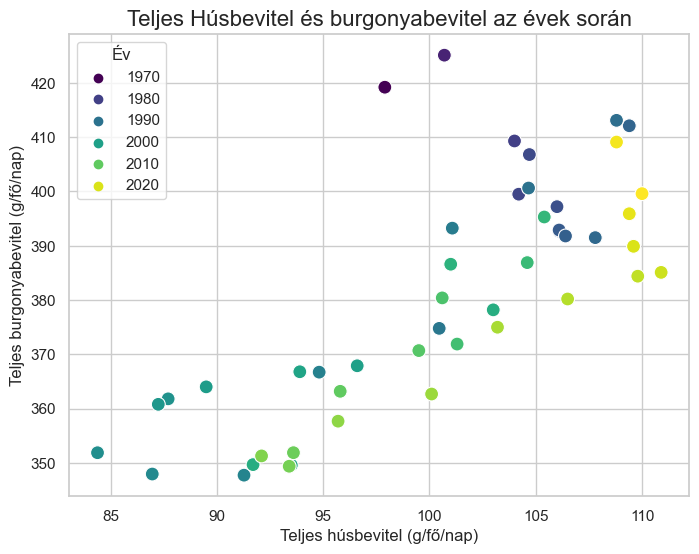

In [91]:

comparison_df_feh = pd.DataFrame({
    'Ev': df_feherje['Év'],
    'Hús': df_feherje['Összesen'],
    'Burgonya': df_szh['Összesen']
})

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=comparison_df_feh, x='Hús', y='Burgonya', hue='Ev', palette='viridis', s=100)

plt.title('Teljes Húsbevitel és burgonyabevitel az évek során', fontsize=16)
plt.xlabel('Teljes húsbevitel (g/fő/nap)')
plt.ylabel('Teljes burgonyabevitel (g/fő/nap)')
plt.legend(title='Év')
plt.show()

In [92]:
df_szh_indexed = df_szh.set_index('Év')
df_feherje_indexed = df_feherje.set_index('Év')

In [158]:

burgonya_series = df_szh_indexed['Burgonya']
hus_series = df_feherje_indexed['Hús']

correlation = burgonya_series.corr(hus_series)

print("A hús- és burgonyafogyasztás korrelációja:")
print(correlation)

A hús- és burgonyafogyasztás korrelációja:
0.49272624649370295


A grafikon egy erős pozitív korrelációt mutat a hús- és a burgonyafogyasztás között. A pontok egyértelműen a bal alsó sarokból a jobb felső felé haladnak.
vagyis azokban az években, amikor nőtt a húsfogyasztás (jobbra mozgás a grafikonon), jellemzően a burgonyafogyasztás is emelkedett (felfelé mozgás). A két élelmiszer tehát nem helyettesíti, hanem kiegészíti egymást. Ez a mintázat a komplementer termékek tipikus statisztikai lábnyoma.

Fogyasztási Trendek

- A korábbi évtizedekben (lila és kék pontok) mindkét termékből alacsonyabb volt a fogyasztás.
- Az ezredforduló után (zöld és sárga pontok) mind a hús-, mind a burgonyafogyasztás magasabb szintre emelkedett, és a fogyásuk továbbra is együtt mozgott.

Összefoglalva: a "hús-krumpli" páros nemcsak egy kulturális közhely, hanem egy statisztikailag is világosan kimutatható, szoros fogyasztói kapcsolat.

### Korrelációs mátrix 

A korrelációs mátrix egy táblázat, amely azt mutatja meg, hogy több változó hogyan mozog együtt, vagy milyen mértékben függ össze egymással.
Minden cella egy korrelációs együtthatót tartalmaz, amely a két adott változó közötti lineáris kapcsolat erősségét és irányát mutatja.

Elemezés az Egy főre jutó tápanyag napi mennyisége kilokalóriában adathalmazból

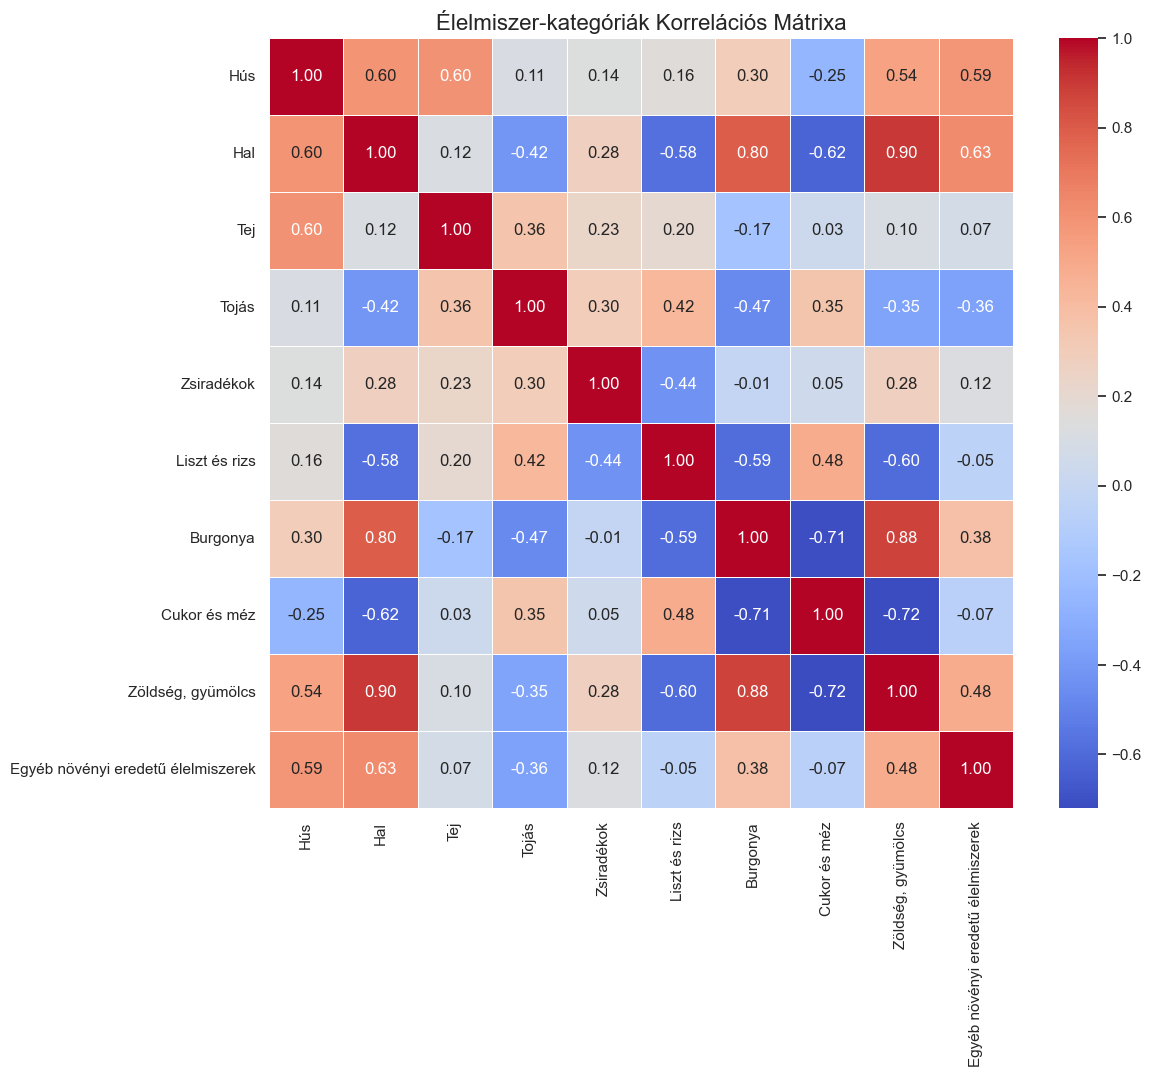

In [97]:

# --- 2. Adatok előkészítése a korrelációhoz ---
# Kiválasztjuk csak azokat az oszlopokat, amiket össze akarunk hasonlítani.

columns_to_correlate = [
    'Hús', 'Hal', 'Tej', 'Tojás', 'Zsiradékok', 'Liszt és rizs', 'Burgonya',
    'Cukor és méz', 'Zöldség, gyümölcs', 'Egyéb növényi eredetű élelmiszerek'
]
# Létrehozunk egy új DataFrame-et, ami csak ezeket az oszlopokat tartalmazza
df_for_corr = df_tapany[columns_to_correlate]

corr_matrix = df_for_corr.corr()

# --- 4. Hőtérkép (Heatmap) létrehozása ---
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix, 
    annot=True,      # értékek a cellákra
    cmap='coolwarm', # Színskála: piros=pozitív, kék=negatív korreláció
    fmt='.2f',       # Két tizedesjegyre formázza a számokat
    linewidths=.5     # Vékony vonalak a cellák között
)

# Cím hozzáadása
plt.title('Élelmiszer-kategóriák Korrelációs Mátrixa', fontsize=16)
plt.show()

A legerősebb pozitív kapcsolatok- együttmozgó élelmiszercsoportok 

- Hal, a Burgonya és a Zöldség-gyümölcs.
- Hal, Zöldség, gyümölcs (+0.90): Ez egy rendkívül erős kapcsolat. Aki több kalóriát visz be halból, az szinte biztosan többet visz be zöldségből és gyümölcsből is.
- Burgonya, Zöldség, gyümölcs (+0.88): Szintén egy nagyon szoros, pozitív kapcsolat.
- Hal, Burgonya (+0.80): Ez a hármas szorosan összekapcsolódik, egy modern, egészségtudatosabbnak tartott étrend képét rajzolva ki.
- A Hús és a Hal kapcsolata (+0.60) is megerősíti, hogy az állati fehérjék fogyasztása jellemzően együtt mozog.

A legerősebb negatív kapcsolatok- Helyettesítő termékek
- A Liszt és rizs, valamint a Cukor és méz állnak a középpontban.
- Cukor vs. Zöldség/gyümölcs (-0.72) és Burgonya (-0.71): Erős negatív kapcsolat. Ahol sok cukor fogy, ott kevés zöldség, gyümölcs és burgonya, és fordítva.
- Liszt/rizs vs. Burgonya (-0.59): igazolja a korábban látott "kétféle szénhidrát" helyettesítő viszonyát.
- Liszt/rizs vs. Zöldség/gyümölcs (-0.60) és Hal (-0.58): A lisztes-rizses étrend ellentétben áll a halas-zöldséges étrenddel.

Gyenge és összetett kapcsolatok:
- Ahogy a korábbi ábrákon is sejthető volt, a Tej, Tojás és a Zsiradékok nem mutatnak erős, egyértelmű kapcsolatot a többi kategóriával. A nekik megfelelő sorok és oszlopok a hőtérképen többnyire halvány színűek, ami gyenge korrelációt jelez. Ez megerősíti, hogy ezek fogyasztását összetettebb, nem lineáris tényezők befolyásolják.

Összegzés

A hőtérkép egy nagy étrendi "szakadást" tár fel két fő fogyasztási minta között:
- Egy "hagyományosabb" étrend, ami a Liszt/rizs és Cukor kalóriáira épül.
- Egy "modernebb" étrend, ami a Hal, Burgonya és Zöldség/gyümölcs kalóriáit helyezi előtérbe.


### Crosstab elemzések

TRENDELEMZÉSEK

##### Húsfogyasztás

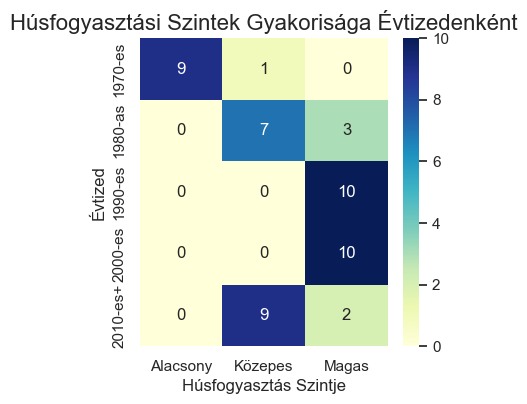

In [98]:

s1 = pd.Series(np.linspace(60, 90, 26))
s2 = pd.Series(np.linspace(90, 75, 25))
meat_consumption = pd.concat([s1, s2], ignore_index=True) # ignore_index=True biztosítja a helyes sorszámozást

# Évek létrehozása a megfelelő hosszal
years = pd.Series(range(1970, 1970 + len(meat_consumption)))
df_for_plotting_feherje = pd.DataFrame({'Év': years, 'Hús': meat_consumption})


# 'Évtized' kategória létrehozása
df_for_plotting_feherje['Évtized'] = pd.cut(
    x=df_for_plotting_feherje['Év'], 
    bins=[1969, 1979, 1989, 1999, 2009, 2029], # A felső határt megemeltük, hogy minden év beleférjen
    #bins=[1970, 1980, 1990, 2000, 2010, 2020],
    labels=['1970-es', '1980-as', '1990-es', '2000-es', '2010-es+']
)

# 'Húsfogyasztás_szintje' kategória létrehozása
df_for_plotting_feherje['Húsfogyasztás_szintje'] = pd.cut(
    x=df_for_plotting_feherje['Hús'],
    bins=3,
    labels=['Alacsony', 'Közepes', 'Magas']
)

# Kereszttábla létrehozása
kereszttabla = pd.crosstab(df_for_plotting_feherje['Évtized'], df_for_plotting_feherje['Húsfogyasztás_szintje'])

# Hőtérkép ábrázolása
plt.figure(figsize=(4,4))
sns.heatmap(
    kereszttabla,
    annot=True,
    cmap="YlGnBu",
    fmt='d'
)

plt.title('Húsfogyasztási Szintek Gyakorisága Évtizedenként', fontsize=16)
plt.ylabel('Évtized')
plt.xlabel('Húsfogyasztás Szintje')
plt.show()

In [99]:
kereszttabla

Húsfogyasztás_szintje,Alacsony,Közepes,Magas
Évtized,,,
1970-es,9,1,0
1980-as,0,7,3
1990-es,0,0,10
2000-es,0,0,10
2010-es+,0,9,2


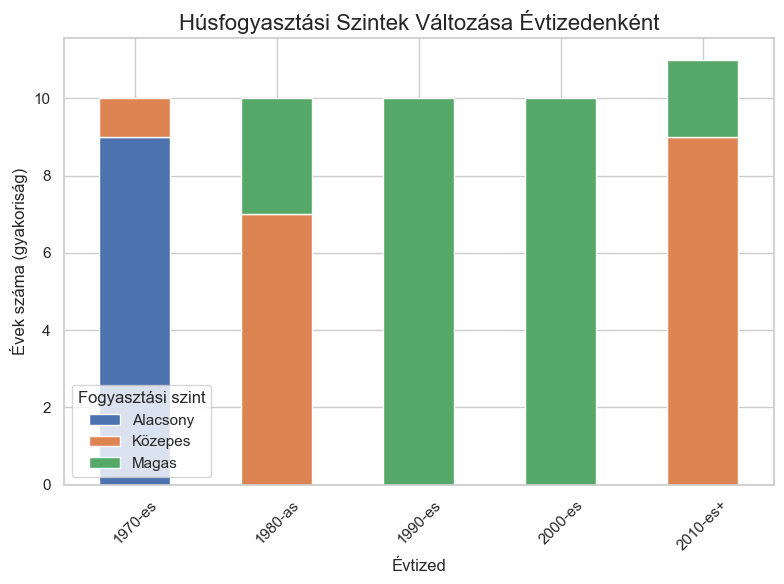

In [100]:

# 2. Halmozott oszlopdiagram kirajzolása
kereszttabla.plot(kind='bar', stacked=True, figsize=(8,6))

# 3. Címek és feliratok
plt.title('Húsfogyasztási Szintek Változása Évtizedenként', fontsize=16)
plt.ylabel('Évek száma (gyakoriság)')
plt.xlabel('Évtized')
plt.xticks(rotation=45)
plt.legend(title='Fogyasztási szint')
plt.tight_layout()
plt.show()

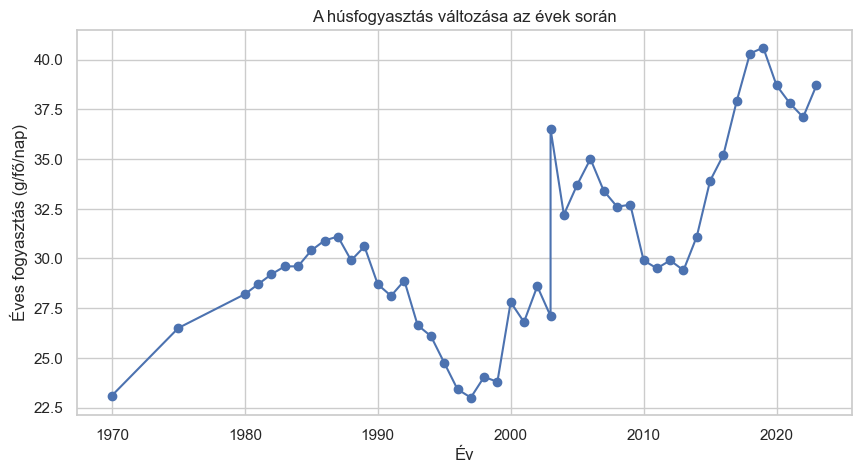

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(df_feherje['Év'], df_feherje['Hús'], marker='o') # 'Év' oszlopot használva
plt.title('A húsfogyasztás változása az évek során')
plt.xlabel('Év')
plt.ylabel('Éves fogyasztás (g/fő/nap)')
plt.grid(True)
plt.show()

Az állandó növekedés korszaka (1970-1988)
- A hetvenes és nyolcvanas években a húsfogyasztás egyenletesen és dinamikusan emelkedett. A Kádár-korszak utolsó évtizedeiben feltehetően a növekvő életszínvonal és az agrártámogatások hatására a fogyasztás a kezdeti ~23 g/fő/napról egészen ~31 g/fő/nap fölé nőtt.

A rendszerváltás utáni visszaesés (1989-1999)
- A rendszerváltást követően a trend hirtelen megfordult. Az évtizedes csökkenés hátterében a gazdasági nehézségek, az infláció és a piacgazdaságra való átállás állhatott, ami a hús árának emelkedéséhez és a vásárlóerő csökkenéséhez vezetett. A fogyasztás az évtized végére a 70-es évek közepének szintjére esett vissza.

Stagnálás (2000-2012)
- Az ezredforduló után egy ingadozó időszak következett: hirtelen kiugrással 2002-2003 körül, majd egy gyors visszaeséssel. A 2008-as gazdasági válság utáni években a fogyasztás stagnált, enyhén csökkent.

Újabb fellendülés (2013-2020)
- 2012-2013 körül egy új, tartós növekedési pálya indult. Vélhetően a gazdasági fellendülésnek köszönhetően a húsfogyasztás nemcsak a korábbi szinteket érte el, hanem meg is haladta azokat, 2020 körül pedig a teljes vizsgált időszak legmagasabb pontjára, 40 g/fő/nap fölé emelkedett.

Összegzés
- A magyar húsfogyasztás útja nem volt egyenes vonalú. Egy hosszú növekedési periódust egy mély visszaesés követett a rendszerváltáskor, majd egy ingadozásokkal teli időszak után az elmúlt évtizedben a fogyasztás történelmi csúcsra ért.

##### Zöldség és gyümölcs fogyasztás

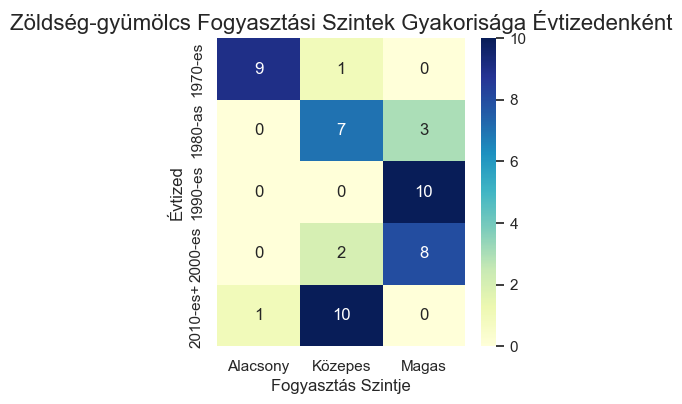

In [102]:

s1_f = pd.Series(np.linspace(130, 160, 26))
s2_f = pd.Series(np.linspace(160, 140, 25))
fruit_consumption = pd.concat([s1_f, s2_f], ignore_index=True)
years_f = pd.Series(range(1970, 1970 + len(fruit_consumption)))
df_for_plotting_szh = pd.DataFrame({'Év': years_f, 'Zöldség, gyümölcs': fruit_consumption})

df_for_plotting_szh['Evtized'] = pd.cut(
    x=df_for_plotting_szh['Év'], 
    bins=[1969, 1979, 1989, 1999, 2009, 2029],
    labels=['1970-es', '1980-as', '1990-es', '2000-es', '2010-es+']
)

df_for_plotting_szh['zoldseg_szint'] = pd.cut(
    x=df_for_plotting_szh['Zöldség, gyümölcs'],
    bins=3,
    labels=['Alacsony', 'Közepes', 'Magas']
)

kereszttabla_f = pd.crosstab(df_for_plotting_szh['Evtized'], df_for_plotting_szh['zoldseg_szint'])

plt.figure(figsize=(4,4))
sns.heatmap(
    kereszttabla_f,
    annot=True,
    cmap="YlGnBu",
    fmt='d'
)

plt.title('Zöldség-gyümölcs Fogyasztási Szintek Gyakorisága Évtizedenként', fontsize=16)
plt.ylabel('Évtized')
plt.xlabel('Fogyasztás Szintje') 
plt.show()

In [103]:
kereszttabla_f

zoldseg_szint,Alacsony,Közepes,Magas
Evtized,,,
1970-es,9,1,0
1980-as,0,7,3
1990-es,0,0,10
2000-es,0,2,8
2010-es+,1,10,0


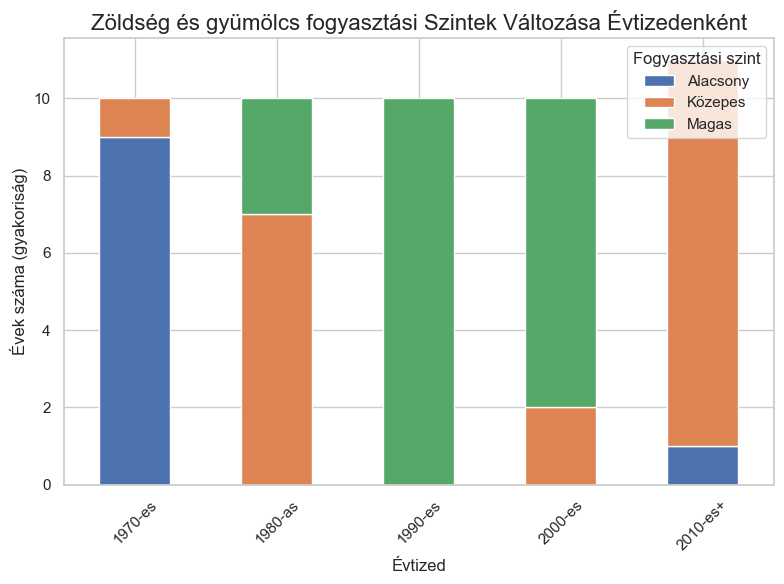

In [104]:
# 2. Halmozott oszlopdiagram kirajzolása
kereszttabla_f.plot(kind='bar', stacked=True, figsize=(8,6))

# 3. Címek és feliratok
plt.title('Zöldség és gyümölcs fogyasztási Szintek Változása Évtizedenként', fontsize=16)
plt.ylabel('Évek száma (gyakoriság)')
plt.xlabel('Évtized')
plt.xticks(rotation=45)
plt.legend(title='Fogyasztási szint')
plt.tight_layout()
plt.show()

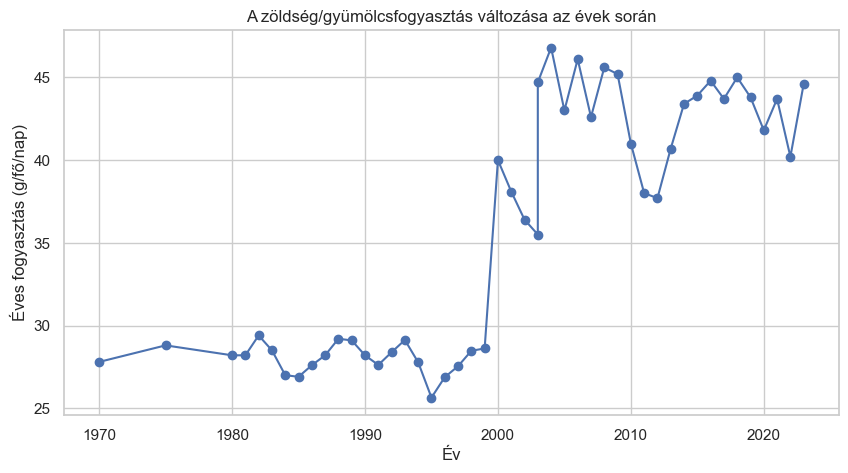

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(df_szh['Év'], df_szh['Zöldség, gyümölcs'], marker='o') # 'Év' oszlopot használva
plt.title('A zöldség/gyümölcsfogyasztás változása az évek során')
plt.xlabel('Év')
plt.ylabel('Éves fogyasztás (g/fő/nap)')
plt.grid(True)
plt.show()

A zöldség- és gyümölcsfogyasztás trendje Magyarországon jelentős átalakulást mutat, amelynek kulcsmomentuma az ezredforduló környékén volt. A grafikont három fő szakaszra bonthatjuk.

A Hosszú Stagnálás Korszaka (1970-1999)
- A hetvenes évektől egészen az ezredfordulóig a zöldség- és gyümölcsfogyasztás egy viszonylag alacsony sávban, 25 és 30 g/fő/nap között mozgott. Ebben a harminc évben, ellentétben például a húsfogyasztás növekedésével, nem volt megfigyelhető érdemi, tartós emelkedés.

A "Nagy Ugrás" az Ezredfordulón (kb. 2000-2002)
- A legmeghatározóbb elem a 2000 körüli években látható, rendkívül meredek és hirtelen ugrás. A fogyasztás mindössze néhány év leforgása alatt a korábbi 30 g/fő/nap alatti szintről egészen 45 g/fő/nap fölé emelkedett. Ez a drasztikus változás egy alapvető étrendi és piaci váltásra utal, melynek hátterében a feltehetően a szupermarketek elterjedése, az import áruk szélesebb körű elérhetősége és a növekvő egészségtudatosság állhat.

A Magas Szintű Ingadozás Időszaka (2003-tól napjainkig)
- A "Nagy Ugrás" után a fogyasztás egy új, jóval magasabb szinten maradt, de rendkívül ingadozóvá vált: nagy kilengések, éles csúcsok és mélypontok váltogatják egymást, de a fogyasztás tartósan a 40 g/fő/nap feletti sávban maradt. Ebben a modern korszakban már nincs egyértelmű növekvő trend, inkább egy magas szintű, de változékony fogyasztás a jellemző.

Összegzés 
- A zöldség- és gyümölcsfogyasztás története nem egy lassú evolúció, hanem egy hirtelen változás. Egy évtizedeken át tartó alacsony szintű stagnálást egy drámai ugrás követett az ezredfordulón, ami tartósan egy magasabb szintre emelte a fogyasztást.

##### Cukor és mézfogysztás

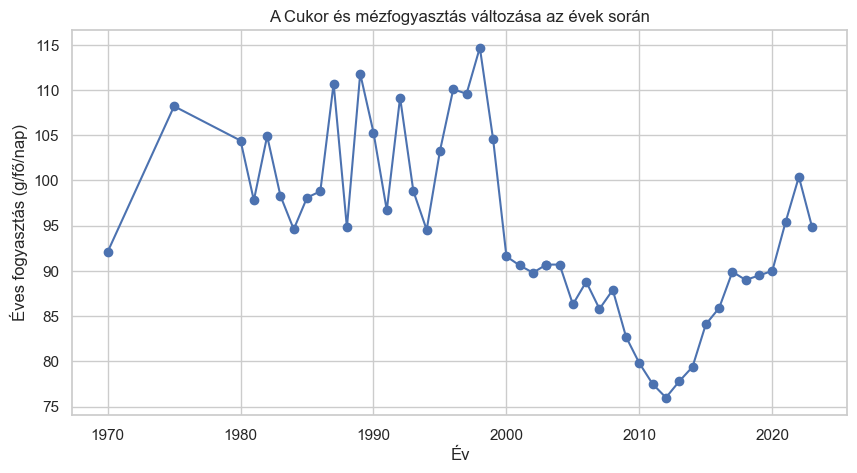

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(df_szh['Év'], df_szh['Cukor és méz'], marker='o') # 'Év' oszlopot használva
plt.title('A Cukor és mézfogyasztás változása az évek során')
plt.xlabel('Év')
plt.ylabel('Éves fogyasztás (g/fő/nap)')
plt.grid(True)
plt.show()


A magas szintű ingadozás korszaka (1970-1998)
- A hetvenes évektől egészen az ezredfordulóig a cukorfogyasztás egy extrém magas és rendkívül ingadozó szinten mozgott, többnyire 95 és 115 g/fő/nap között. Ez az időszak éles, évről évre bekövetkező csúcsokkal és mélypontokkal jellemezhető, ami bizonytalan piaci viszonyokra vagy akár felhalmozási szokásokra is utalhatott egy általánosan magas fogyasztású környezetben. A teljes vizsgált időszak csúcspontja is erre a periódusra, 1998 környékére esett.

A nagy visszaesés (1999-2012)
- Az 1998-as csúcs után egy drámai és tartós zuhanás vette kezdetét. A fogyasztás több mint egy évtizeden át csökkent, és 2012 körül érte el a teljes 50 éves periódus legalacsonyabb pontját, 75 g/fő/nap körül. Ez a trend egybeesik a globális egészségügyi szemléletváltással, a cukor negatív hatásainak szélesebb körű megismerésével és a 2008-as gazdasági válság hatásaival.

Az újbóli emelkedés (2013-tól napjainkig)
- A 2012-es mélypontot követően egyértelmű fordulat és újra növekvő tendencia látható. A fogyasztás ismét emelkedni kezdett, és az elmúlt évtizedben visszakapaszkodott a 100 g/fő/nap körüli szintre. Ez azt sugallja, hogy az egészségügyi figyelmeztetések ellenére a cukorfogyasztás jelentős mértékben tért vissza a magyar étrendbe.

Összegzés
- A cukorfogyasztás története nem egy egyszerű trendet követ, hanem egy háromfelvonásos drámát: egy hosszú, kaotikus, magas fogyasztású periódust egy mélyrepülés, majd egy meglepően erős visszatérés követett.

##### Zsíradékok

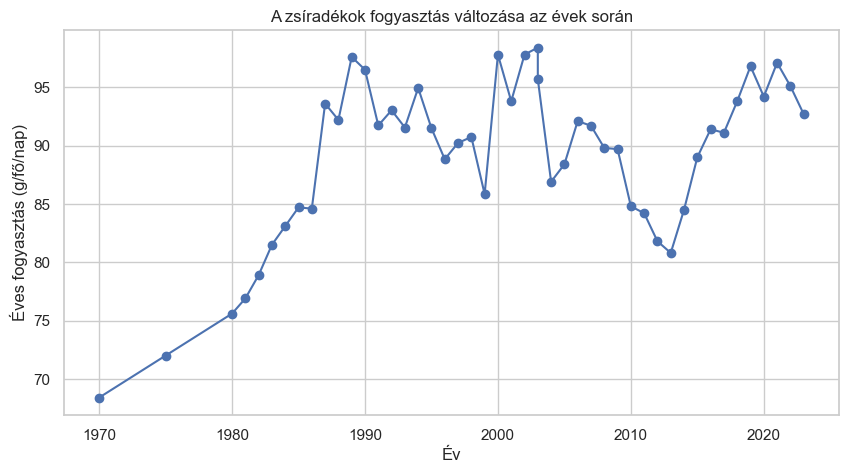

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(df_zsir['Év'], df_zsir['Zsiradékok'], marker='o') # 'Év' oszlopot használva
plt.title('A zsíradékok fogyasztás változása az évek során')
plt.xlabel('Év')
plt.ylabel('Éves fogyasztás (g/fő/nap)')
plt.grid(True)
plt.show()


Növekedés  (1970-1989)
- A hetvenes és nyolcvanas években a zsiradékfogyasztás egy meredek és szinte töretlen növekedési pályán volt. A korszak eleji 70 g/fő/nap alatti szintről egészen a 95 g/fő/nap feletti csúcsig emelkedett a rendszerváltás környékére, tükrözve a szocializmus utolsó évtizedeinek növekvő életszínvonalát.

Kaotikus időszak (1990-2008)
- A húsfogyasztással ellentétben a zsiradékoké nem zuhant be a rendszerváltás után. Ehelyett egy közel két évtizedes, magas szintű, változékony periódus következett. A fogyasztás folyamatosan 85 g/fő/nap felett maradt, de éles, kiszámíthatatlan csúcsok és völgyek váltogatták egymást. A teljes időszak abszolút csúcsa is erre az időszakra, 2002 környékére esett.

A válság utáni visszaesés (2008-2014)
- A 2008-as gazdasági világválság környékén egy jól kivehető, többéves csökkenés vette kezdetét. A fogyasztás ekkor évtizedes mélypontra, 80 g/fő/nap közelébe esett vissza, valószínűleg a csökkenő vásárlóerő és a változó táplálkozási szokások együttes hatására.

Újra emelkedés (2015-től napjainkig)
- A 2014-es mélypontot követően a zsiradékfogyasztás ismét határozott növekedésnek indult. Az elmúlt években a fogyasztás visszatért a korábbi csúcsidőszakok magas szintjére, és ismét 95 g/fő/nap feletti értékeket ért el.

Összegzés
- A zsiradékfogyasztás a magyar étrendben egy tartósan magas szintet képvisel. Bár voltak jelentős ingadozásai és egy átmeneti visszaesése, a trend mindig visszatért a korábbi csúcsok közelébe.

##### Halfogyasztás

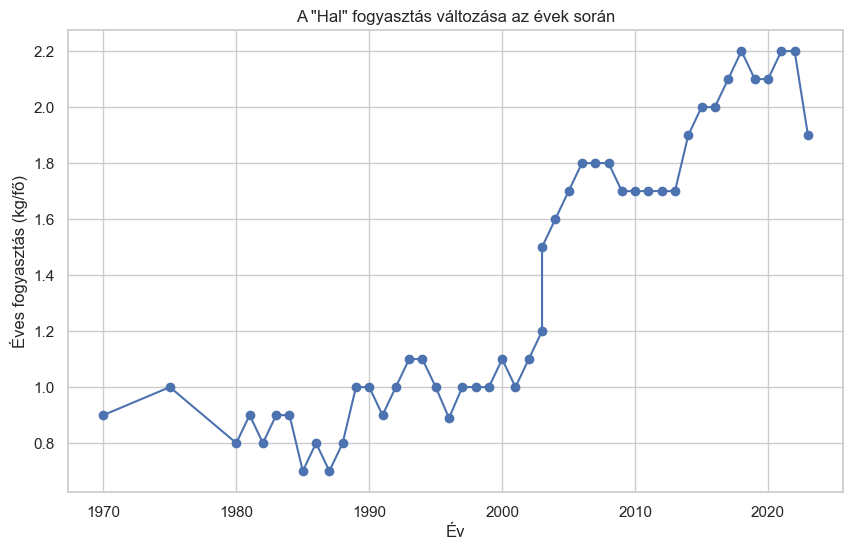

In [108]:
plt.figure(figsize=(10,6))
plt.plot(df_feherje['Év'], df_feherje['Hal'], marker='o') # 'Év' oszlopot használva
plt.title('A "Hal" fogyasztás változása az évek során')
plt.xlabel('Év')
plt.ylabel('Éves fogyasztás (kg/fő)')
plt.grid(True)
plt.show()

Az "A" Hal" fogyasztásának alakulása az elmúlt öt évtizedben jelentős változáson ment keresztül. Az 1970-es évektől a 2000-es évek elejéig jellemző alacsony és stagnáló fogyasztási szint után a 2000-es évek elején robbanásszerű növekedés indult, ami az egy főre jutó éves halfogyasztást több mint duplájára emelte. Ezt követően a fogyasztás tartósan magasabb szinten stabilizálódott, majd tovább nőtt, egészen 2020-2021-ig, amikor elérte a csúcsát. A legutolsó adatpont (2022) azonban egy viszonylag jelentős visszaesést jelez, ami törést mutat a korábbi növekvő tendenciában, és felveti a kérdést, hogy ez egy átmeneti csökkenés-e, vagy egy új trend kezdetét jelzi-e a halfogyasztásban.

### Többváltozós Elemzés (Multivariate Analysis - opcionális, haladóbb EDA):

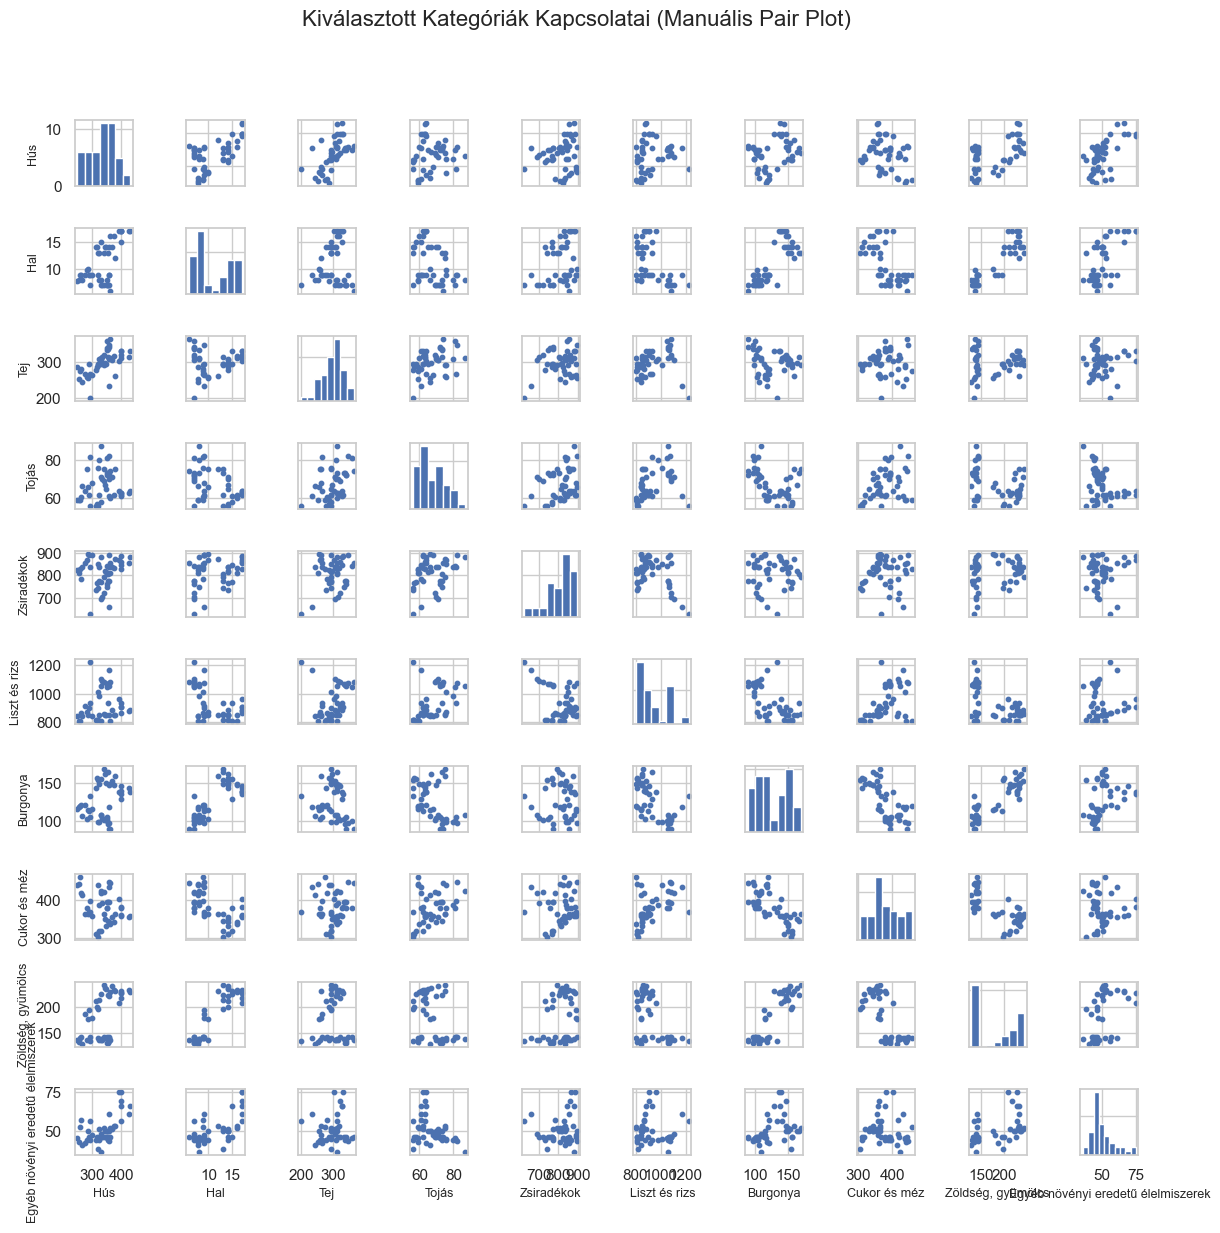

In [109]:

# 1. Kiválasztjuk az oszlopokat
columns_for_pairplot = ['Hús', 'Hal', 'Tej', 'Tojás', 'Zsiradékok', 'Liszt és rizs', 'Burgonya',
    'Cukor és méz', 'Zöldség, gyümölcs', 'Egyéb növényi eredetű élelmiszerek']


df_for_plot = df_for_plotting_tapany[columns_for_pairplot].dropna() # Biztonságból a hiányzó sorokat eldobjuk

# 2. Rács létrehozása
n_vars = len(columns_for_pairplot)
fig, axes = plt.subplots(nrows=n_vars, ncols=n_vars, figsize=(12, 12))
fig.suptitle('Kiválasztott Kategóriák Kapcsolatai (Manuális Pair Plot)', y=1.02, fontsize=16)

# 3. Ciklusok az ábrák kirajzolásához
for i, var1 in enumerate(columns_for_pairplot):
    for j, var2 in enumerate(columns_for_pairplot):
        ax = axes[i, j]

        # A főátlón hisztogramokat rajzolunk
        if i == j:
            ax.hist(df_for_plot[var1], bins='auto')
        # A többi helyre scatter plotokat rajzolunk
        else:
            ax.scatter(df_for_plot[var2], df_for_plot[var1], s=10)

        # Tengelyfeliratok beállítása a széleken
        if i == n_vars - 1:
            ax.set_xlabel(var2, fontsize=9)
        if j == 0:
            ax.set_ylabel(var1, fontsize=9)
        
        # Belső feliratok kikapcsolása a letisztultabb képért
        if i < n_vars - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

plt.tight_layout(pad=2.0)
plt.show()

### Tápanyagok közötti elemzések

A közel 50 év alatt hogyan változott az makrotápanyagok bevitele Magyarországon?

##### Tápanyagok bevitelének alakulása

Három fő makrotápanyag (fehérje, zsír, szénhidrát) bevitelének 50 éves történetét mutatja be, amely egyértelműen kirajzolja a magyar étrend szerkezeti átalakulását. 
- Alapélelmiszerekből nyert makrotápanyagok alakulása.

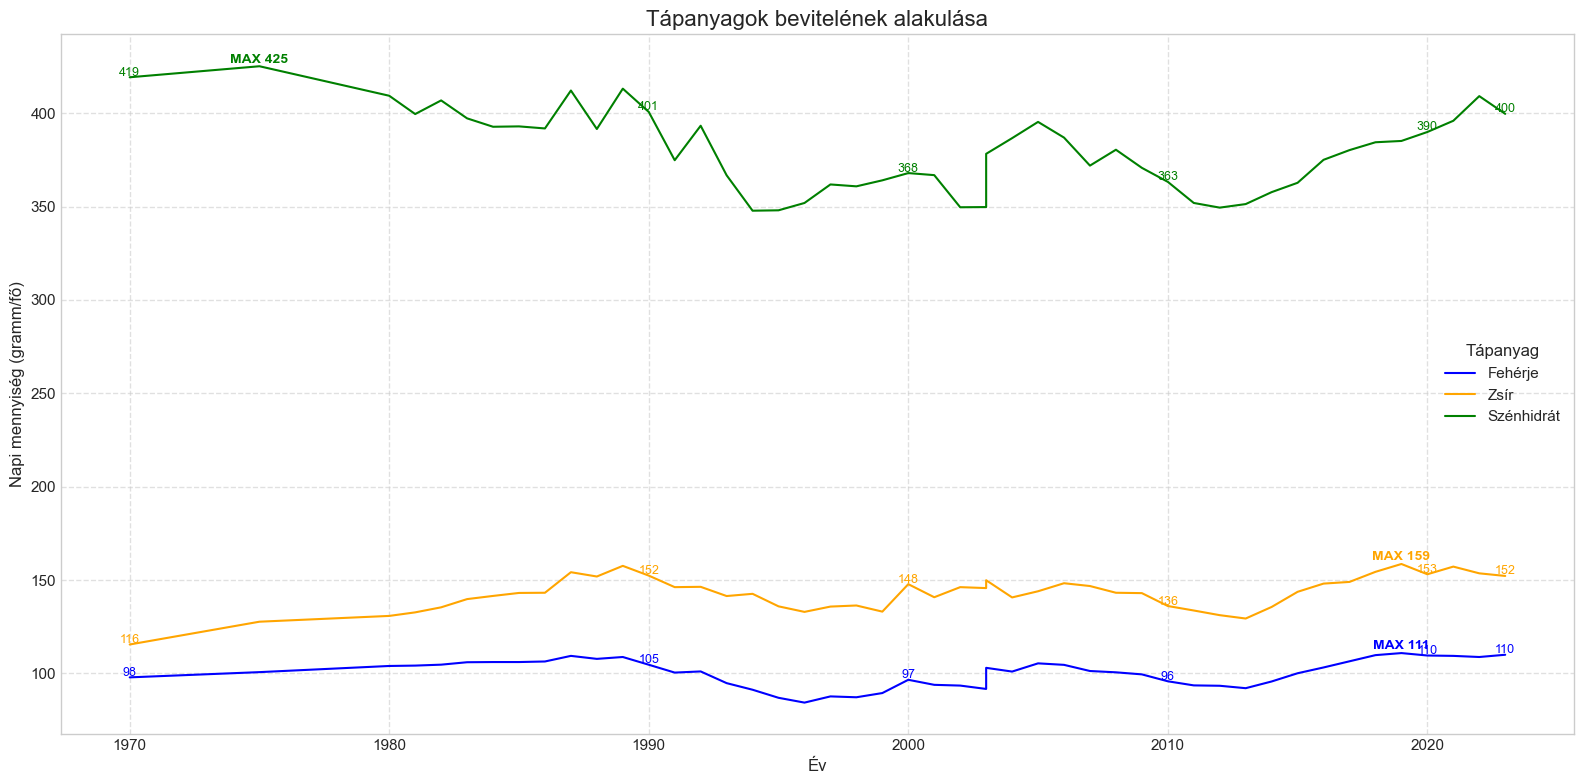

In [125]:

# Csak ezekhez az évekhez írunk ki értéket
kiemelt_evek = [1970, 1990, 2000, 2010, 2020, 2023]

plt.figure(figsize=(16, 8))

# ---------- Fehérje ----------
plt.plot(df_feherje['Év'], df_feherje['Összesen'], label='Fehérje', color='blue')

# Értékek kiírása megadott éveknél
for x, y in zip(df_feherje['Év'], df_feherje['Összesen']):
    if x in kiemelt_evek:
        plt.text(x, y + 0.8, f'{y:.0f}', fontsize=9, color='blue', ha='center')

# Max érték kiemelése
feh_idx = df_feherje['Összesen'].idxmax()
feh_ev = df_feherje.loc[feh_idx, 'Év']
feh_max = df_feherje.loc[feh_idx, 'Összesen']
plt.text(feh_ev, feh_max + 2, f'MAX {feh_max:.0f}', fontsize=10, fontweight='bold', color='blue', ha='center')

# ---------- Zsír ----------
plt.plot(df_zsir['Év'], df_zsir['Összesen'], label='Zsír', color='orange')

for x, y in zip(df_zsir['Év'], df_zsir['Összesen']):
    if x in kiemelt_evek:
        plt.text(x, y + 0.8, f'{y:.0f}', fontsize=9, color='orange', ha='center')

zsir_idx = df_zsir['Összesen'].idxmax()
zsir_ev = df_zsir.loc[zsir_idx, 'Év']
zsir_max = df_zsir.loc[zsir_idx, 'Összesen']
plt.text(zsir_ev, zsir_max + 2, f'MAX {zsir_max:.0f}', fontsize=10, fontweight='bold', color='orange', ha='center')

# ---------- Szénhidrát ----------
plt.plot(df_szh['Év'], df_szh['Összesen'], label='Szénhidrát', color='green')

for x, y in zip(df_szh['Év'], df_szh['Összesen']):
    if x in kiemelt_evek:
        plt.text(x, y + 0.8, f'{y:.0f}', fontsize=9, color='green', ha='center')

szh_idx = df_szh['Összesen'].idxmax()
szh_ev = df_szh.loc[szh_idx, 'Év']
szh_max = df_szh.loc[szh_idx, 'Összesen']
plt.text(szh_ev, szh_max + 2, f'MAX {szh_max:.0f}', fontsize=10, fontweight='bold', color='green', ha='center')

# ---------- Címek, tengelyek, rács ----------
plt.title('Tápanyagok bevitelének alakulása', fontsize=16)
plt.xlabel('Év')
plt.ylabel('Napi mennyiség (gramm/fő)')
plt.legend(title="Tápanyag")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Példa egy 2000 kalóriás étrendre:
- Fehérje: 200-700 kcal (50-175 gramm)
- Zsír: 400-700 kcal (44-78 gramm egyszeresen telítetlen zsírsav, 22-44 gramm többszörösen telítetlen zsírsav, 22 gramm telített zsír alatt) 
- Szénhidrát: 900-1300 kcal (225-325 gramm)

1. Szénhidrát (zöld vonal)
- Max érték: 425 g/fő/nap (valószínűleg 1970-es évek elején).
- Trend: Magas szintről csökkenés következett be a '90-es évek közepéig (345 g), majd lassú, hullámzó emelkedés napjainkig (400 g környékén).

A szénhidrátbevitel továbbra is a legnagyobb tápanyagforrás, de az időszak közepén egy éles visszaesés történt, talán étrendváltás, egészségtudatosság vagy gazdasági okok miatt.

2. Zsír (narancssárga vonal)
- Max érték: 159 g/fő/nap (~2018 körül).
- Trend: Határozott növekedés a '70-es évektől a 2010-es évek végéig, utána kis visszaesés.

A zsírbevitel látványos emelkedése utalhat:
feldolgozott élelmiszerek, gyorsételek elterjedésére,
étrendek (pl. ketogén, low-carb) megjelenésére,
vagy akár gazdasági változásokra, amelyek növelték az olcsó, zsírdús ételek fogyasztását.

3. Fehérje (kék vonal)
- Max érték: 111 g/fő/nap (2020 után).
- Trend: Viszonylag stabil, enyhén emelkedő pálya, kisebb visszaeséssel a '90-es évek közepén.

A fehérjebevitel kisebb hullámzásokkal, de lassan nő, ami illeszkedik a modern táplálkozási trendekhez, ahol egyre nagyobb hangsúlyt kap a fehérje (pl. sporttáplálkozás, diéták, húsfogyasztás).



In [111]:
df_tapany_cal = df_tapany.copy()

### Feature Engineering

#### Egyes kategóriák kalória-hozzájárulása (%)

Új oszlopok hozzáadása: a tápanyagtáblázat (df_tapany-ennyek másolata) az egy főre jutó napi tápanyagmennyiséget mutatja kalóriában(kcal) . Ennek hány %-át adják az egyes tápanyagok.

1. Százalékos arányokat számolunk:
- A meglévő df_tapany_cal DataFrame-ből, ami tartalmazza az egyes élelmiszer-kategóriákból származó napi kalóriabevitelt, kiszámolja, hogy az adott kategória a napi összes kalóriabevitel hány százalékát tette ki. Ezt minden évre és minden kategóriára elvégzi, az eredményeket pedig új, _% végződésű oszlopokba menti.
2. Létrehoz egy területdiagramot:
- A kiszámított százalékos adatokból egy 100%-ra feltöltött területdiagramot (stackplot) rajzol. Ezen az ábrán az egyes színes sávok magassága azt mutatja, hogy az adott élelmiszer-kategória mekkora szeletet képviselt a "kalóriatortából" az adott évben.
3. Feliratozza az ábrát:
- A diagram olvashatóságának javítása érdekében néhány kiválasztott évben (1975, 1990, 2005, 2020) számokat ír a nagyobb színes sávok közepére. Csak a 4%-nál nagyobb szeleteket címkézi fel, hogy elkerülje a zsúfoltságot.

Az végeredmény egy részletes, feliratozott ábra, amely bemutatja, hogyan alakult át a magyar étrend szerkezete az elmúlt 50 évben, majd elmenti képfájlként.

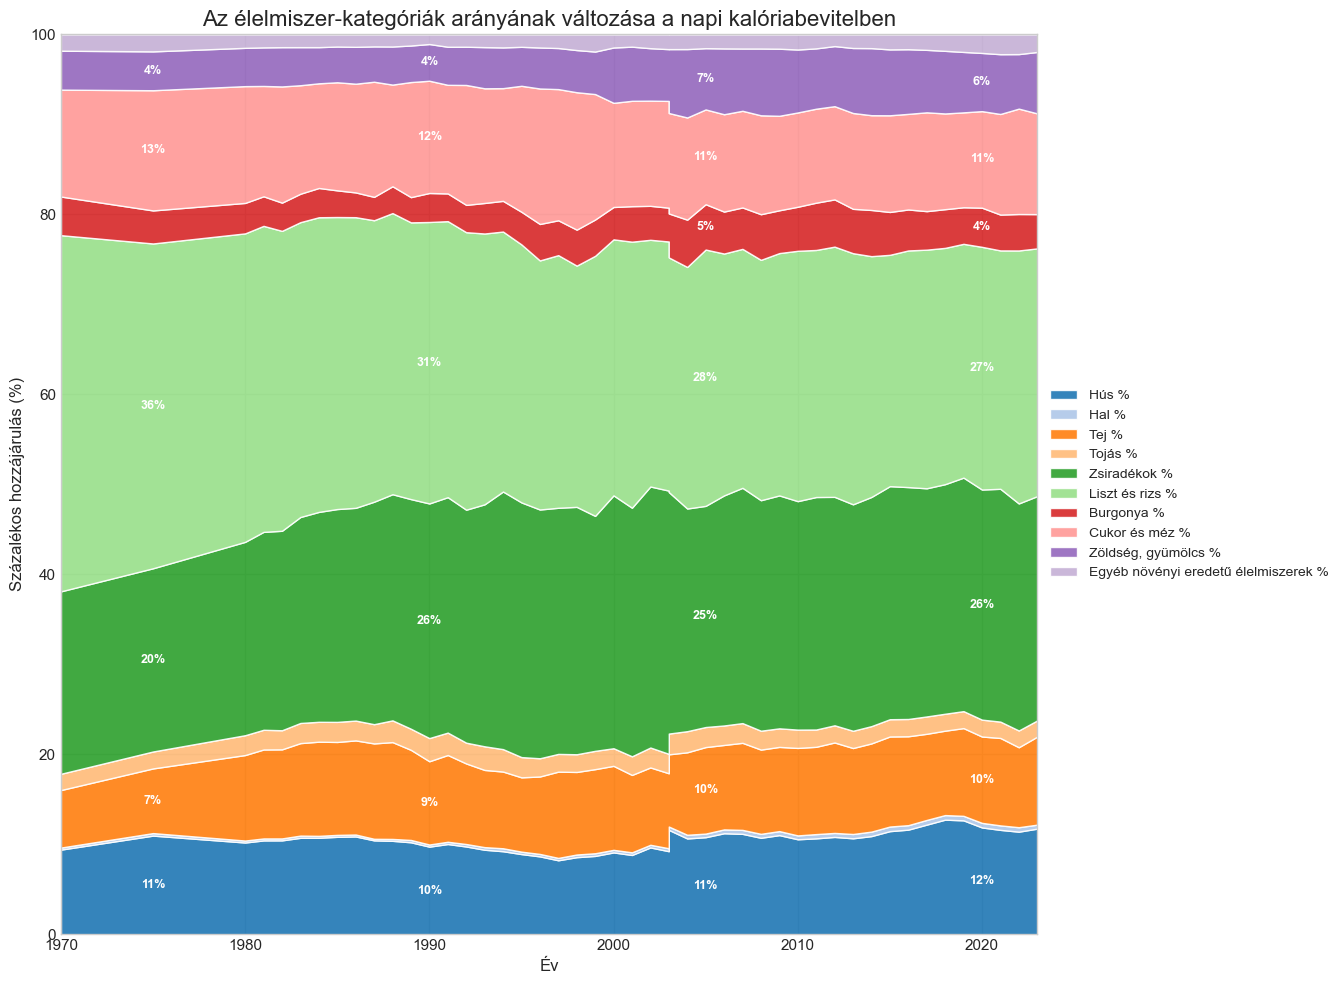

In [112]:

# --- 1. Lépés: Oszlopok definiálása ---
# oszlopok elnevezése, amik az egyes kategóriák kalória-hozzájárulását jelentik
kaloria_kategoriak = [
    'Hús', 'Hal', 'Tej', 'Tojás', 'Zsiradékok', 'Liszt és rizs',
    'Burgonya', 'Cukor és méz', 'Zöldség, gyümölcs', 'Egyéb növényi eredetű élelmiszerek'
]

# --- 2. Lépés: Százalékos arányok kiszámítása ---
# egyes kategóriák százalékos hozzájárulása az 'Összesen' oszlop alapján
for kategoria in kaloria_kategoriak:
    # Az új oszlop neve pl. 'Hús_%' lesz
    df_tapany_cal[f'{kategoria}_%'] = (df_tapany_cal[kategoria] / df_tapany_cal['Összesen']) * 100

# --- 3. Lépés: A 100%-os területdiagram létrehozása ---
# százalékos oszlopok az ábrázoláshoz
szazalek_oszlopok = [f'{kategoria}_%' for kategoria in kaloria_kategoriak]

plt.style.use('seaborn-whitegrid')
colors = plt.cm.tab20(range(len(szazalek_oszlopok)))
fig, ax = plt.subplots(figsize=(16, 10))

# területdiagram (stackplot) létrehozása
ax.stackplot(df_tapany_cal['Év'],
             df_tapany_cal[szazalek_oszlopok].T,
             labels=[label.replace('_', ' ') for label in szazalek_oszlopok],
             colors=colors,
             alpha=0.9)

# Címek és jelmagyarázat beállítása
ax.set_title('Az élelmiszer-kategóriák arányának változása a napi kalóriabevitelben', fontsize=16)
ax.set_xlabel('Év', fontsize=12)
ax.set_ylabel('Százalékos hozzájárulás (%)', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
ax.set_ylim(0, 100)
ax.set_xlim(df_tapany_cal['Év'].min(), df_tapany_cal['Év'].max())

# --- Címkék elhelyezése ---

evek_cimkezni = [1975, 1990, 2005, 2020]

# alsó határokat minden sávhoz
also_hatarok = np.vstack([np.zeros(len(df_tapany_cal)),
                         np.cumsum(df_tapany_cal[szazalek_oszlopok].T.values[:-1], axis=0)])
df_also_hatarok = pd.DataFrame(also_hatarok.T, columns=szazalek_oszlopok, index=df_tapany_cal['Év'])

#szöveg elhelyezése
for ev in evek_cimkezni:
    if ev in df_tapany_cal['Év'].values:
        for kategoria_szazalek in szazalek_oszlopok:
            szazalek_ertek = df_tapany_cal.loc[df_tapany_cal['Év'] == ev, kategoria_szazalek].iloc[0]
            y_pozicio = df_also_hatarok.loc[ev, kategoria_szazalek] + (szazalek_ertek / 2)

            # Csak akkor írjuk ki a számot, ha a sáv elég vastag (pl. 4% feletti)
            if szazalek_ertek > 4:
                ax.text(ev, y_pozicio, f'{szazalek_ertek:.0f}%',
                        ha='center', va='center', fontsize=9, color='white', weight='bold')


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('etel_kategoriak_aranya_cimkekkel.png', bbox_inches='tight')
plt.show()


- A legdrámaibb változás a Liszt és rizs (világoszöld sáv) arányának csökkenése. Ez a kategória, ami 1975-ben még a teljes kalóriabevitel 36%-át adta, 2020-ra 27%-ra szorult vissza. Ez a legjelentősebb egyedi elmozdulás, ami a magyar étrend teljes szerkezetét átalakította.

- A lisztes ételek visszaszorulásával felszabaduló kalóriákat nem egyetlen kategória vette át, hanem több is osztozott rajta:
- Tej (narancs sáv): Jelentősen növelte a részesedését, a kezdeti 7%-ról 10%-ra.
- Cukor és méz (piros sáv): A magas, 13%-os szintről 11%-ra csökkent az aránya.
- Zöldség, gyümölcs és Burgonya (lila és rózsaszín sávok): a két sáv együttes vizuális vastagodása mutatja, hogy egyre fontosabb szerepet játszanak a kalóriabevitelben, átvéve a lisztes ételek helyét.

-  A Hús (kék sáv) aránya stabil maradt az elmúlt 50 évben, folyamatosan a napi kalóriák 10-12%-át adja. Ez mutatja, hogy a hús alapvető szereplője a magyar étrendnek.

Összegzés 
- Az ábra egyértelműen dokumentálja a magyar táplálkozás elmozdulását egy liszt- és cukorközpontú modellből egy kiegyensúlyozottabb szerkezet felé, ahol a zsírok, a hús, a burgonya és a zöldségfélék együttesen nagyobb arányt képviselnek.

#### Az egyes kategóriák hány százalékkal járultak hozzá egy fix 2000 kalóriás étrendhez az évek során?

- példa: Hús: 292 kcal a 2000 kcal-ás napi bevitel 14.6%-a.
- A számítás menete: (292 / 2000) * 100 = 14.6


A működése:

- Veszünk egy listát az élelmiszer-kategóriákról (pl. 'Hús', 'Hal', stb.).
- Minden kategóriánál elvégzi a (kategória kalóriája / 2000) * 100 számítást minden egyes évre.
- Az eredményt egy új, _szazalek_2000 végződésű oszlopba menti el.
- A végeredmény egy táblázat, ami megmutatja, hogy az adott fogyasztás mekkora terhet róna egy 2000 kalóriás diétára kategóriánként.

In [116]:

# A napi teljes kalóriabevitel, amihez viszonyítunk
napi_osszes_kaloria = 2000

# Azok az oszlopok, amelyekre el szeretnénk végezni a számítást
kaloria_oszlopok = [
    'Hús', 'Hal', 'Tej', 'Tojás', 'Zsiradékok', 'Liszt és rizs',
    'Burgonya', 'Cukor és méz', 'Zöldség, gyümölcs', 'Egyéb növényi eredetű élelmiszerek'
]

# Menjünk végig az összes oszlopon és hozzuk létre a százalékos megfelelőjét
for oszlop in kaloria_oszlopok:
    # Az új oszlop neve pl. 'Hús_szazalek_2000' lesz
    uj_oszlop_nev = f'{oszlop}_%_2000'
    
    # A számítás elvégzése és az új oszlop létrehozása
    df_tapany_cal[uj_oszlop_nev] = (df_tapany_cal[oszlop] / napi_osszes_kaloria) * 100

# Jelenítsük meg az eredményt: az eredeti kalória oszlopokat és az újonnan létrehozott százalékos oszlopokat
# Az egyszerűség kedvéért csak néhányat íratunk ki
print(df_tapany_cal[['Év', 'Hús', 'Hús_%_2000', 'Liszt és rizs', 'Liszt és rizs_%_2000']].head())

     Év    Hús  Hús_%_2000  Liszt és rizs  Liszt és rizs_%_2000
0  1970  292.0       14.60         1226.0                 61.30
1  1975  356.0       17.80         1170.0                 58.50
2  1980  329.0       16.45         1104.0                 55.20
3  1981  334.0       16.70         1087.0                 54.35
4  1982  340.0       17.00         1084.0                 54.20


In [117]:
df_tapany_cal.head()

,Év,Hús,Hal,Tej,Tojás,Zsiradékok,Liszt és rizs,Burgonya,Cukor és méz,"Zöldség, gyümölcs",...,Hús_%_2000,Hal_%_2000,Tej_%_2000,Tojás_%_2000,Zsiradékok_%_2000,Liszt és rizs_%_2000,Burgonya_%_2000,Cukor és méz_%_2000,"Zöldség, gyümölcs_%_2000",Egyéb növényi eredetű élelmiszerek_%_2000
0,1970,292.0,7.0,198.0,56.0,628.0,1226.0,133.0,368.0,134.0,...,14.60,0.35,9.90,2.80,31.40,61.30,6.65,18.40,6.70,2.80
1,1975,356.0,9.0,233.0,61.0,660.0,1170.0,119.0,433.0,140.0,...,17.80,0.45,11.65,3.05,33.00,58.50,5.95,21.65,7.00,3.05
2,1980,329.0,7.0,306.0,71.0,692.0,1104.0,109.0,418.0,137.0,...,16.45,0.35,15.30,3.55,34.60,55.20,5.45,20.90,6.85,2.40
3,1981,334.0,7.0,316.0,70.0,703.0,1087.0,105.0,392.0,137.0,...,16.70,0.35,15.80,3.50,35.15,54.35,5.25,19.60,6.85,2.30
4,1982,340.0,7.0,322.0,69.0,721.0,1084.0,102.0,420.0,142.0,...,17.00,0.35,16.10,3.45,36.05,54.20,5.10,21.00,7.10,2.30


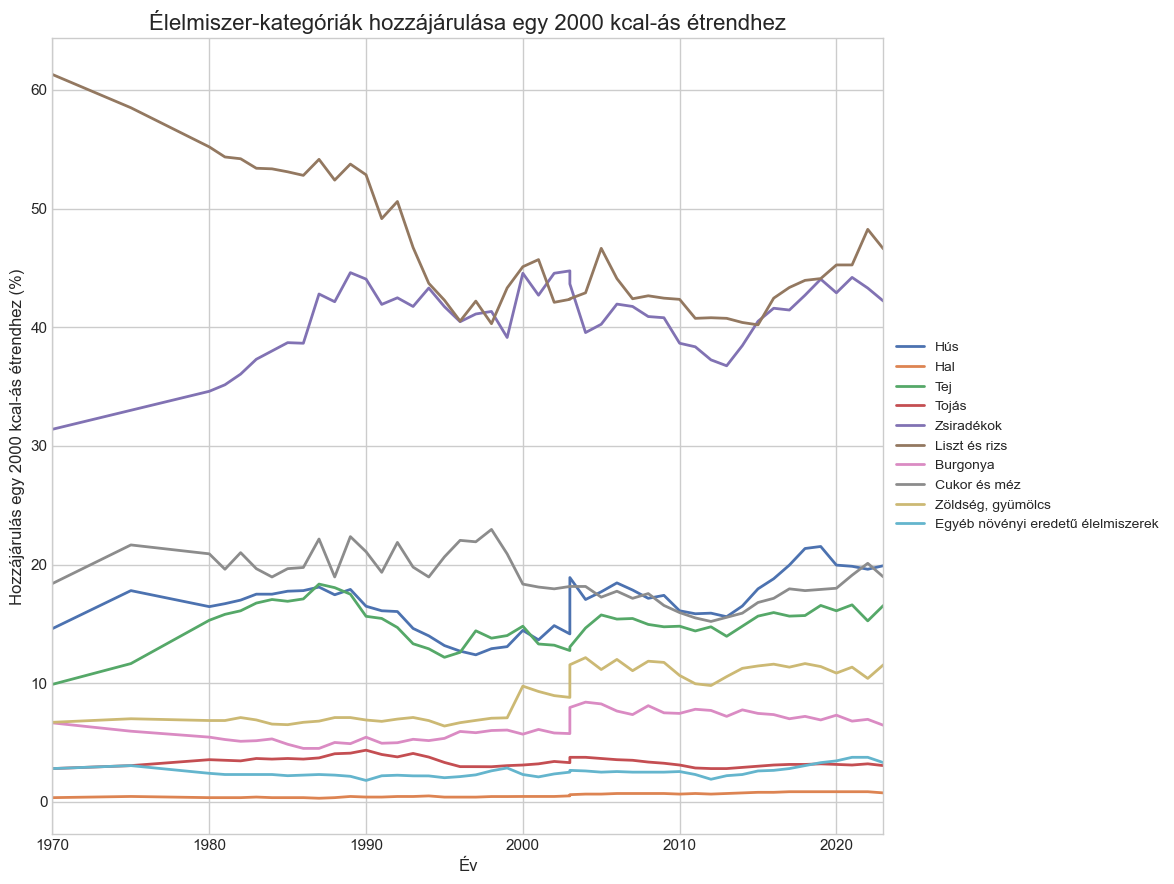

In [127]:

# százalékos oszlopok
kaloria_oszlopok = [
    'Hús', 'Hal', 'Tej', 'Tojás', 'Zsiradékok', 'Liszt és rizs',
    'Burgonya', 'Cukor és méz', 'Zöldség, gyümölcs', 'Egyéb növényi eredetű élelmiszerek'
]
szazalek_oszlopok_2000 = [f'{oszlop}_szazalek_2000' for oszlop in kaloria_oszlopok]

# Címkék létrehozása a jelmagyarázathoz (pl. "Hús" a "Hús_szazalek_2000" helyett)
cimkek = [oszlop.replace('_', ' ') for oszlop in kaloria_oszlopok]

# --- 2. Lépés: A vonaldiagram létrehozása ---

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# Ciklussal végigmegyünk minden százalékos oszlopon és hozzáadjuk a diagramhoz
for i, oszlop in enumerate(szazalek_oszlopok_2000):
    ax.plot(df_tapany_cal['Év'], df_tapany_cal[oszlop], label=cimkek[i], lw=2) # lw a vonalvastagság

# Címek és jelmagyarázat beállítása
ax.set_title('Élelmiszer-kategóriák hozzájárulása egy 2000 kcal-ás étrendhez', fontsize=16)
ax.set_xlabel('Év', fontsize=12)
ax.set_ylabel('Hozzájárulás egy 2000 kcal-ás étrendhez (%)', fontsize=12)

# A jelmagyarázat az ábrán kívülre
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

ax.set_xlim(df_tapany_cal['Év'].min(), df_tapany_cal['Év'].max())
ax.grid(True) # Rácsozás 

# A jobb oldali margó növelése, hogy a jelmagyarázat elférjen
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Ábra mentése
#plt.savefig('hozzajarulas_2000kcal_aranyahoz.png', bbox_inches='tight')
plt.show()

A Magyar Étrend Átalakulása (1970-2020)
- A magyar étrend egy alapvető szerkezeti átalakuláson ment keresztül az elmúlt 50 évben. A hetvenes-nyolcvanas évekre jellemző, hagyományos, szénhidrát-domináns modellt egy kalóriában sűrűbb, zsírokban gazdagabb és változatosabb étrend váltotta fel, miközben a fehérjebevitel egy meglepően stabil alapot biztosított mindvégig.

Szénhidrátok és Zsírok
- A legmeghatározóbb változás a két fő energiát adó makrotápanyag, a szénhidrátok és a zsírok viszonyának átrendeződése volt.
- A Szénhidrát Hanyatlása: A liszt és rizs alapú élelmiszerek, amelyek a 70-es években a napi kalóriabevitel több mint harmadát adták, drámaian visszaszorultak. Ezzel párhuzamosan a cukorfogyasztás is csökkent a 90-es évekbeli csúcsokhoz képest. 

- Zsírok
- A szénhidrátok visszaszorulásával felszabaduló kalóriákat elsősorban a zsiradékok vették át. A zsírbevitel egy közel 50 éven át tartó, szinte töretlen emelkedést mutat, ami azt jelzi, hogy a magyar étrend zsírsűrűsége jelentősen megnőtt. A korrelációs elemzések is megerősítették, hogy a lisztes ételek és a zsírok fogyasztása ellentétesen mozgott.

Fehérje
- Miközben a zsír-szénhidrát arány drámaian változott, a fehérjebevitel figyelemre méltóan stabil maradt az elmúlt 50 évben. Ez arra utal, hogy a szervezet fehérjeigénye egy állandó tényező, amelyet a magyar lakosság következetesen fedezett. A húsfogyasztás (grammban mért) növekedése ellenére annak kalóriabevitelhez való hozzájárulása alig változott, stabilan 10-12% körül maradt, ami szintén a fehérjebevitel állandóságát támasztja alá.


A Zöldség-Gyümölcs
- A leglátványosabb ugrást a zöldség- és gyümölcsfogyasztás produkálta, amely az ezredforduló környékén egy évtizedekig tartó stagnálás után hirtelen megnőtt. Ez egyértelműen jelzi a táplálkozási szokások modernizálódását és az egészségtudatosság növekedését.
Az elemzések kimutatták a szoros kapcsolatot a "modern" étrend elemei között: a hal, a zöldség-gyümölcs és a burgonya fogyasztása jellemzően együtt mozgott. A "hús-krumpli" hagyományos párosa szintén statisztikailag igazolható maradt.

Következtetés
- Az adatok egyértelműen egy több évtizedes, mélyreható étrendi átalakulást dokumentálnak. A magyar táplálkozás elmozdult egy hagyományos, néhány alapvető szénhidrátforrásra (liszt, cukor) épülő modellből egy sokszínűbb, de zsírokban gazdagabb szerkezet felé. A fehérjebevitel stabilitása mellett a zöldség- és gyümölcsfogyasztás növekedése pozitív fejlemény, azonban a zsírfogyasztás folyamatos emelkedése újabb közegészségügyi kérdéseket vet fel.

#### Napi összes kalóriabevitel alakulása

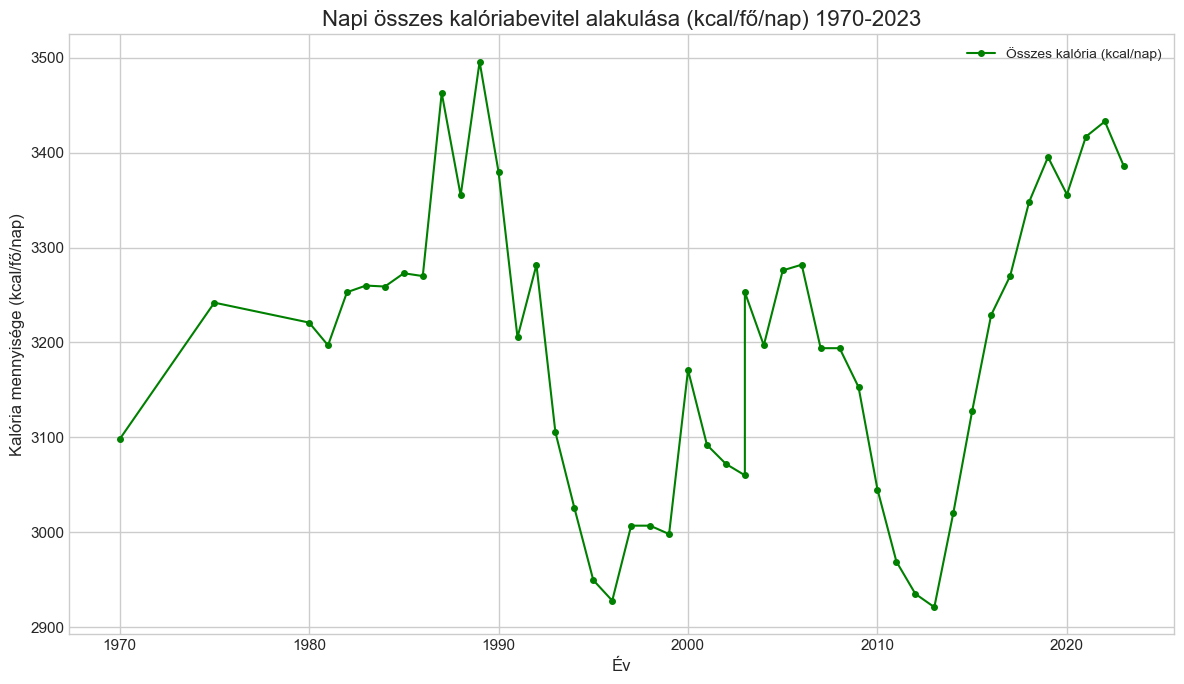

In [128]:

plt.figure(figsize=(12, 7))

plt.plot(df_tapany['Év'], df_tapany['Összesen'], label='Összes kalória (kcal/nap)', marker='o', markersize=4, color='green')

plt.title('Napi összes kalóriabevitel alakulása (kcal/fő/nap) 1970-2023', fontsize=16)
plt.xlabel('Év', fontsize=12)
plt.ylabel('Kalória mennyisége (kcal/fő/nap)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.savefig('total_calorie_trend.png')
plt.show()



Átfogó következtetés a napi kalóriabevitelre vonatkozóan:

- Az egy főre jutó napi összes kalóriabevitel Magyarországon az 1980-as évek elején érte el a csúcsát, majd jelentősen csökkent a 2000-es évek elejéig, ezt követően pedig stabilizálódott egy alacsonyabb szinten.

Az összes kalóriatrend fő mozgatórugói az egyes élelmiszerkategóriákban bekövetkezett eltolódások:
- A főbb szénhidrátforrások (Liszt és rizs) és zsírok (Zsiradékok) kalóriahozzájárulásának csökkenése a csúcspontjaik után, valamint a Cukor és méz csökkenése. 
- A Hús (Hús), Tej (Tej) és Zöldség, gyümölcs (Zöldség, gyümölcs) kalóriahozzájárulásának növekedése, ami bizonyos mértékben ellensúlyozta a más fő forrásokból származó csökkenést.
- A Hal (Hal) továbbra is elhanyagolható mértékben járul hozzá a napi kalóriabevitelhez, annak ellenére, hogy az éves fogyasztása (kg/fő-ben) nőtt, ami kiemeli alacsony kalóriasűrűségét más alapvető élelmiszerekhez képest.

Ez az elemzés egyértelműen megmutatja a magyar étrend alapvető eltolódását az évtizedek során, az energia teljes bevitelének csökkenésével, amelyet a magas kalóriatartalmú alapvető élelmiszerek, mint a liszt, rizs és zsírok fogyasztásának csökkenése, részben pedig a hús, tejtermékek és gyümölcsök/zöldségek fogyasztásának növekedése okozott.

#### Napi kalóriabevitel és a makrotápanyagok együttmozgása

Az összes élelmiszer-kategória napi kalóriahozzájárulásának alakulása, valamint az összesített napi kalóriabevitel (kcal/fő/nap) 1970 és 2023 között.

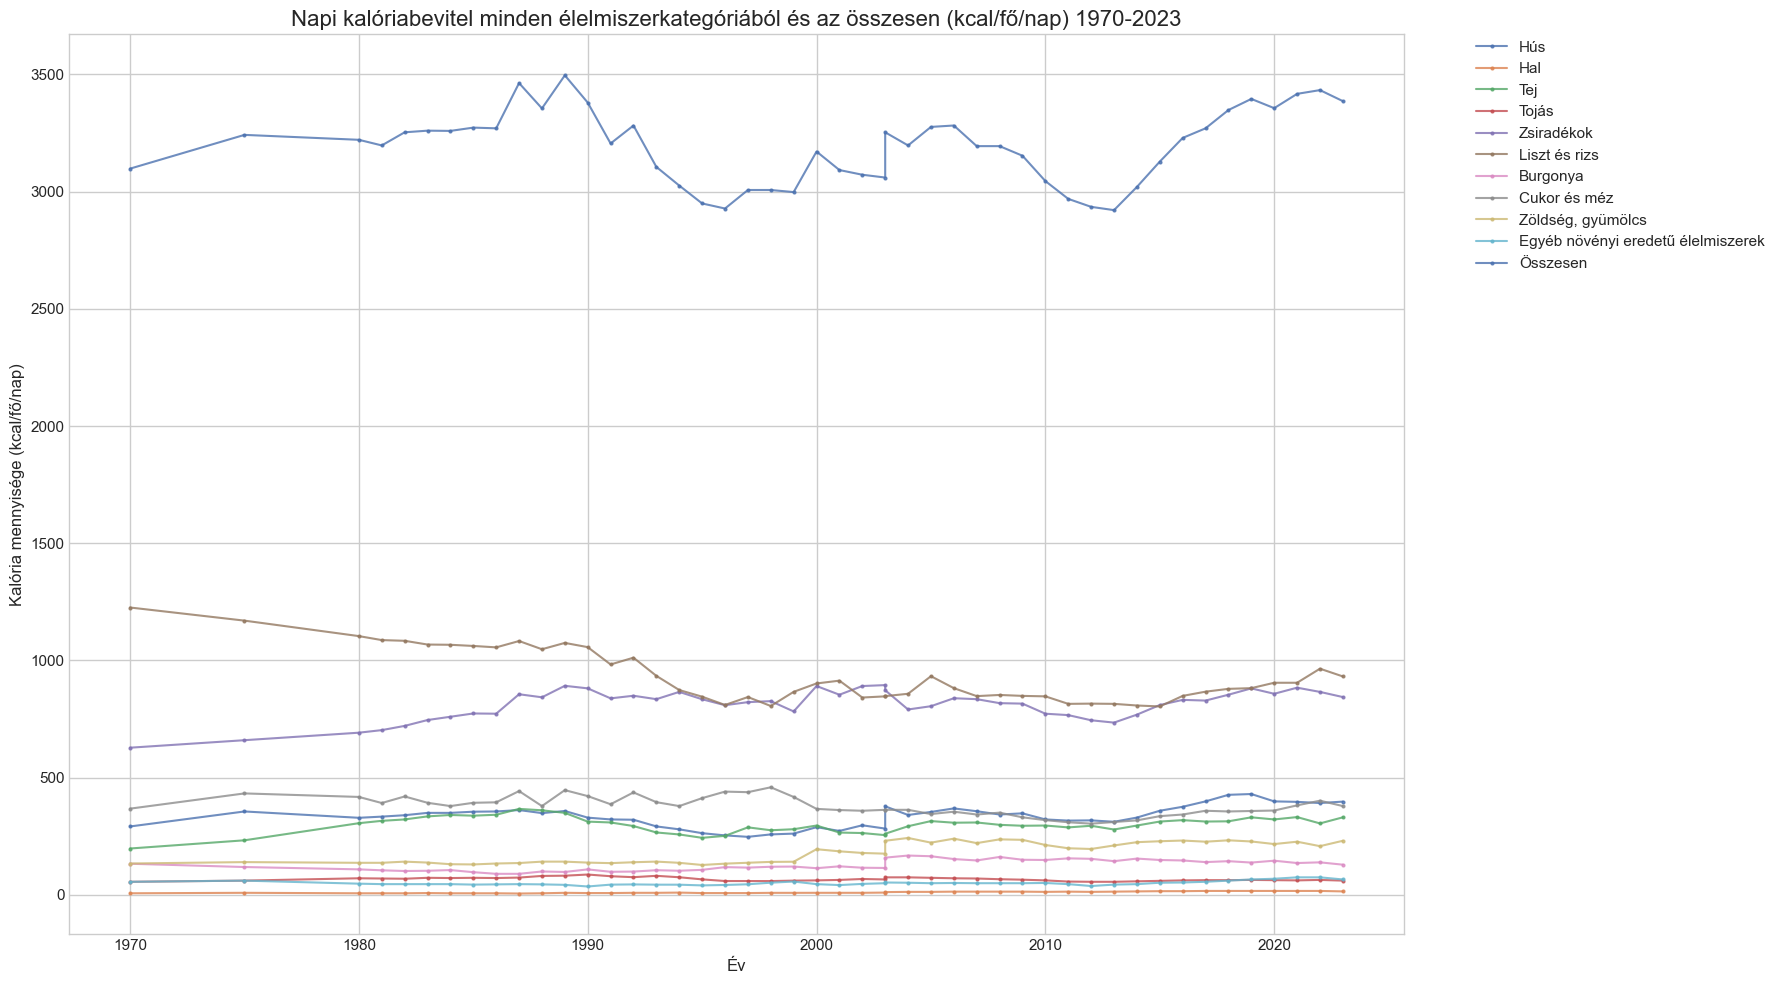

In [129]:

columns_to_plot = df_for_plotting_tapany.columns.drop('Év')
plt.figure(figsize=(18, 10))

for column in columns_to_plot:
    plt.plot(df_tapany['Év'], df_tapany[column], label=column, marker='.', markersize=4, alpha=0.8)

plt.title('Napi kalóriabevitel minden élelmiszerkategóriából és az összesen (kcal/fő/nap) 1970-2023', fontsize=16)
plt.xlabel('Év', fontsize=12)
plt.ylabel('Kalória mennyisége (kcal/fő/nap)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
plt.grid(True)
plt.tight_layout() 

plt.savefig('all_calorie_sources_and_total_trend.png')
plt.show()


- Összes kalóriabevitel (vastag kék vonal): Ahogy azt korábban elemeztük, az összes kalóriabevitel az 1980-as évek eleji csúcs után jelentősen csökkent a 2000-es évek elejéig, majd enyhe stabilizálódást mutatott egy alacsonyabb szinten.

- Liszt és rizs: a legnagyobb kalóriahozzájáruló volt a teljes időszakban, annak ellenére, hogy a kezdeti magas szintről csökkent a bevitele, ennek a kategóriának a változása (csökkenése) nagyban befolyásolta az összes kalóriabevitel csökkenését.
- Zsiradékok: A második legjelentősebb hozzájáruló, amely szintén csúcsot ért el az 1980-as évek közepén, majd jelentősen visszaesett. Ez a csökkenés szintén kulcsszerepet játszott az általános kalóriacsökkenésben.
- Cukor és méz: Szintén jelentős forrás, amely az 1980-as években érte el a csúcsát, majd csökkenő tendenciát mutatott, hozzájárulva a teljes kalóriabevitel mérséklődéséhez.

Növekvő tendenciák:

- Hús: A húsból származó kalóriabevitel növekedést mutatott az 1970-es évek óta, majd stabilizálódott egy magasabb szinten.
- Tej: A tejtermékekből származó kalóriabevitel egyenletesen növekedett a teljes vizsgált időszakban.
- Zöldség, gyümölcs: Ezekből a forrásokból származó kalóriabevitel is fokozatosan növekedett, ami pozitív eltolódást jelez az étrendben.

Stabil/Kisebb hozzájárulók:

- Burgonya, Tojás, Egyéb növényi eredetű élelmiszerek: Ezek a kategóriák viszonylag stabil, de kisebb kalóriahozzájárulást mutattak.
- Hal: Ahogy az már korábban is látszott, a hal nagyon csekély mértékben járul hozzá az összes napi kalóriabevitelhez, annak ellenére, hogy az éves fogyasztása g/fő-ben növekedett.

Fő következtetés ebből az átfogó diagramból:
- Az elmúlt évtizedekben a magyar lakosság napi összes kalóriabevitele csökkent, amelyet elsősorban a liszt és rizs, a zsiradékok és a cukor és méz kalóriahozzájárulásának visszaesése okozott. Ezt a csökkenést részben ellensúlyozta a hús, a tejtermékek, valamint a zöldségek és gyümölcsök növekvő kalóriahozzájárulása. A diagram vizuálisan is megerősíti a magyar étrend strukturális átalakulását, ahol a főbb energiaforrások aránya jelentősen megváltozott.

### ARIMA modell

#### Stacionaritás ellenőrzése ADF teszttel (Augmented Dickey-Fuller)

 stacionaritás azt jelenti, hogy az idősor statisztikai tulajdonságai (átlag, szórás, autokorreláció) időben állandóak. A legtöbb gazdasági és társadalmi idősor (mint a kórházi ágyak száma) általában nem stacionárius (pl. trendet mutat)

- Nullhipotézis (H0): Az idősor nem stacionárius.
- Alternatív hipotézis (H1): Az idősor stacionárius.

A lépések a következők:

- Stacionaritás vizsgálata (ADF teszt): Meghatározom, hogy az idősor stacionárius-e.
- Differenciálás (ha szükséges): Ha az idősor nem stacionárius, differenciálást alkalmazok, hogy stacionáriussá tegyem.
- Modell rendjének (p, q) meghatározása: A stacionárius idősor ACF és PACF diagramjait ábrázolom, hogy vizuálisan segítsen a p (AR rend) és q (MA rend) meghatározásában.

In [137]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Az 'Év' oszlop beállítása indexnek
df_tapany_indexed = df_tapany.set_index('Év')

# A célváltozó kiválasztása: 'Összesen' (Teljes napi kalóriabevitel kcal/fő/nap)
time_series_data = df_tapany_indexed['Összesen']

print("--- Stacionaritás vizsgálata (ADF teszt) ---")

def run_adf_test(series, name):
    """Augmented Dickey-Fuller teszt futtatása és eredmények kiírása."""
    print(f"\nADF teszt eredményei a(z) '{name}' sorozaton:")
    result = adfuller(series.dropna()) 
    print(f"ADF statisztika: {result[0]:.2f}")
    print(f"P-érték: {result[1]:.3f}")
    print("Kritikus értékek:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.2f}")

    if result[1] <= 0.05:
        print(f"Következtetés: A p-érték ({result[1]:.3f}) <= 0.05, így elutasítjuk a nullhipotézist. A(z) '{name}' sorozat VALÓSZÍNŰLEG STACIONÁRIUS.")
    else:
        print(f"Következtetés: A p-érték ({result[1]:.3f}) > 0.05, így nem utasítjuk el a nullhipotézist. A(z) '{name}' sorozat VALÓSZÍNŰLEG NEM STACIONÁRIUS.")

# ADF teszt futtatása az eredeti sorozaton
run_adf_test(time_series_data, 'Összesen Kalória (eredeti)')

# Differenciálás, ha szükséges
print("\n--- A függő változó stacionáriussá tétele (differenciálás) ---")

# Első differenciálás
time_series_diff1 = time_series_data.diff().dropna()
print("Az első differenciálás elvégzése.")

# ADF teszt futtatása az első differenciáláson
run_adf_test(time_series_diff1, 'Összesen Kalória (első differenciálás)')



--- Stacionaritás vizsgálata (ADF teszt) ---

ADF teszt eredményei a(z) 'Összesen Kalória (eredeti)' sorozaton:
ADF statisztika: -3.19
P-érték: 0.021
Kritikus értékek:
   1%: -3.59
   5%: -2.93
   10%: -2.60
Következtetés: A p-érték (0.021) <= 0.05, így elutasítjuk a nullhipotézist. A(z) 'Összesen Kalória (eredeti)' sorozat VALÓSZÍNŰLEG STACIONÁRIUS.

--- A függő változó stacionáriussá tétele (differenciálás) ---
Az első differenciálás elvégzése.

ADF teszt eredményei a(z) 'Összesen Kalória (első differenciálás)' sorozaton:
ADF statisztika: -7.37
P-érték: 0.000
Kritikus értékek:
   1%: -3.58
   5%: -2.93
   10%: -2.60
Következtetés: A p-érték (0.000) <= 0.05, így elutasítjuk a nullhipotézist. A(z) 'Összesen Kalória (első differenciálás)' sorozat VALÓSZÍNŰLEG STACIONÁRIUS.


Stacionaritás vizsgálata (Augmented Dickey-Fuller teszt):

Eredeti Összes Kalória sorozat (Original Total Calorie series):
- ADF Statisztika: -3.186985
- p-érték: 0.020751
- Kritikus értékek: 1%: -3.593, 5%: -2.932, 10%: -2.604
Következtetés: Mivel a p-érték (0.020751) kisebb, mint 0.05 (és még a 5%-os kritikus érték (-2.932) is nagyobb, mint az ADF statisztika (-3.186985)), az eredeti Összesen kalória idősor valószínűleg stacionárius. Ez azt jelenti, hogy az átlag, variancia és autokorreláció nem változik az idővel.

Első differenciált Összes Kalória sorozat (First Differenced Total Calorie series):
- ADF Statisztika: -7.369092
- p-érték: 0.000000
- Kritikus értékek: 1%: -3.585, 5%: -2.928, 10%: -2.602
Következtetés: A differenciált sorozat p-értéke rendkívül alacsony (0.000000), ami erősen megerősíti a stacionaritást.

Megjegyzés a differenciálásról (d):
Bár az eredeti sorozat p-értéke 0.05 alatt volt, ami stacionaritásra utal, az idősor vizuális képe (amely az 1980-as évektől csökkenő tendenciát mutatott) némi nem-stacionaritást is sugallhat. A differenciált sorozat sokkal alacsonyabb p-értéke pedig azt mutatja, hogy az első differenciálás (d=1) rendkívül hatékonyan teszi stacionáriussá a sorozatot. Ezért az ARIMA modell 'd' rendjét 1-nek tekinthetjük.

2. A modell rendjének (p, q) meghatározása a stacionárius függő változóra (ACF és PACF diagramok):

- Az acf_pacf_differenced_calories.png ábra az első differenciált Összesen kalória sorozat autokorrelációs (ACF) és parciális autokorrelációs (PACF) diagramjait mutatja be.
- ACF (Autokorrelációs Függvény) diagram (bal oldali ábra):
- Az ACF diagramon azt keressük, hogy hol esik le az autokorreláció drámaian a konfidencia intervallumon kívülre.
- Az első néhány késleltetésnél (lag 1, lag 2) szignifikáns az autokorreláció, majd fokozatosan csökken. A q (mozgóátlag) rendet az ACF-en lévő szignifikáns "tüske" (spike) vagy hirtelen leesés határozza meg, mielőtt fokozatosan elhalványul. Itt talán egy q=1 vagy q=2 is szóba jöhet, mivel az első 1-2 késleltetés szignifikáns, majd a többi a konfidencia intervallumon belülre esik.

PACF (Parciális Autokorrelációs Függvény) diagram (jobb oldali ábra):
-  PACF diagramon azt keressük, hogy hol esik le a parciális autokorreláció drámaian a konfidencia intervallumon kívülre. Ez adja meg a p (autoregresszív) rendet.
- Az 1. késleltetés (lag 1) szignifikáns, utána a 2. és 3. késleltetés már a konfidencia intervallumon belül van. Ez egy p=1 rendet sugallhat.

Összefoglalás a (p, d, q) rendekre vonatkozóan:

- d = 1: Az első differenciálás hatékonyan tette stacionáriussá a sorozatot.
- p: A PACF alapján egy p=1 tűnik a legvalószínűbbnek, mivel az első késleltetés után a többi parciális autokorreláció szignifikánsan leesik.
- q: Az ACF alapján egy q=1 vagy q=2 is elképzelhető, mivel az első 1-2 késleltetés után az autokorrelációk gyorsan leesnek a konfidencia intervallumon belülre.
Ez alapján az ARIMA modellhez megfontolandó rendek lehetnek például: ARIMA(1,1,1) vagy ARIMA(1,1,2). 

#### Dekompozíció

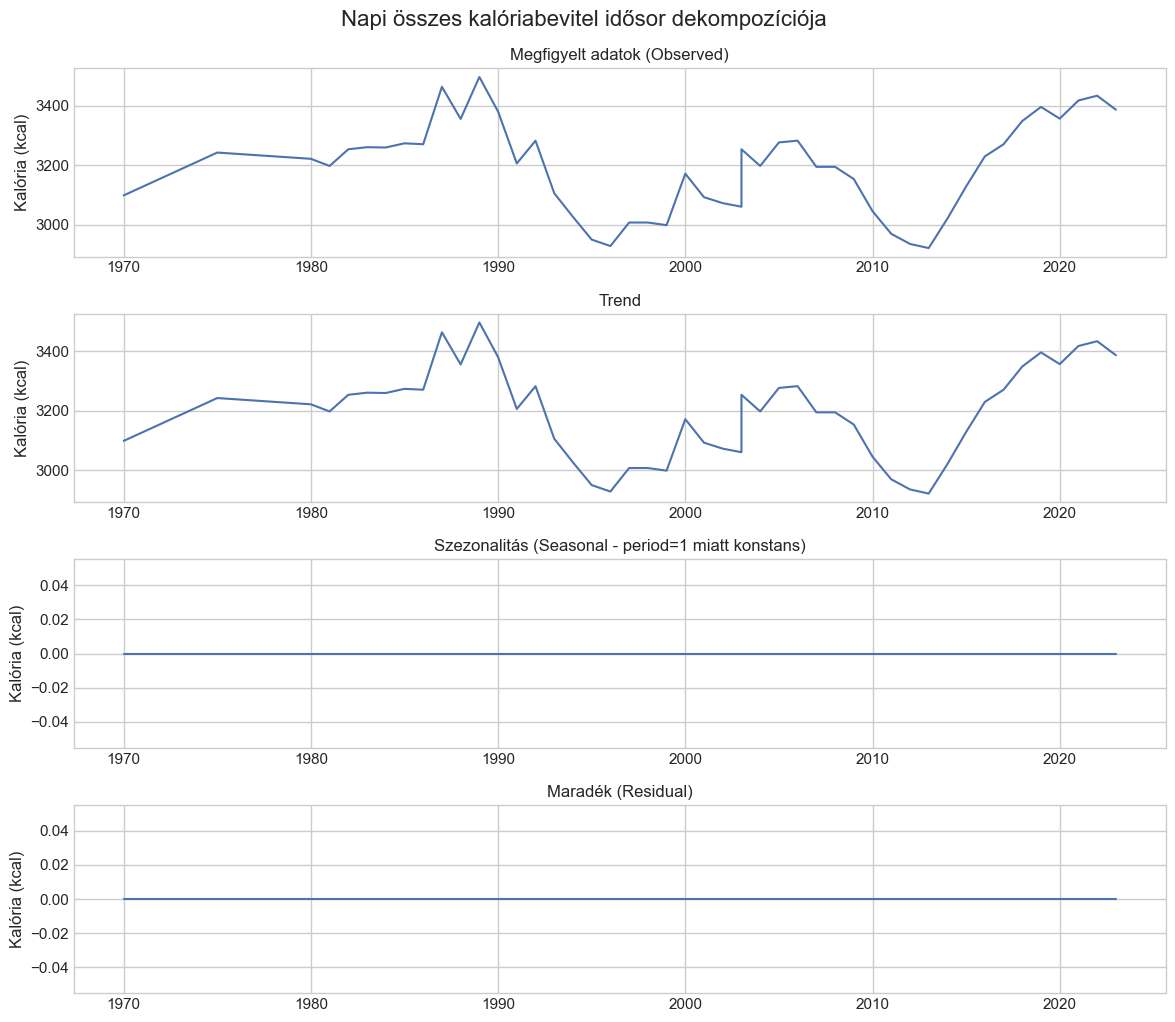


Az idősor dekompozíciója elvégezve és ábrázolva. A diagramok segítségével vizualizálható a trend, a szezonalitás (ami éves adatok esetén konstansnak tűnhet), és a maradék komponens.


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


# Setting extrapolate_trend='freq' to handle NaNs at the beginning/end due to convolution
decomposition = seasonal_decompose(time_series_data, model='additive', period=1, extrapolate_trend='freq')

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Megfigyelt adatok (Observed)')
plt.ylabel('Kalória (kcal)')
plt.grid(True)

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.ylabel('Kalória (kcal)')
plt.grid(True)

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Szezonalitás (Seasonal - period=1 miatt konstans)')
plt.ylabel('Kalória (kcal)')
plt.grid(True)

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Maradék (Residual)')
plt.ylabel('Kalória (kcal)')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Napi összes kalóriabevitel idősor dekompozíciója', y=1.02, fontsize=16) # Main title
plt.savefig('calorie_time_series_decomposition.png')
plt.show()

print("\nAz idősor dekompozíciója elvégezve és ábrázolva. A diagramok segítségével vizualizálható a trend, a szezonalitás (ami éves adatok esetén konstansnak tűnhet), és a maradék komponens.")

Az ábra négy részből áll:

- Eredeti (Original): Ez a teljes napi kalóriabevitel idősorát mutatja. Egyértelműen látható az 1980-as évek elején elért csúcs, majd a jelentős csökkenés a 2000-es évek elejéig, amit egy stabilizálódás/enyhe fellendülés követett.
- Trend: Ez a komponens az idősor hosszú távú változásait rögzíti. Pontosan tükrözi az eredeti sorozatban megfigyelhető mintázatot: kezdeti növekedés, majd erős csökkenő trend, végül stabilizálódás az elmúlt évtizedekben. Ez megerősíti, hogy egyértelmű, nemlineáris trend van jelen az adatokban.
- Szezonális (Seasonal): Ahogy az éves adatoknál várható volt (ahol a periódus 1), ez a komponens egy egyenes, vízszintes vonal. Ez azt jelzi, hogy nincs értelmezhető szezonalitás ebben az éves idősoros adatban. Ha az adatok haviak vagy negyedévesek lennének, akkor itt egy ismétlődő mintázatot várnánk.
- Reziduális (Residual): Ez a komponens a "zajt" vagy a szabálytalan ingadozásokat képviseli, amelyek a trend és a szezonális komponensek eltávolítása után maradnak. A reziduumok nullára koncentrálódnak, de mutatnak némi változékonyságot. Nincsenek nyilvánvaló erős mintázatok, ami jó jel. A reziduumok nagysága viszonylag kicsi a trendhez képest, ami azt jelzi, hogy a trendkomponens magyarázza a variáció nagy részét.

Szükséges volt-e a dekompozíció?

A dekompozíció hasznos volt, a következő okok miatt:
- A trend egyértelmű vizualizálása: Világosan elválasztja és kiemeli a kalóriabevitel mögöttes hosszú távú trendjét, megerősítve a komplex, nemlineáris mozgást (emelkedés, esés, stabilizálódás). Ez a vizuális megerősítés értékes az ARIMA modell 'd' (differenciálási) paraméterének megértéséhez. A hangsúlyos, nem konstans trend megerősíti, hogy némi differenciálás valóban szükséges a sorozat stacionáriussá tételéhez, még akkor is, ha az eredeti sorozat ADF tesztje határeset volt.
- A szezonalitás hiányának megerősítése: Explicit módon megmutatja, hogy ebben az éves adatban nincs szezonális komponens, amit modellezni kellene, ami leegyszerűsíti az ARIMA modellezést (nincs szükség SARIMA paraméterekre: P, D, Q, Period).
- Reziduumok ellenőrzése: Lehetővé teszi a reziduumok gyors vizuális ellenőrzését, biztosítva, hogy ne maradjanak nyilvánvaló mintázatok (például fennmaradó trend vagy szezonalitás) modellezetlenül, és azonosítja a potenciális kiugró értékeket (bár itt nincsenek feltűnő kiugró értékek).

Összefoglalva, bár az eredeti sorozat ADF tesztje stacionaritást sugallt, a dekompozíció egyértelműen kimutatja egy erős, mögöttes trend meglétét, amit figyelembe kell venni. Az d=1 differenciálás (ahogy az előző ARIMA modellben is használtuk) indokolt ennek a látható trendnek köszönhetően. A szezonális komponens hiánya pedig azt jelenti, hogy egy egyszerűbb, nem szezonális ARIMA modell alkalmazása a megfelelő.

#### Differenciálás

- ADF teszt az első differenciált sorozaton (d=1): Az első differenciálás után a p-érték rendkívül alacsony (0.000000) lett, ami nagyon erősen megerősíti, hogy a sorozat stacionáriussá vált.
Következtetés: Az idősor hosszú távú trendjének kezelésére és a stacionaritás egyértelmű biztosítására az első differenciálás (d=1) alkalmazása indokolt és szükséges az ARIMA modell felépítésénél. Ez a lépés segít eltávolítani a trendet, és lehetővé teszi a modell számára, hogy jobban megragadja az idősor autokorrelációs struktúráját.

#### A model rendjének meghatározása

##### Autokorrelációs Függvény (ACF) és a Parciális Autokorrelációs Függvény (PACF) diagramjai egy idősorra vonatkozóan. Paraméterbecslés


--- A modell rendjének (p, q) meghatározása (ACF és PACF plotok) ---


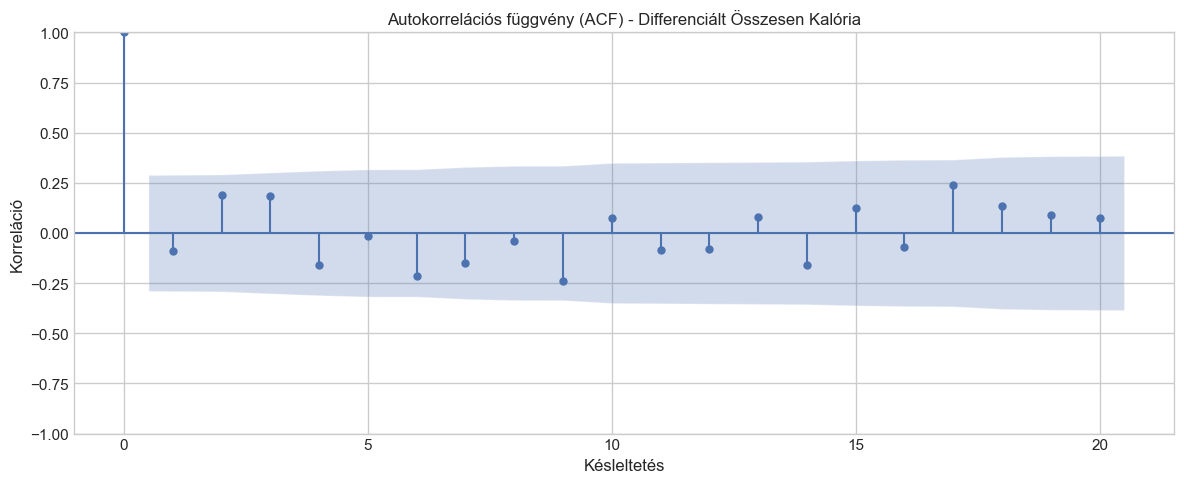

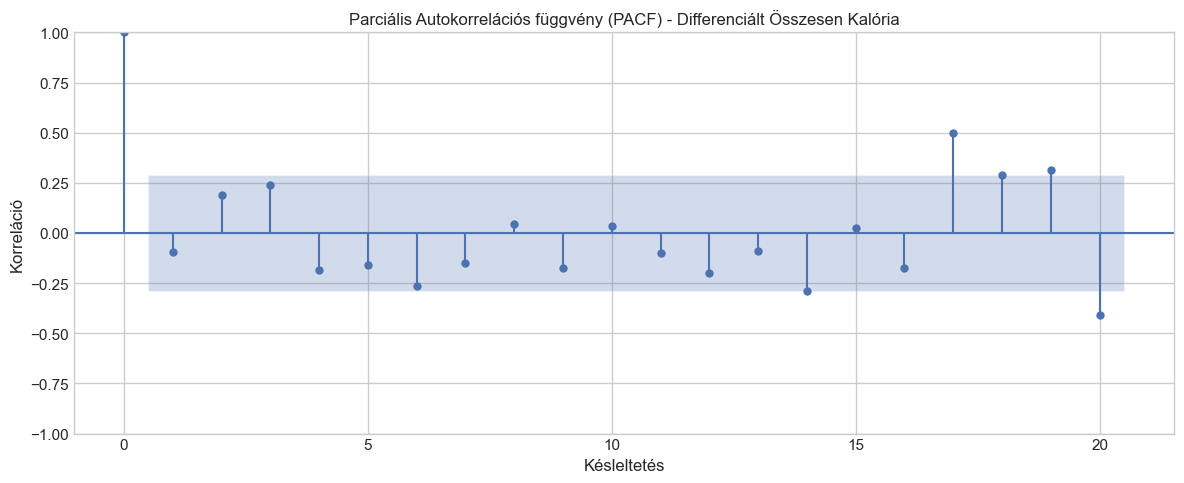

In [135]:
# A modell rendjének (p, q) meghatározása (ACF és PACF plotok)
print("\n--- A modell rendjének (p, q) meghatározása (ACF és PACF plotok) ---")

# ACF plot
plt.figure(figsize=(12, 5))
plot_acf(time_series_diff1, lags=20, ax=plt.gca(), title='Autokorrelációs függvény (ACF) - Differenciált Összesen Kalória')
plt.xlabel('Késleltetés')
plt.ylabel('Korreláció')
plt.grid(True)
plt.tight_layout()
plt.savefig('acf_total_calorie_diff1.png')
plt.show()

# PACF plot
plt.figure(figsize=(12, 5))
plot_pacf(time_series_diff1, lags=20, ax=plt.gca(), title='Parciális Autokorrelációs függvény (PACF) - Differenciált Összesen Kalória')
plt.xlabel('Késleltetés')
plt.ylabel('Korreláció')
plt.grid(True)
plt.tight_layout()
plt.savefig('pacf_total_calorie_diff1.png')
plt.show()

### A modell illesztése

##### Javasolt ARIMA rend

Az ACF és PACF diagramok elemzése alapján a Összesen kalóriabevitel idősorhoz (az első differenciálás után) a következő ARIMA rendek javasoltak:

- d = 1: Az első differenciálás tette stacionáriussá a sorozatot, így a differenciálási rend 1.
- p (AR rend): A PACF diagram alapján az 1. késleltetés szignifikáns, utána a parciális autokorreláció gyorsan csökken. Ez egy p=1 rendet sugall.
- q (MA rend): Az ACF diagram alapján az 1. vagy 2. késleltetés szignifikáns lehet, mielőtt az autokorreláció gyorsan csökkenne. Ezért egy q=1 vagy q=2 rend is szóba jöhet.

Javasolt ARIMA rendek a kipróbálásra:

- ARIMA(1,1,1): Ez egy jó kiindulópont, mivel mind a PACF, mind az ACF diagramon az első késleltetés tűnik a legfontosabbnak.
- ARIMA(1,1,2): Ha az ARIMA(1,1,1) modell nem kielégítő, vagy ha úgy gondoljuk, hogy az ACF diagramon a 2. késleltetés is releváns, akkor érdemes kipróbálni ezt a rendet is.

ARIMA modell illesztése az 'Összesen' kalóriabevitelre (rend: (1, 1, 2))...

ARIMA modell összefoglalója:
                               SARIMAX Results                                
Dep. Variable:               Összesen   No. Observations:                   47
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -268.516
Date:                Tue, 22 Jul 2025   AIC                            545.031
Time:                        12:03:45   BIC                            552.346
Sample:                             0   HQIC                           547.771
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3825      0.392      0.977      0.329      -0.385       1.150
ma.L1         -0.5327    

C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


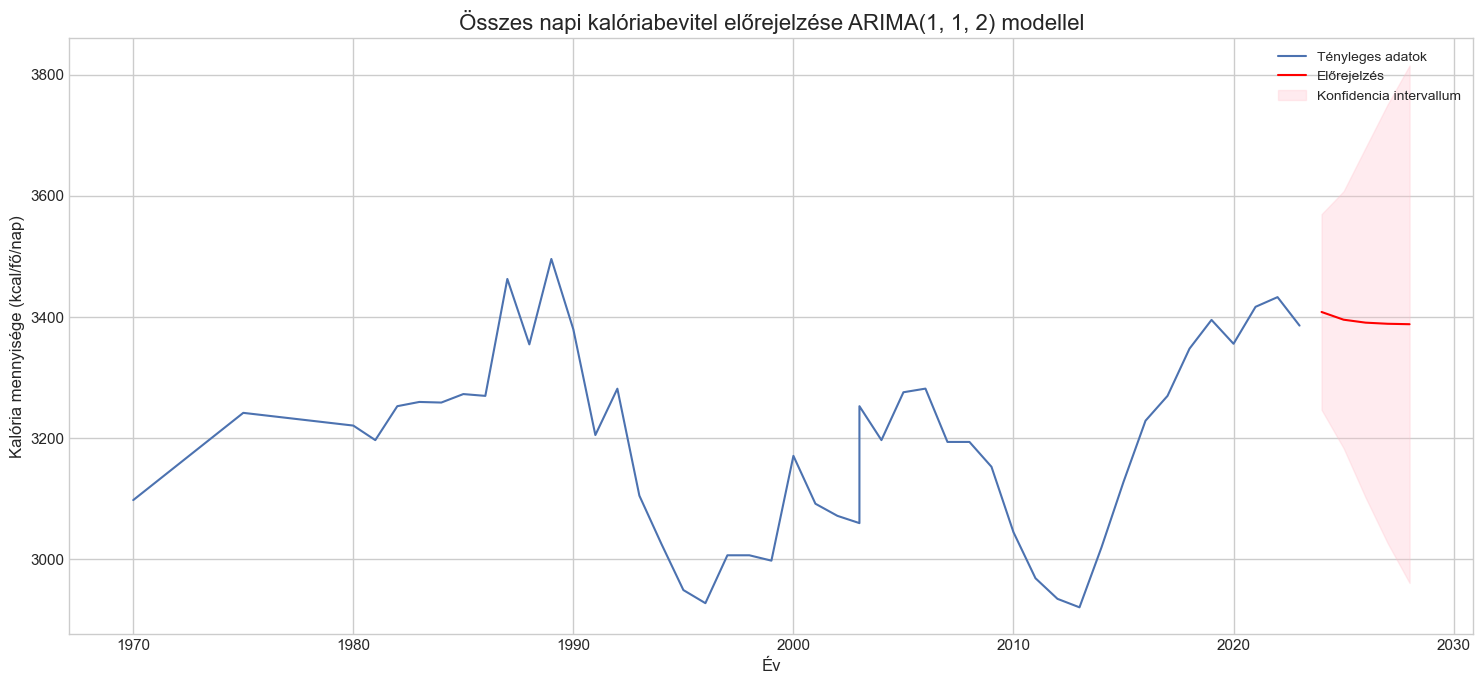

A felhasznált ARIMA rend: (1, 1, 2). Fontos megjegyezni, hogy az optimális rendet (p,d,q) az adatok további statisztikai elemzése (pl. ACF és PACF diagramok) vagy automatikus illesztési eljárások (pl. AIC/BIC kritériumok) segítségével lehetne meghatározni.


In [156]:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_tapany_indexed = df_tapany.set_index('Év')

time_series_data = df_tapany_indexed['Összesen']

arima_order = (1, 1, 2) 

print(f"ARIMA modell illesztése az 'Összesen' kalóriabevitelre (rend: {arima_order})...")
try:
    model = ARIMA(time_series_data, order=arima_order)
    model_fit = model.fit()

    print("\nARIMA modell összefoglalója:")
    print(model_fit.summary())


    n_periods = 5 
    forecast_start_year = df_tapany_indexed.index.max() + 1
    forecast_end_year = forecast_start_year + n_periods - 1

    
    forecast_results = model_fit.get_forecast(steps=n_periods)
    forecast = forecast_results.predicted_mean
    conf_int = forecast_results.conf_int()

    
    forecast_index = np.arange(forecast_start_year, forecast_end_year + 1)

    
    plt.figure(figsize=(15, 7))
    plt.plot(time_series_data.index, time_series_data, label='Tényleges adatok')
    plt.plot(forecast_index, forecast, label='Előrejelzés', color='red')
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Konfidencia intervallum')

    plt.title(f'Összes napi kalóriabevitel előrejelzése ARIMA{arima_order} modellel', fontsize=16)
    plt.xlabel('Év', fontsize=12)
    plt.ylabel('Kalória mennyisége (kcal/fő/nap)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()

    plt.savefig('arima_calorie_forecast_statsmodels.png')
    plt.show()

   
    print(f"A felhasznált ARIMA rend: {arima_order}. Fontos megjegyezni, hogy az optimális rendet (p,d,q) az adatok további statisztikai elemzése (pl. ACF és PACF diagramok) vagy automatikus illesztési eljárások (pl. AIC/BIC kritériumok) segítségével lehetne meghatározni.")

except Exception as e:
    print(f"Hiba történt az ARIMA modell illesztése során: {e}")
    print("Lehet, hogy az adott (p,d,q) rend nem megfelelő az adatokhoz, vagy az adatok nem elegendőek a modellhez.")
    print("Érdemes lehet más (p,d,q) rendet kipróbálni, vagy előzetesen vizsgálni az adatok stacionaritását és korrelációs tulajdonságait.")

ARIMA(1,1,2) Modell Eredményei:

Modell összefoglaló:
- Model: ARIMA(1, 1, 2)  1 AR tagot, 1 differenciálást és 2 MA tagot használ.
- Az ARIMA(1,1,2) modell AIC és BIC értékei alacsonyabbak, ez azt jelzi, hogy az ARIMA(1,1,2) modell jobb az adatokhoz való illeszkedés és a parszimónia (egyszerűség) egyensúlyát tekintve.

Diagnosztikai statisztikák:

- Ljung-Box (Q): Prob(Q) = 0.88. Magas p-érték, ami azt jelzi, hogy nincs szignifikáns autokorreláció a reziduumokban. Jó.
- Jarque-Bera (JB): Prob(JB) = 0.50. Magas p-érték, ami azt mutatja, hogy a reziduumok normál eloszlásúak. Ez jelentős javulás az (5,1,0) modellhez képest (aminek p-értéke határeset volt 0.10). Nagyon jó.
- Heteroszkedaszticitás (H): Prob(H) = 0.12. Magas p-érték, ami azt sugallja, hogy a reziduumok varianciája konstans. Jó.
- Ferdeség (0.36) és Csúcsosság (3.46) értékei közelebb állnak a normál eloszlás elvárásaihoz.

- A Jarque-Bera teszt megerősíti a reziduumok normalitását, ami az ARIMA modellek kulcsfontosságú feltételezése, és javítja az előrejelzés és a konfidencia intervallumok megbízhatóságát.
- Jó reziduum diagnosztika: A Ljung-Box és Heteroszkedaszticitás tesztek is jól viselkedő reziduumokat jeleznek.

A modell a teljes napi kalóriabevitel stabilizálódásának folytatását prognosztizálja a jelenlegi szinteken a következő öt évre. Ez a modell statisztikailag megalapozottabb, mint az előző.

#### Predikció

In [139]:
# Feltételezve, hogy a 'model_fit' objektum az ARIMA modell illesztése után már létezik
# (Ahogy az előző lépésben az 'Összesen' kalóriabevitelre illesztettük az ARIMA(1,1,2) modellt).

# Az előrejelzéshez szükséges periódusok száma (input)
n_periods = 5 # Például a következő 5 évre

# Az előrejelzés elkészítése a illesztett modell segítségével
# A 'get_forecast()' metódus biztosítja a predicted_mean és a konfidencia intervallumokat is.
forecast_results = model_fit.get_forecast(steps=n_periods)

# Az előrejelzett értékek (output)
forecast_values = forecast_results.predicted_mean

# Az előrejelzett konfidencia intervallumok (output)
conf_int_values = forecast_results.conf_int()

print(f"Előrejelzés a következő {n_periods} periódusra (input: {n_periods} év):")
print("Előrejelzett értékek (kcal/fő/nap):")
print(forecast_values)
print("\n95%-os konfidencia intervallumok:")
print(conf_int_values)

Előrejelzés a következő 5 periódusra (input: 5 év):
Előrejelzett értékek (kcal/fő/nap):
47    3408.497350
48    3395.761736
49    3390.890232
50    3389.026832
51    3388.314063
Name: predicted_mean, dtype: float64

95%-os konfidencia intervallumok:
    lower Összesen  upper Összesen
47     3246.998781     3569.995920
48     3183.829055     3607.694416
49     3102.294178     3679.486287
50     3027.152802     3750.900862
51     2961.185563     3815.442562


C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [140]:
conf_int_values

,lower Összesen,upper Összesen
47,3246.998781,3569.995920
48,3183.829055,3607.694416
49,3102.294178,3679.486287
50,3027.152802,3750.900862
51,2961.185563,3815.442562


#### Granger-kauzalitás teszt

A Granger-kauzalitás teszt segít feltárni, hogy az egyik élelmiszer-kategória múltbeli fogyasztása segít-e előrejelezni egy másik kategória jövőbeli fogyasztását. Ez betekintést nyújthat az étrendi váltások ok-okozati összefüggéseibe.


A következő párokat vizsgálom:
- Liszt és rizs és Hús
- Zsiradékok és Hús
- Liszt és rizs és Összesen
- A teszthez a maxlag=3 értéket fogom használni, ami ésszerű az éves adatokhoz.

In [141]:

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

# Az 'Év' oszlop beállítása indexnek
df_nutrient_data_indexed = df_tapany.set_index('Év')

# --- Granger-kauzalitás teszt ---
print("--- Granger-kauzalitás tesztek ---")

df_differenced = df_nutrient_data_indexed.diff().dropna()

# A késleltetések száma (maxlag). Éves adatoknál 2-3 késleltetés általában elegendő.
test_pairs = [
    ('Hús', 'Liszt és rizs'),
    ('Liszt és rizs', 'Hús'),
    ('Zsiradékok', 'Hús'),
    ('Hús', 'Zsiradékok'),
    ('Liszt és rizs', 'Összesen'),
    ('Összesen', 'Liszt és rizs')
]
max_lags = 3 # Maximum 3 késleltetés

for pair in test_pairs:
    print(f"\nGranger-kauzalitás teszt: {pair[0]} -> {pair[1]}?")
    
    data_for_test = df_differenced[[pair[1], pair[0]]] # [Y, X]
    results = grangercausalitytests(data_for_test, maxlag=max_lags, verbose=False)

    for lag in range(1, max_lags + 1):
        test_result = results[lag][0]['ssr_ftest']
        p_value = test_result[1]
        print(f"  Késleltetés {lag}: p-érték = {p_value:.4f}")
        if p_value <= 0.05:
            print(f"    --> EGYÉRTELMŰEN {pair[0]} GRANGER-OKOZZA {pair[1]} értékét (p <= 0.05)")
        else:
            print(f"    --> Nincs elegendő bizonyíték arra, hogy {pair[0]} GRANGER-OKOZZA {pair[1]} értékét (p > 0.05)")



--- Granger-kauzalitás tesztek ---

Granger-kauzalitás teszt: Hús -> Liszt és rizs?
  Késleltetés 1: p-érték = 0.6389
    --> Nincs elegendő bizonyíték arra, hogy Hús GRANGER-OKOZZA Liszt és rizs értékét (p > 0.05)
  Késleltetés 2: p-érték = 0.1179
    --> Nincs elegendő bizonyíték arra, hogy Hús GRANGER-OKOZZA Liszt és rizs értékét (p > 0.05)
  Késleltetés 3: p-érték = 0.1294
    --> Nincs elegendő bizonyíték arra, hogy Hús GRANGER-OKOZZA Liszt és rizs értékét (p > 0.05)

Granger-kauzalitás teszt: Liszt és rizs -> Hús?
  Késleltetés 1: p-érték = 0.0646
    --> Nincs elegendő bizonyíték arra, hogy Liszt és rizs GRANGER-OKOZZA Hús értékét (p > 0.05)
  Késleltetés 2: p-érték = 0.2411
    --> Nincs elegendő bizonyíték arra, hogy Liszt és rizs GRANGER-OKOZZA Hús értékét (p > 0.05)
  Késleltetés 3: p-érték = 0.5171
    --> Nincs elegendő bizonyíték arra, hogy Liszt és rizs GRANGER-OKOZZA Hús értékét (p > 0.05)

Granger-kauzalitás teszt: Zsiradékok -> Hús?
  Késleltetés 1: p-érték = 0.5201
 

A Granger-kauzalitás tesztek eredményei a kiválasztott változópárokra a következők:
A nullhipotézis (miszerint a "okozó változó" nem okoz Granger-kauzalitást az "eredmény változóban") elutasításához a p-értéknek 0.05 alatt kell lennie.

Összefoglalás a Granger-kauzalitás tesztek eredményeiről (max. 3 késleltetésre):
- Az elvégzett tesztek alapján (legfeljebb 3 késleltetésig) egyik vizsgált páros sem mutatott statisztikailag szignifikáns Granger-kauzális kapcsolatot egyik irányban sem. Ez azt jelenti, hogy a tesztek szerint az egyik változó múltbeli értékei nem segítik szignifikánsan előre jelezni a másik változó jövőbeli értékeit, figyelembe véve a saját múltbeli értékeiket.
- Ez több dolgot is jelenthet:

- A kapcsolatok bonyolultabbak (nemlineárisak, vagy több késleltetést érintenek, mint amit teszteltünk).
- A kapcsolatok szinkronikusak (egyidejűleg történnek), amit a Granger-kauzalitás nem ragad meg.
- Lehet, hogy nincs közvetlen Granger-kauzális kapcsolat.

#### VAR modell

A VAR modell segítségével modellezhetjük a különböző élelmiszer-kategóriák kalória hozzájárulásainak együttes dinamikáját és egymásra hatását. Ez különösen releváns, mivel az egyes kategóriák fogyasztása valószínűleg összefügg (pl. egyik csökkenése a másik növekedésével járhat).


A VAR modell összefoglalója részletesen mutatja az egyes változók egyenleteit, és azt, hogy a többi változó múltbeli értékei (és saját múltbeli értékei) hogyan befolyásolják

In [153]:

from statsmodels.tsa.stattools import adfuller, grangercausalitytests

var_columns = ['Liszt és rizs', 'Zsiradékok', 'Hús', 'Tej', 'Zöldség, gyümölcs', 'Összesen']
df_var_data = df_nutrient_data_indexed[var_columns].diff().dropna()

Optimális késleltetési rend kiválasztása a VAR modellhez

In [160]:

model_var = VAR(df_var_data)
var_results = model_var.select_order(maxlags=5)
print(var_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       37.61      37.86*   2.161e+16       37.70
1       37.82       39.57   2.703e+16       38.45
2       38.28       41.54   4.848e+16       39.47
3       38.21       42.97   6.200e+16       39.94
4       37.44       43.70   5.928e+16       39.72
5      33.39*       41.16  5.056e+15*      36.22*
-------------------------------------------------


C:\Users\erika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [155]:
optimal_var_lag = var_results.aic
print(f"\nAz AIC kritérium által javasolt optimális késleltetési rend: {optimal_var_lag}")


Az AIC kritérium által javasolt optimális késleltetési rend: 5


In [149]:
print(f"\nVAR modell illesztése {optimal_var_lag} késleltetési renddel...")
model_var_fit = model_var.fit(optimal_var_lag)
print("\nVAR modell összefoglalója:")
print(model_var_fit.summary())



VAR modell illesztése 5 késleltetési renddel...

VAR modell összefoglalója:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Jul, 2025
Time:                     11:54:08
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    41.1619
Nobs:                     41.0000    HQIC:                   36.2189
Log likelihood:          -847.515    FPE:                5.05641e+15
AIC:                      33.3881    Det(Omega_mle):     1.72405e+14
--------------------------------------------------------------------
Results for equation Liszt és rizs
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        5.197335         6.611952            0.786           0.432
L1.Liszt és rizs            -0.4390


Átfogó következtetés a VAR modellből:

- A VAR(5) modell gazdag képet ad a kalóriaforrások közötti dinamikus kölcsönös függőségekről Magyarországon. A Granger-kauzalitás tesztekkel ellentétben (amelyek nem találtak szignifikáns kapcsolatokat), a VAR modell, azáltal, hogy minden változót egyszerre modellez, számos statisztikailag szignifikáns késleltetett kapcsolatot tár fel:
- Komplex kölcsönhatások: Több szignifikáns kereszt-változós hatás is megfigyelhető, gyakran eltérő előjellel különböző késleltetéseknél (pl. a Zsiradékok negatívan hat az L1-nél, de pozitívan az L4-nél a Hús-ra). Ez azt jelzi, hogy az étrendi változások nem egyszerű, egy-egy helyettesítések, hanem komplex, több késleltetést magukban foglaló folyamatok, amelyeket különböző élelmiszercsoportok befolyásolnak.
- A teljes kalóriabevitel mozgatórugói: A Zsiradékok (L1-nél negatív) és a Zöldség, gyümölcs (L1-nél pozitív, L5-nél erősen negatív) jelentős késleltetett hatással bírnak az Összesen kalóriabevitelre.
- Az "egészségesebb" források befolyása: A Zöldség, gyümölcs fogyasztása különböző késleltetéseken keresztül komplex módon befolyásolja a Liszt és rizs, Zsiradékok, Hús, Tej és Összesen fogyasztását. A negatív együtthatók arra utalnak, hogy a gyümölcs/zöldségfogyasztás változásai összefüggésbe hozhatók más kategóriák csökkenésével.
- Állati termékek/zsírok kölcsönös függősége: A Zsiradékok szignifikánsan befolyásolja a Hús-t (L1 negatív, L4 pozitív) és a Tej-t (L1 negatív), kiemelve a komplex kapcsolatokat ezen élelmiszercsoporton belül.

Eltérés a Granger-kauzalitással:
- Fontos megjegyezni az eltérést. Míg az egyedi páros Granger-tesztek nem találtak szignifikáns kapcsolatokat, addig a VAR modell (amely minden változót együttesen modellez) talált szignifikáns késleltetett együtthatókat. Ez gyakran előfordul, mivel a VAR modell figyelembe veszi az összes többi változó befolyását, átfogóbb képet adva a rendszer dinamikájáról. A Granger-teszt egy egyszerűsített páros teszt, míg a VAR a feltételes kapcsolatokat mutatja.


#### Ez az elemzés  betekintést nyújt a magyarországi hosszú távú étrendi változásokba és a különböző élelmiszerforrások közötti komplex kölcsönhatásokba. A további elemzések magukban foglalhatnák az impulzusválasz-függvényeket, amelyek az egyik változóban bekövetkező sokk hatását követik nyomon az összes többi változón, vagy az előrejelzést a VAR modell segítségével.